# <b><u> Project Title </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# <b> Data Description </b>

 <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Importing**

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
import datetime as dt

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

from IPython.display import SVG
from IPython.display import display

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import XGBRFClassifier
from xgboost import XGBRFRegressor

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the dataset
dataset_x = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [ ]:
dataset_x.shape

In [5]:
dataset = dataset_x.sample(100000, random_state = 42)

In [6]:
df_fix=dataset_x.sample(100000, random_state = 42)

In [8]:
dataset.shape

(100000, 8)

In [9]:
dataset.head()

InvoiceNo StockCode                       Description  Quantity  \
209268    555200     71459    HANGING JAM JAR T-LIGHT HOLDER        24   
207108    554974     21128                GOLD FISHING GNOME         4   
167085    550972     21086       SET/6 RED SPOTTY PAPER CUPS         4   
471836    576652     22812  PACK 3 BOXES CHRISTMAS PANETTONE         3   
115865    546157     22180                    RETROSPOT LAMP         2   

               InvoiceDate  UnitPrice  CustomerID         Country  
209268 2011-06-01 12:05:00       0.85     17315.0  United Kingdom  
207108 2011-05-27 17:14:00       6.95     14031.0  United Kingdom  
167085 2011-04-21 17:05:00       0.65     14031.0  United Kingdom  
471836 2011-11-16 10:39:00       1.95     17198.0  United Kingdom  
115865 2011-03-10 08:40:00       9.95     13502.0  United Kingdom

# **Data Inspection**

In [10]:
# First look
dataset.head()

InvoiceNo StockCode                       Description  Quantity  \
209268    555200     71459    HANGING JAM JAR T-LIGHT HOLDER        24   
207108    554974     21128                GOLD FISHING GNOME         4   
167085    550972     21086       SET/6 RED SPOTTY PAPER CUPS         4   
471836    576652     22812  PACK 3 BOXES CHRISTMAS PANETTONE         3   
115865    546157     22180                    RETROSPOT LAMP         2   

               InvoiceDate  UnitPrice  CustomerID         Country  
209268 2011-06-01 12:05:00       0.85     17315.0  United Kingdom  
207108 2011-05-27 17:14:00       6.95     14031.0  United Kingdom  
167085 2011-04-21 17:05:00       0.65     14031.0  United Kingdom  
471836 2011-11-16 10:39:00       1.95     17198.0  United Kingdom  
115865 2011-03-10 08:40:00       9.95     13502.0  United Kingdom

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 209268 to 290024
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    100000 non-null  object        
 1   StockCode    100000 non-null  object        
 2   Description  99723 non-null   object        
 3   Quantity     100000 non-null  int64         
 4   InvoiceDate  100000 non-null  datetime64[ns]
 5   UnitPrice    100000 non-null  float64       
 6   CustomerID   74983 non-null   float64       
 7   Country      100000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 6.9+ MB


<Axes: >

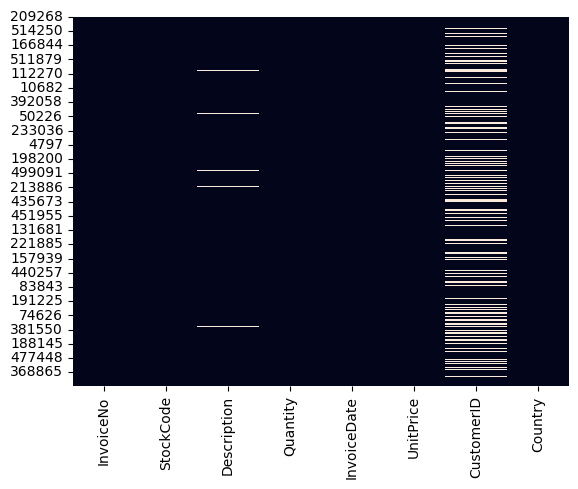

In [12]:
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

In [13]:
dataset['Description'].isnull().sum()

277

# **DataSet Information**

In [14]:
dataset['InvoiceDate_year'] = dataset['InvoiceDate'].dt.year
dataset['InvoiceDate_month'] = dataset['InvoiceDate'].dt.month
dataset['InvoiceDate_day'] = dataset['InvoiceDate'].dt.day
dataset['InvoiceDate_hour'] = dataset['InvoiceDate'].dt.hour
dataset['InvoiceDate_minute'] = dataset['InvoiceDate'].dt.minute
dataset['InvoiceDate_second'] = dataset['InvoiceDate'].dt.second


In [15]:
print("Columns and data types")
pd.DataFrame(dataset.dtypes).rename(columns = {0:'dtype'})

Columns and data types


dtype
InvoiceNo                   object
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
UnitPrice                  float64
CustomerID                 float64
Country                     object
InvoiceDate_year             int64
InvoiceDate_month            int64
InvoiceDate_day              int64
InvoiceDate_hour             int64
InvoiceDate_minute           int64
InvoiceDate_second           int64

In [16]:
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

In [17]:
dataset.shape

(100000, 14)

In [18]:
dataset.describe(include='all')

InvoiceNo StockCode                         Description  \
count    100000.0    100000                               99723   
unique    17962.0      3610                                3697   
top      573585.0    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq        221.0       433                                 441   
first         NaN       NaN                                 NaN   
last          NaN       NaN                                 NaN   
mean          NaN       NaN                                 NaN   
std           NaN       NaN                                 NaN   
min           NaN       NaN                                 NaN   
25%           NaN       NaN                                 NaN   
50%           NaN       NaN                                 NaN   
75%           NaN       NaN                                 NaN   
max           NaN       NaN                                 NaN   

             Quantity          InvoiceDate      UnitPrice    CustomerID  \
count   100000.000000               100000  100000.000000  74983.000000   
unique            NaN                16754            NaN           NaN   
top               NaN  2011-10-31 14:41:00            NaN           NaN   
freq              NaN                  221            NaN           NaN   
first             NaN  2010-12-01 08:26:00            NaN           NaN   
last              NaN  2011-12-09 12:50:00            NaN           NaN   
mean         9.413390                  NaN       4.464044  15285.249870   
std        351.904849                  NaN      86.567489   1715.869301   
min     -80995.000000                  NaN  -11062.060000  12346.000000   
25%          1.000000                  NaN       1.250000  13952.000000   
50%          3.000000                  NaN       2.080000  15142.000000   
75%         10.000000                  NaN       4.130000  16795.000000   
max      74215.000000                  NaN   13541.330000  18287.000000   

               Country  InvoiceDate_year  InvoiceDate_month  InvoiceDate_day  \
count           100000     100000.000000      100000.000000     100000.00000   
unique              38               NaN                NaN              NaN   
top     United Kingdom               NaN                NaN              NaN   
freq             91262               NaN                NaN              NaN   
first              NaN               NaN                NaN              NaN   
last               NaN               NaN                NaN              NaN   
mean               NaN       2010.921920           7.544000         14.99623   
std                NaN          0.268299           3.507693          8.66688   
min                NaN       2010.000000           1.000000          1.00000   
25%                NaN       2011.000000           5.000000          7.00000   
50%                NaN       2011.000000           8.000000         15.00000   
75%                NaN       2011.000000          11.000000         22.00000   
max                NaN       2011.000000          12.000000         31.00000   

        InvoiceDate_hour  InvoiceDate_minute  InvoiceDate_second  
count      100000.000000       100000.000000            100000.0  
unique               NaN                 NaN                 NaN  
top                  NaN                 NaN                 NaN  
freq                 NaN                 NaN                 NaN  
first                NaN                 NaN                 NaN  
last                 NaN                 NaN                 NaN  
mean           13.081290           29.983010                 0.0  
std             2.441774           16.985543                 0.0  
min             6.000000            0.000000                 0.0  
25%            11.000000           16.000000                 0.0  
50%            13.000000           30.000000                 0.0  
75%            15.000000           44.000000                 0.0  
max            20.000000  

In [19]:
numerical_columns=list(dataset.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

In [20]:
categorical_columns=list(dataset.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

In [21]:
def unique_name_no(col):
  print(dataset[col].unique())
  print(dataset[col].nunique())


for i in categorical_columns:
  print(i.upper())
  unique_name_no(i)

INVOICENO
[555200 554974 550972 ... 568460 'C558313' 560929]
17962
STOCKCODE
[71459 21128 21086 ... '90042A' '16169P' 72811]
3610
DESCRIPTION
['HANGING JAM JAR T-LIGHT HOLDER' 'GOLD FISHING GNOME'
 'SET/6 RED SPOTTY PAPER CUPS' ... 'CHEST NATURAL WOOD 20 DRAWERS'
 'FRESHWATER PEARL BRACELET GOLD' 'SMALL ZINC/GLASS CANDLEHOLDER']
3697
COUNTRY
['United Kingdom' 'Australia' 'Norway' 'Finland' 'Germany' 'Bahrain'
 'EIRE' 'Spain' 'France' 'Canada' 'RSA' 'Netherlands' 'Italy' 'Austria'
 'Channel Islands' 'Unspecified' 'Sweden' 'Belgium' 'Portugal' 'USA'
 'Cyprus' 'Poland' 'Switzerland' 'Japan' 'Denmark' 'Hong Kong' 'Iceland'
 'Singapore' 'Israel' 'United Arab Emirates' 'Greece' 'Lithuania'
 'European Community' 'Malta' 'Saudi Arabia' 'Lebanon' 'Czech Republic'
 'Brazil']
38


In [22]:
# duplicate
len(dataset[dataset.duplicated()])

200

In [23]:
dataset[dataset.duplicated()]

InvoiceNo StockCode                          Description  Quantity  \
270266    560555     20984            12 PENCILS TALL TUBE POSY         2   
510482    579456     22624                 IVORY KITCHEN SCALES         1   
213179    555524     22697      GREEN REGENCY TEACUP AND SAUCER         1   
370967    569205     22624                 IVORY KITCHEN SCALES         1   
375246    569424     22436           12 COLOURED PARTY BALLOONS        10   
...          ...       ...                                  ...       ...   
409368    572058     22907     PACK OF 20 NAPKINS PANTRY DESIGN         1   
360382    568226     23232             WRAP VINTAGE LEAF DESIGN        25   
504413    578949     22629                  SPACEBOY LUNCH BOX          1   
49635     540524     84755  COLOUR GLASS T-LIGHT HOLDER HANGING         8   
242308    558330    84596B   SMALL DOLLY MIX DESIGN ORANGE BOWL         8   

               InvoiceDate  UnitPrice  CustomerID         Country  \
270266 2011-07-19 13:01:00       0.29     14178.0  United Kingdom   
510482 2011-11-29 14:20:00       8.50     13428.0  United Kingdom   
213179 2011-06-05 11:37:00       2.95     16923.0  United Kingdom   
370967 2011-10-02 10:55:00       8.50     16923.0  United Kingdom   
375246 2011-10-04 10:49:00       0.65     15529.0  United Kingdom   
...                    ...        ...         ...             ...   
409368 2011-10-20 12:43:00       0.85     18252.0  United Kingdom   
360382 2011-09-26 10:39:00       0.42     16719.0  United Kingdom   
504413 2011-11-27 14:30:00       1.95     14954.0  United Kingdom   
49635  2011-01-09 12:53:00       0.65     16735.0  United Kingdom   
242308 2011-06-28 12:16:00       0.42     12748.0  United Kingdom   

        InvoiceDate_year  InvoiceDate_month  InvoiceDate_day  \
270266              2011                  7               19   
510482              2011                 11               29   
213179              2011                  6                5   
370967              2011                 10                2   
375246              2011                 10                4   
...                  ...                ...              ...   
409368              2011                 10               20   
360382              2011                  9               26   
504413              2011                 11               27   
49635               2011                  1                9   
242308              2011                  6               28   

        InvoiceDate_hour  InvoiceDate_minute  InvoiceDate_second  
270266                13                   1                   0  
510482                14                  20                   0  
213179                11                  37                   0  
370967                10                  55                   0  
375246                10                  49                   0  
...                  ...                 ...                 ...  
409368                12                  43                   0  
360382                10                  39                   0  
504413                14                  30                   0  
49635                 12                  53                   0  
242308                12                  16                   0  

[200 rows x 14 columns]

In [24]:
### Dropping Duplicate Rows
dataset=dataset.drop_duplicates()
len(dataset[dataset.duplicated()])

0

In [25]:
dataset.shape

(99800, 14)

In [26]:
dataset.isnull().sum()

InvoiceNo                 0
StockCode                 0
Description             277
Quantity                  0
InvoiceDate               0
UnitPrice                 0
CustomerID            25017
Country                   0
InvoiceDate_year          0
InvoiceDate_month         0
InvoiceDate_day           0
InvoiceDate_hour          0
InvoiceDate_minute        0
InvoiceDate_second        0
dtype: int64

***There are 541909 rows and 8 columns in above dataset.***

***Above dataset has  missing value on Description & CustomerID.***

***Above dataset has 5268 duplicate value.***


# **Missing Value Imputation**

**Handle Category Imputation**

**Frequent Category Imputation**

In [27]:
def impute_nan(df,variable):
  most_frequent_category=df[variable].mode()[0]
  df[variable].fillna(most_frequent_category,inplace=True)

In [28]:
impute_nan(dataset,"Description")

**Handle Numerical Imputation**

**Random Sample Imputation (MCAR)**

In [29]:
def impute_nan_numeric(df,variable):
  df[variable+'_random']=df[variable]
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  random_sample.index= df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [30]:
impute_nan_numeric(dataset,'CustomerID')
dataset.drop(['CustomerID'],axis=1,inplace=True)

In [31]:
dataset.isnull().sum()

InvoiceNo             0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
UnitPrice             0
Country               0
InvoiceDate_year      0
InvoiceDate_month     0
InvoiceDate_day       0
InvoiceDate_hour      0
InvoiceDate_minute    0
InvoiceDate_second    0
CustomerID_random     0
dtype: int64

In [32]:
dataset.head()

InvoiceNo StockCode                       Description  Quantity  \
209268    555200     71459    HANGING JAM JAR T-LIGHT HOLDER        24   
207108    554974     21128                GOLD FISHING GNOME         4   
167085    550972     21086       SET/6 RED SPOTTY PAPER CUPS         4   
471836    576652     22812  PACK 3 BOXES CHRISTMAS PANETTONE         3   
115865    546157     22180                    RETROSPOT LAMP         2   

               InvoiceDate  UnitPrice         Country  InvoiceDate_year  \
209268 2011-06-01 12:05:00       0.85  United Kingdom              2011   
207108 2011-05-27 17:14:00       6.95  United Kingdom              2011   
167085 2011-04-21 17:05:00       0.65  United Kingdom              2011   
471836 2011-11-16 10:39:00       1.95  United Kingdom              2011   
115865 2011-03-10 08:40:00       9.95  United Kingdom              2011   

        InvoiceDate_month  InvoiceDate_day  InvoiceDate_hour  \
209268                  6                1                12   
207108                  5               27                17   
167085                  4               21                17   
471836                 11               16                10   
115865                  3               10                 8   

        InvoiceDate_minute  InvoiceDate_second  CustomerID_random  
209268                   5                   0            17315.0  
207108                  14                   0            14031.0  
167085                   5                   0            14031.0  
471836                  39                   0            17198.0  
115865                  40                   0            13502.0

In [33]:
dataset.shape

(99800, 14)

<Axes: >

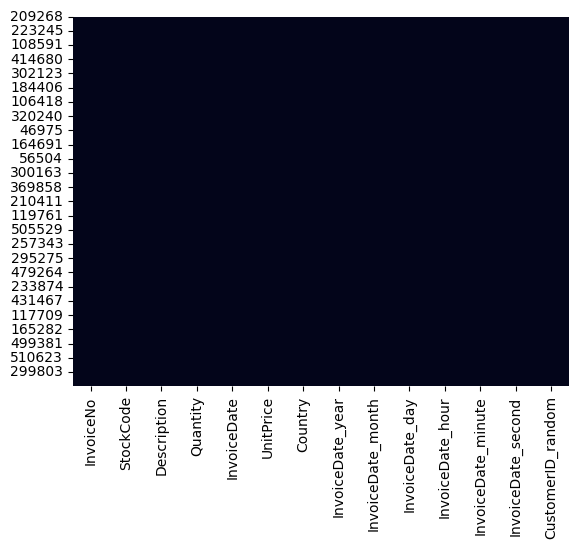

In [34]:
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

# **Exploratory Data Analysis**

## **Handling Numeric Features**

In [35]:
numerical_columns=list(dataset.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features


Index(['Quantity', 'UnitPrice', 'InvoiceDate_year', 'InvoiceDate_month',
       'InvoiceDate_day', 'InvoiceDate_hour', 'InvoiceDate_minute',
       'InvoiceDate_second', 'CustomerID_random'],
      dtype='object')

**Univariate Analysis**

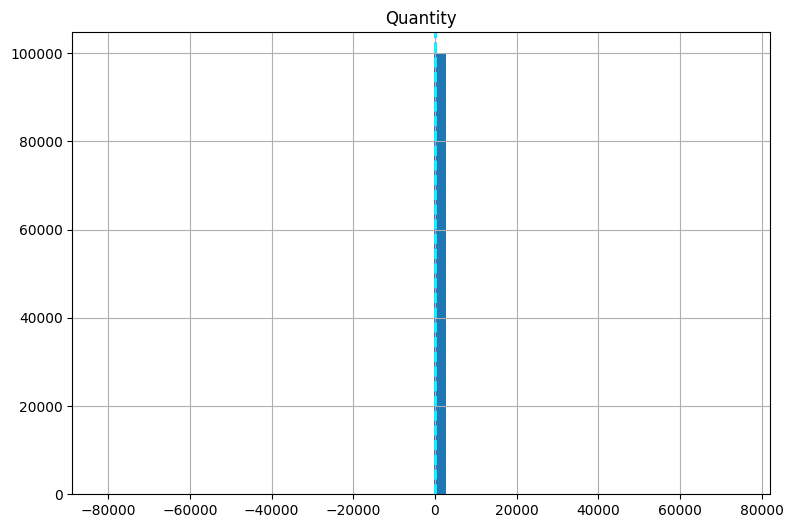

Skewness : -28.344569834381602
Kurtosis : 47758.64290721468


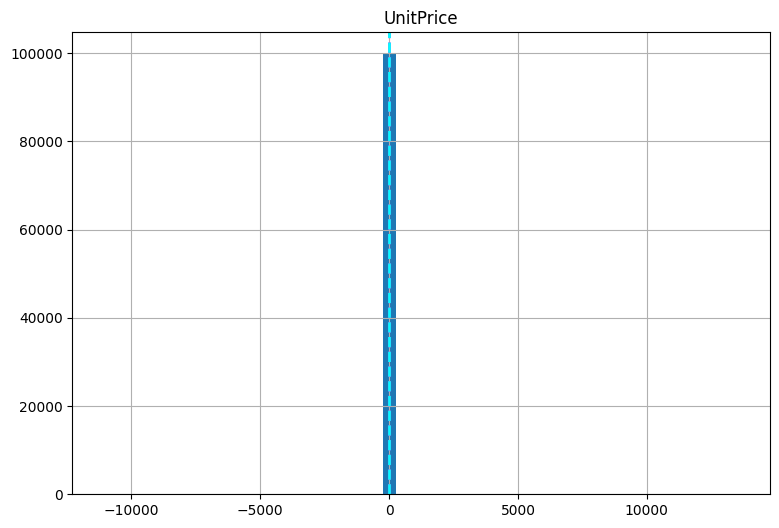

Skewness : 67.4174070631849
Kurtosis : 13735.513760204914


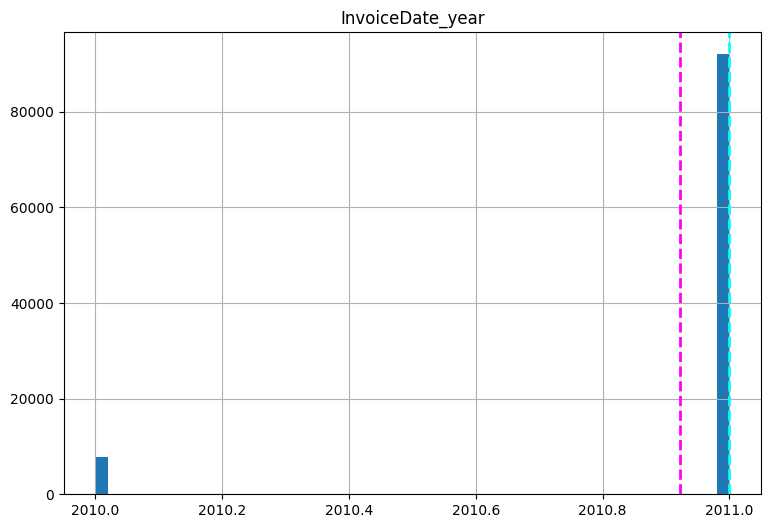

Skewness : -3.146091508565177
Kurtosis : 7.898050057421847


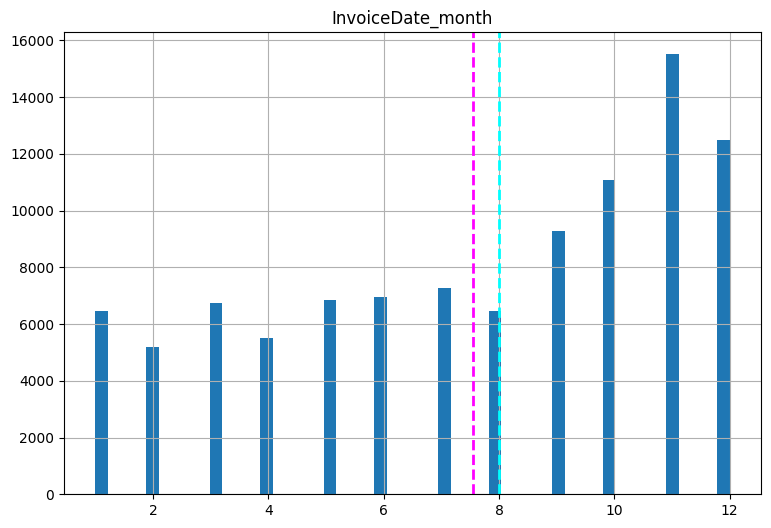

Skewness : -0.4089208811983102
Kurtosis : -1.122990398025394


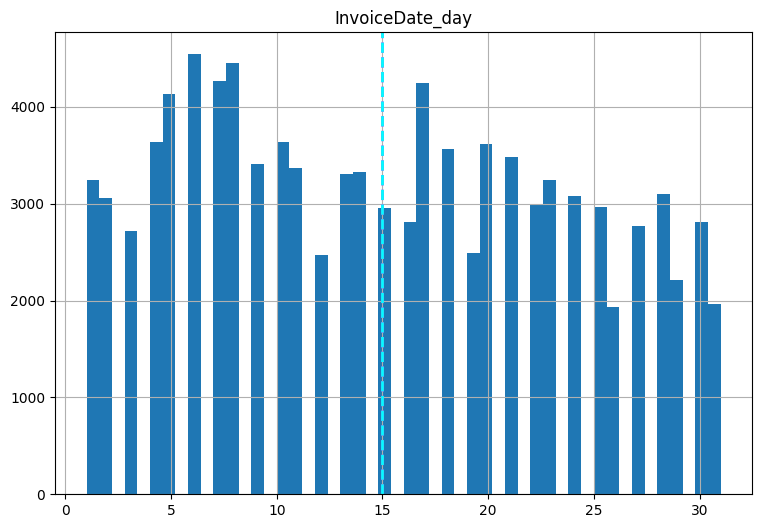

Skewness : 0.1447444352513377
Kurtosis : -1.1578925783110727


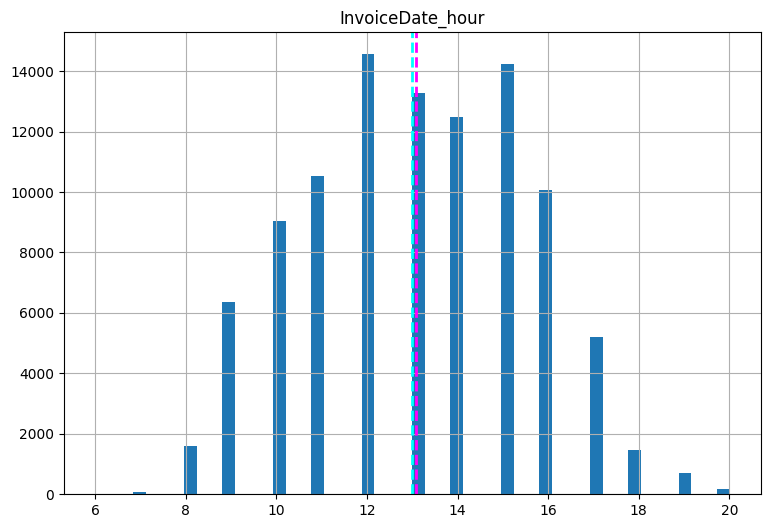

Skewness : 0.008697042520265109
Kurtosis : -0.6813692430256721


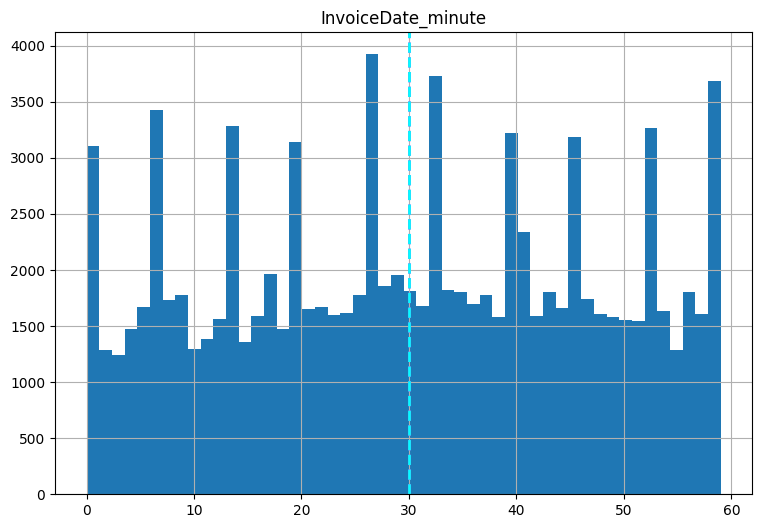

Skewness : -0.02913752892724055
Kurtosis : -1.138367174409329


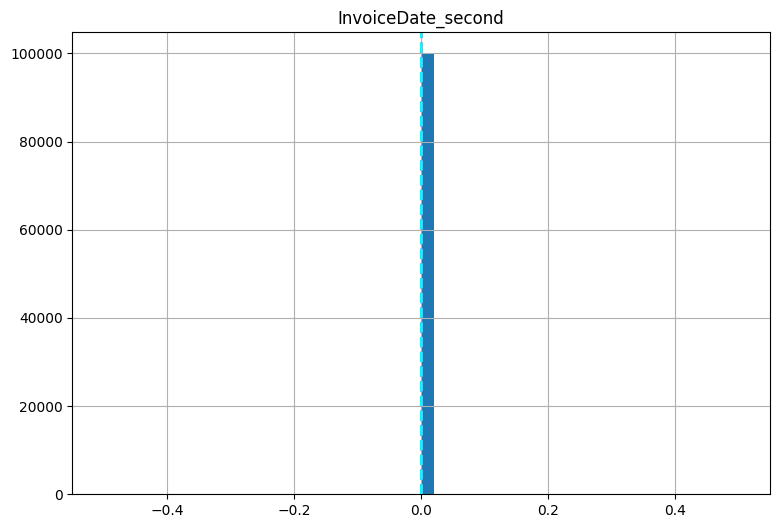

Skewness : 0
Kurtosis : 0


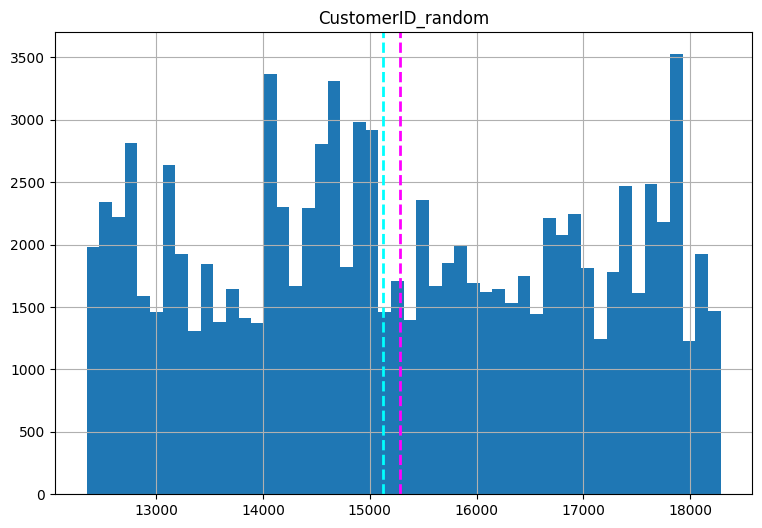

Skewness : 0.03522106597581507
Kurtosis : -1.182263036632357


In [36]:
#plot a bar plot for each numerical feature count with Hist Plot (except car_ID)
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (dataset[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",dataset[col].skew())
  print( "Kurtosis :",dataset[col].kurt())

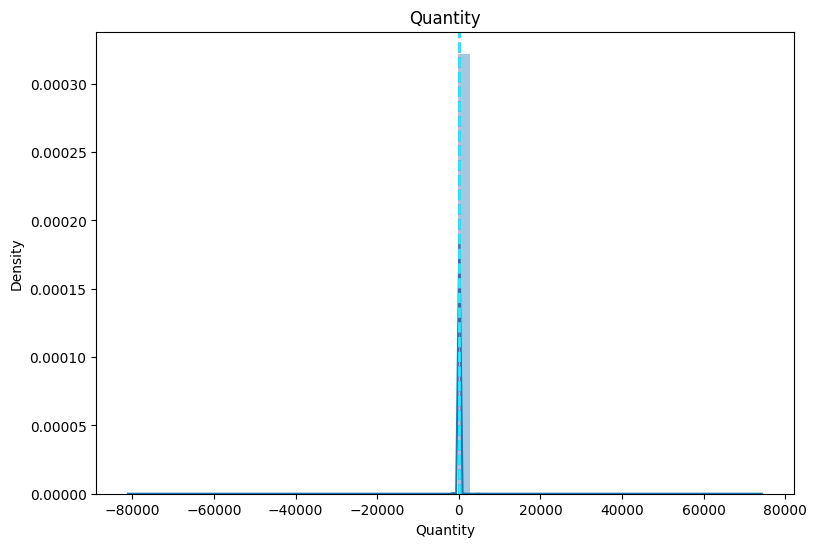

Skewness : -28.344569834381602
Kurtosis : 47758.64290721468


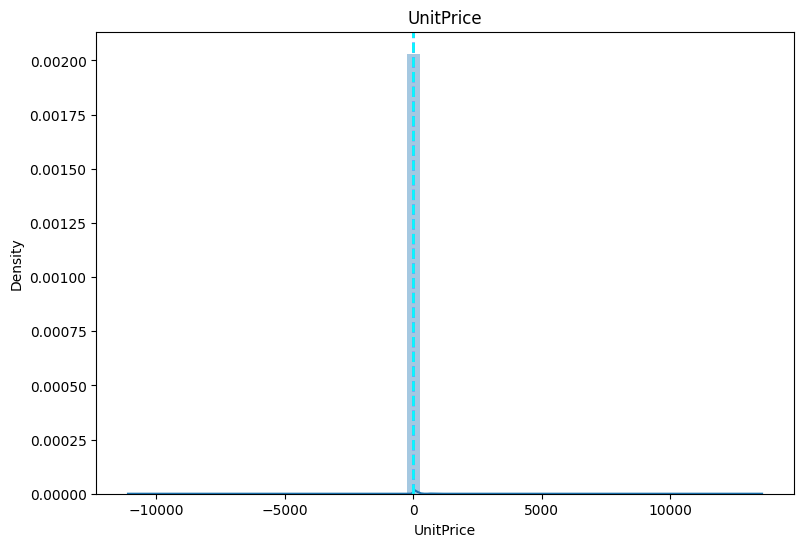

Skewness : 67.4174070631849
Kurtosis : 13735.513760204914


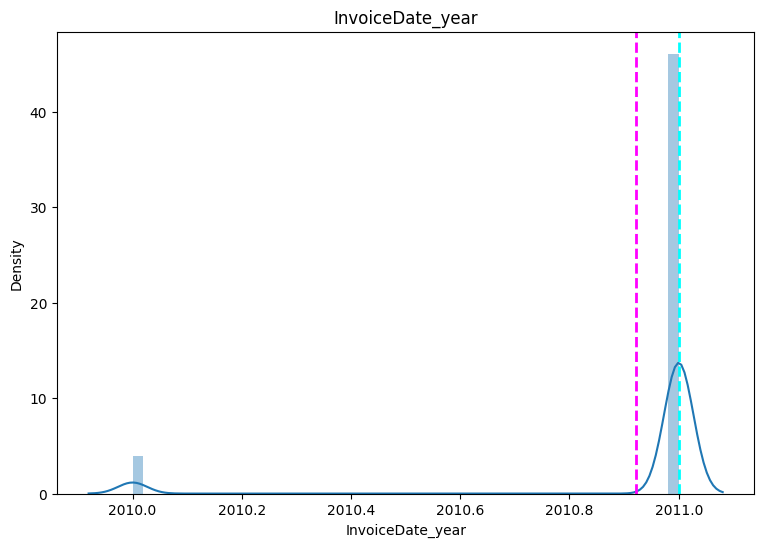

Skewness : -3.146091508565177
Kurtosis : 7.898050057421847


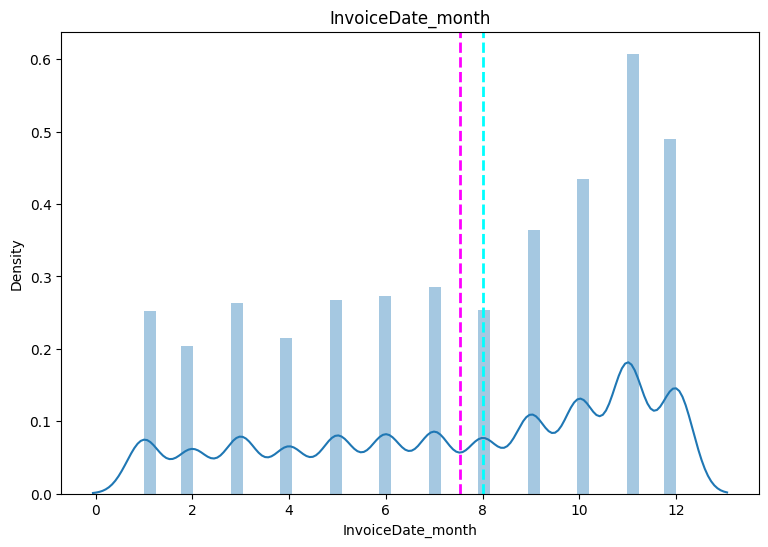

Skewness : -0.4089208811983102
Kurtosis : -1.122990398025394


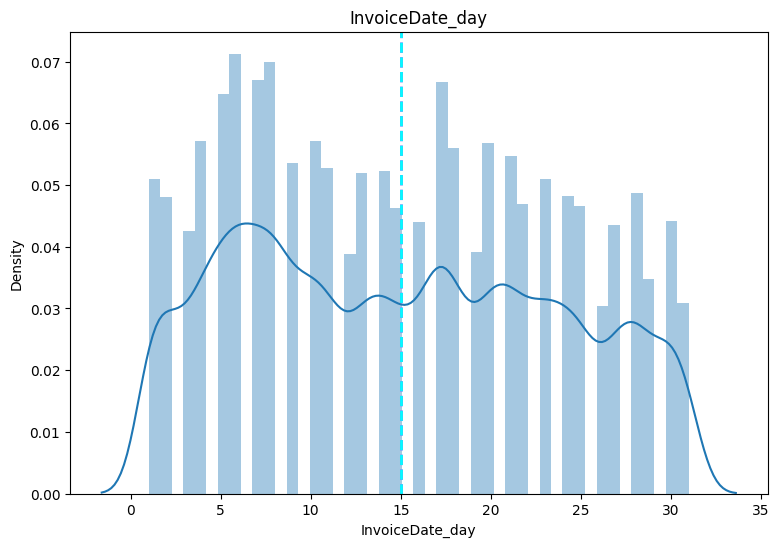

Skewness : 0.1447444352513377
Kurtosis : -1.1578925783110727


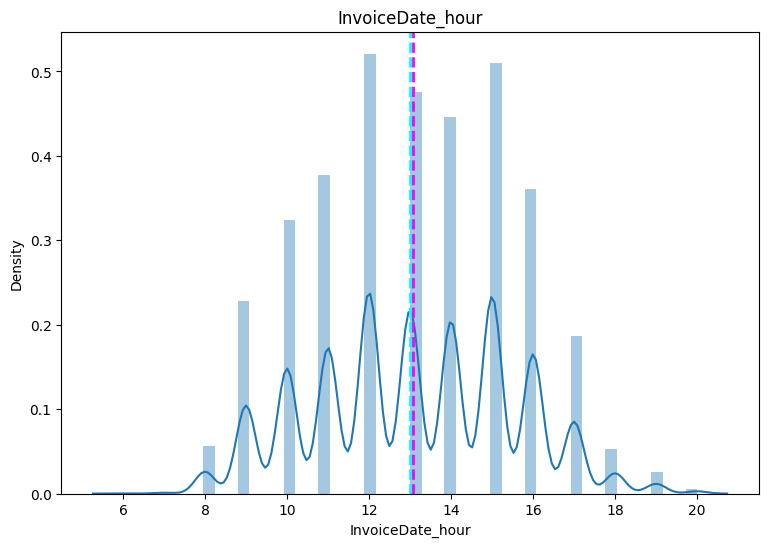

Skewness : 0.008697042520265109
Kurtosis : -0.6813692430256721


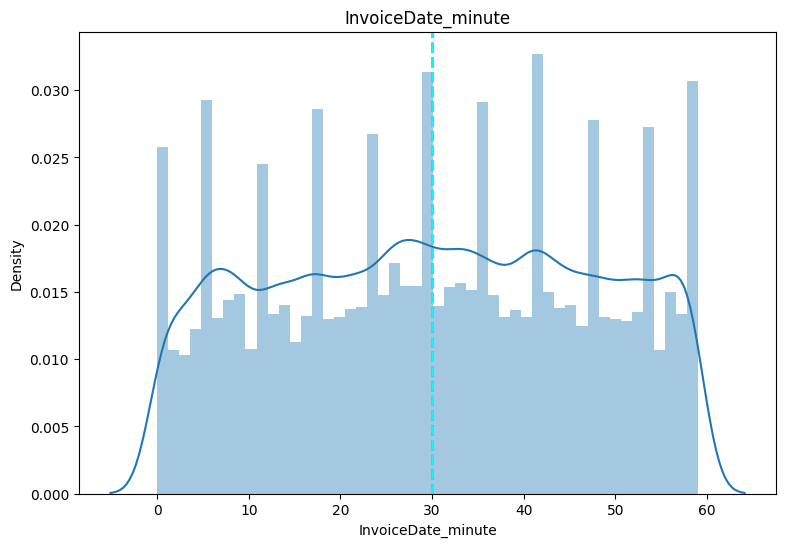

Skewness : -0.02913752892724055
Kurtosis : -1.138367174409329


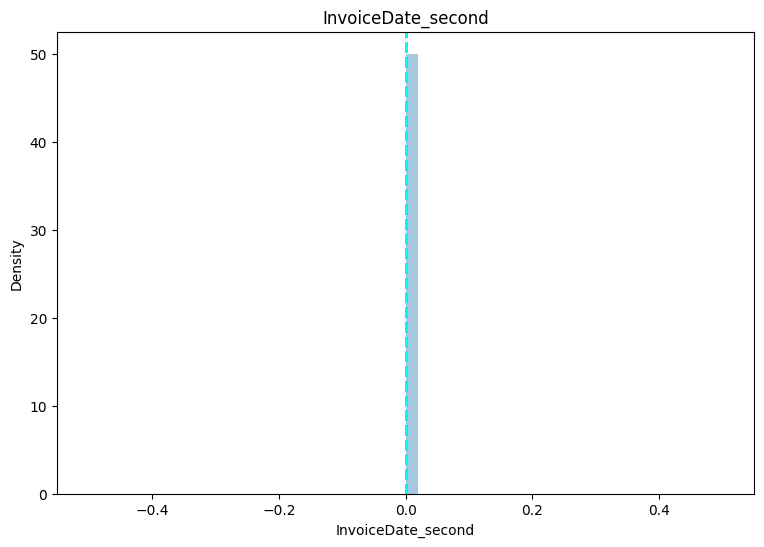

Skewness : 0
Kurtosis : 0


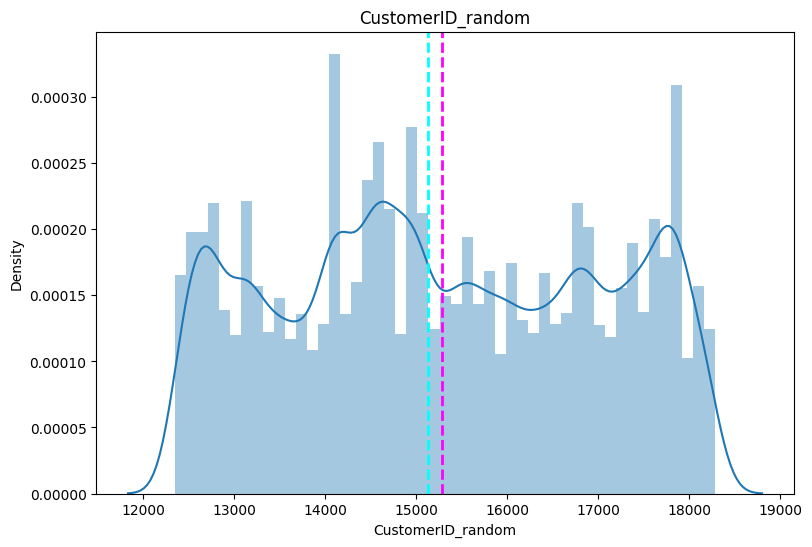

Skewness : 0.03522106597581507
Kurtosis : -1.182263036632357


In [37]:
#plot a bar plot for each numerical feature count with Dist Plot (except Car_ID)
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (dataset[col])
  sns.distplot(dataset[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",dataset[col].skew())
  print( "Kurtosis :",dataset[col].kurt())

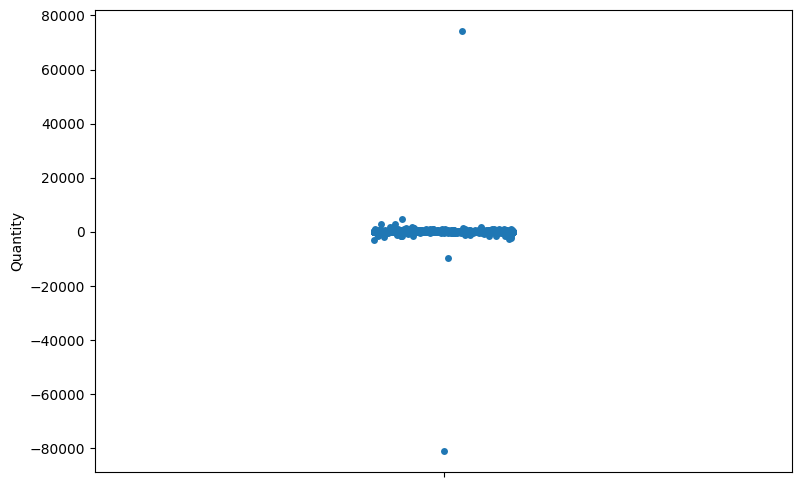

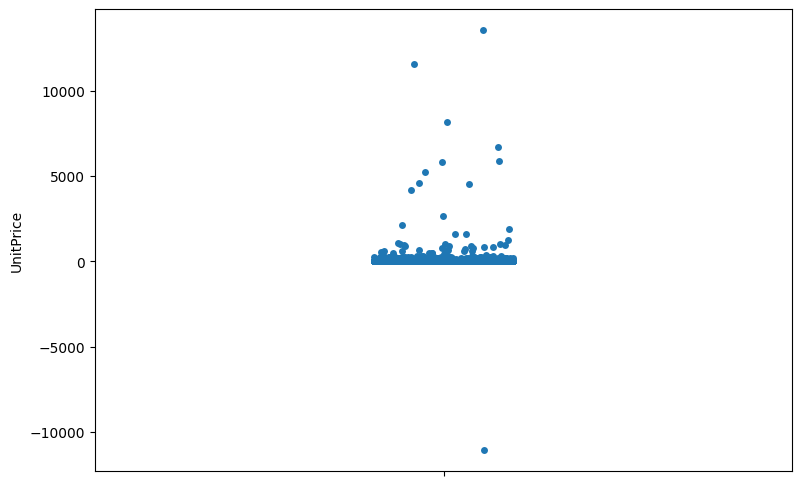

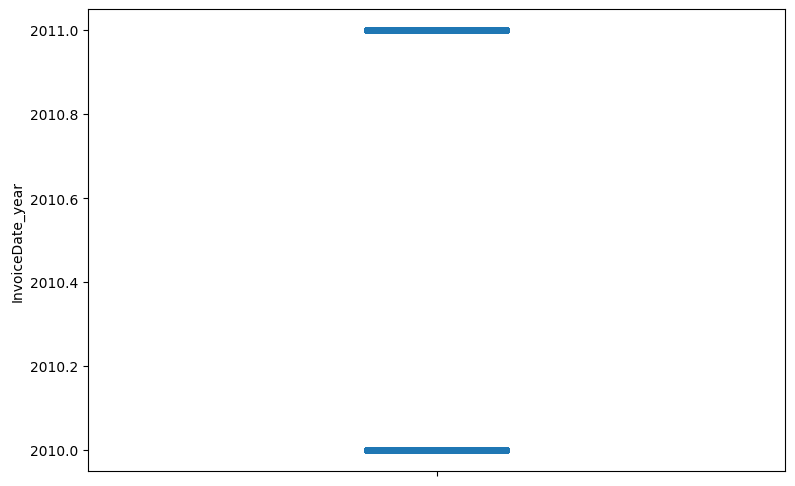

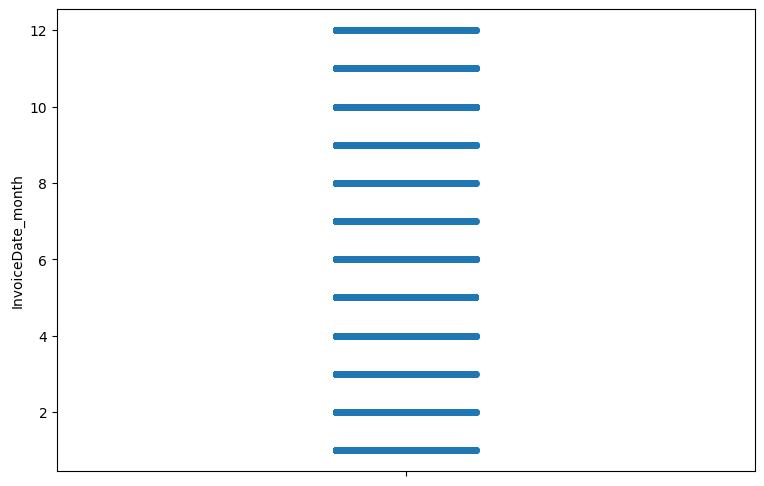

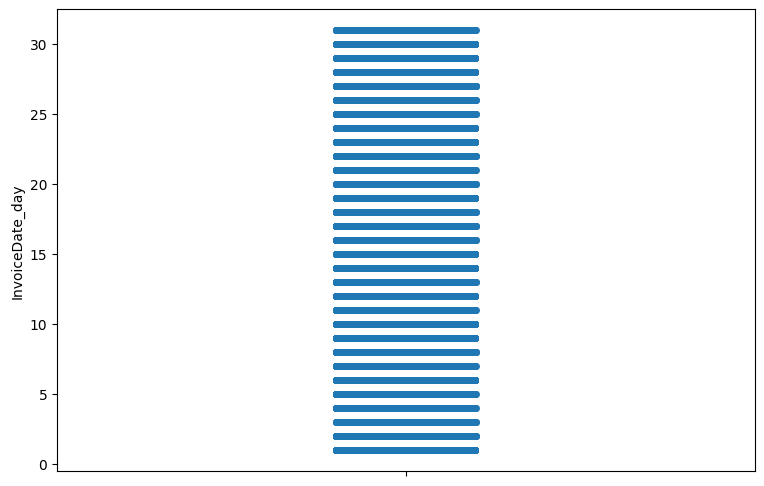

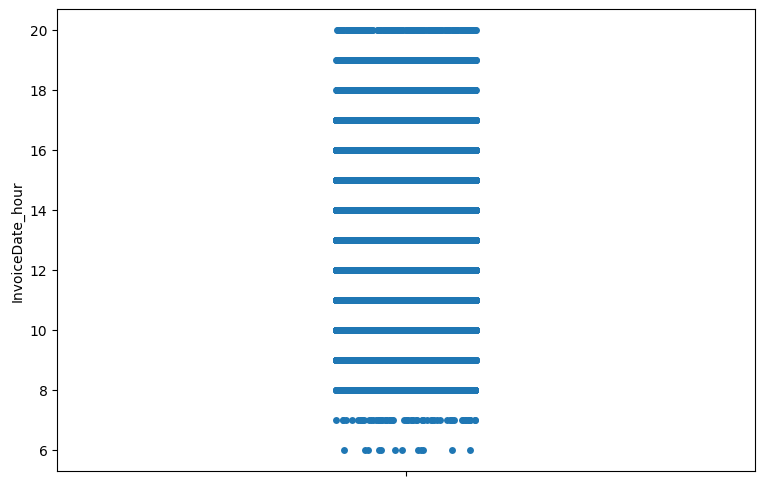

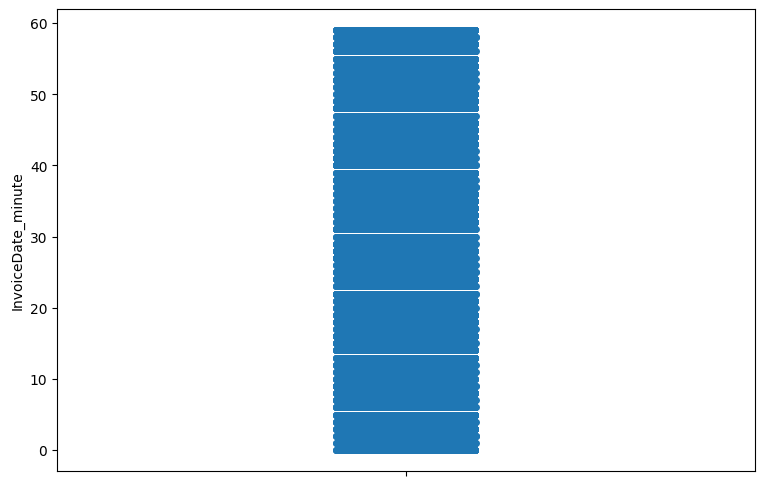

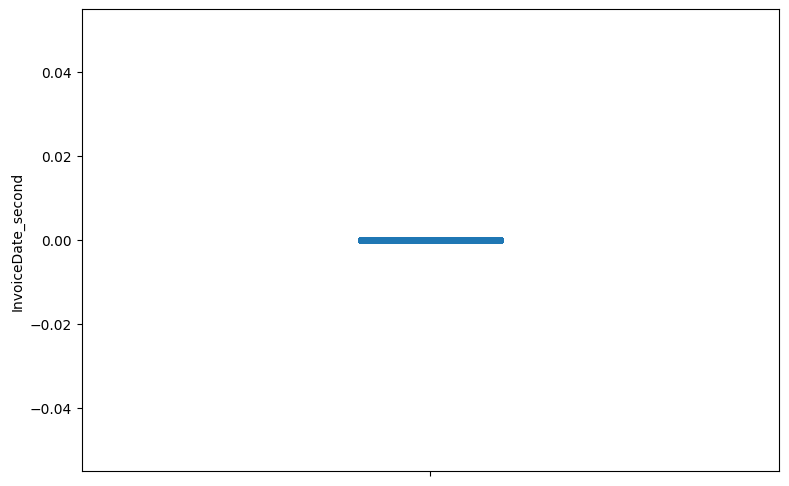

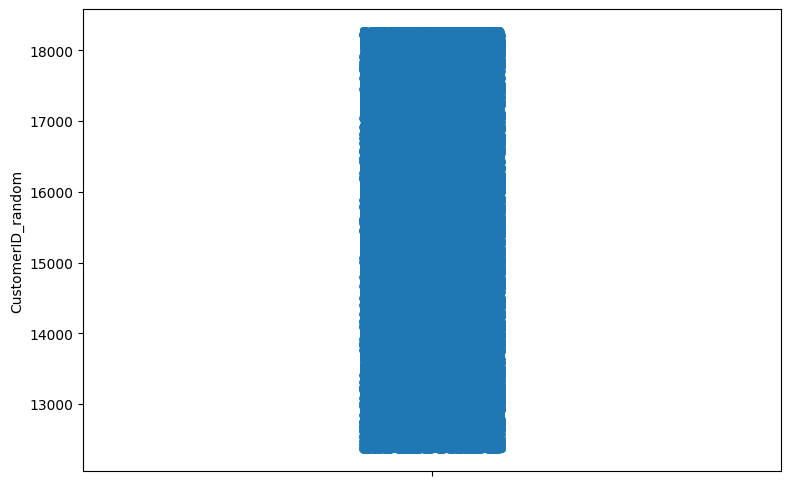

In [38]:
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(dataset[col])

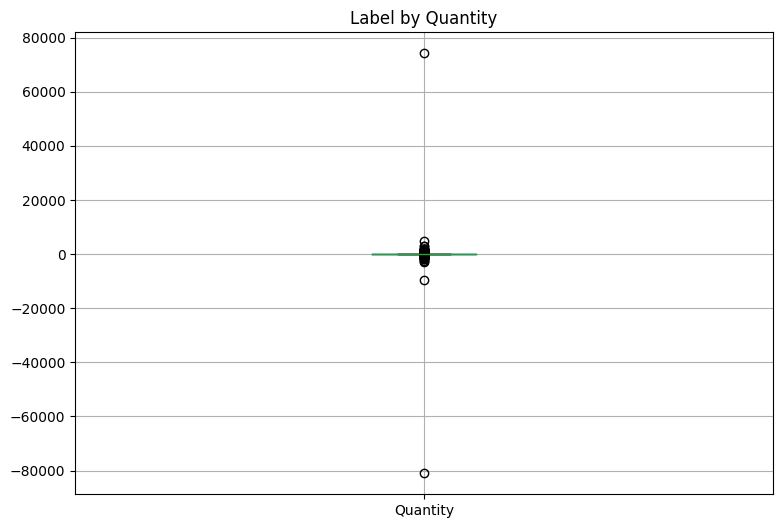

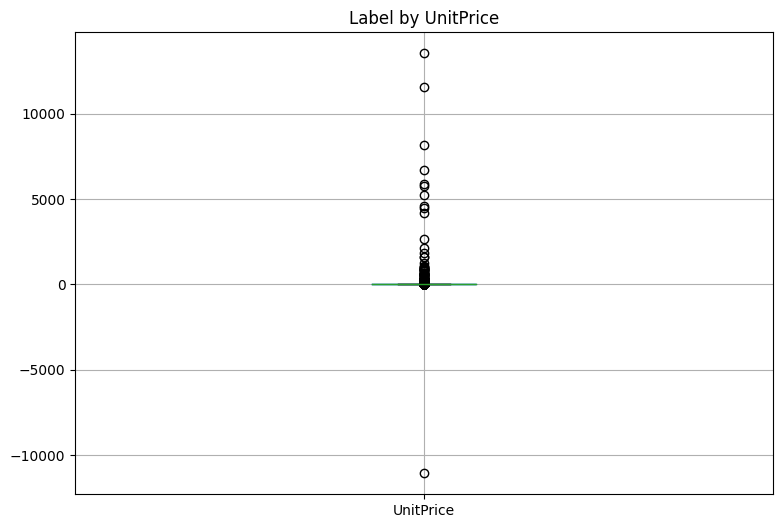

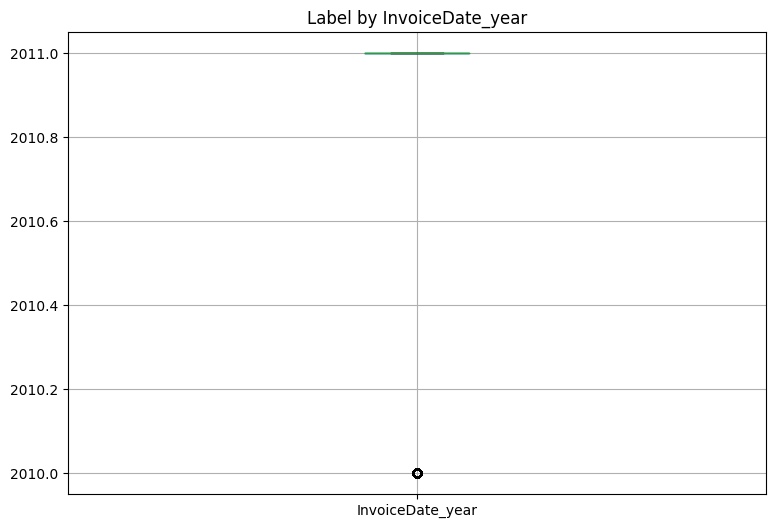

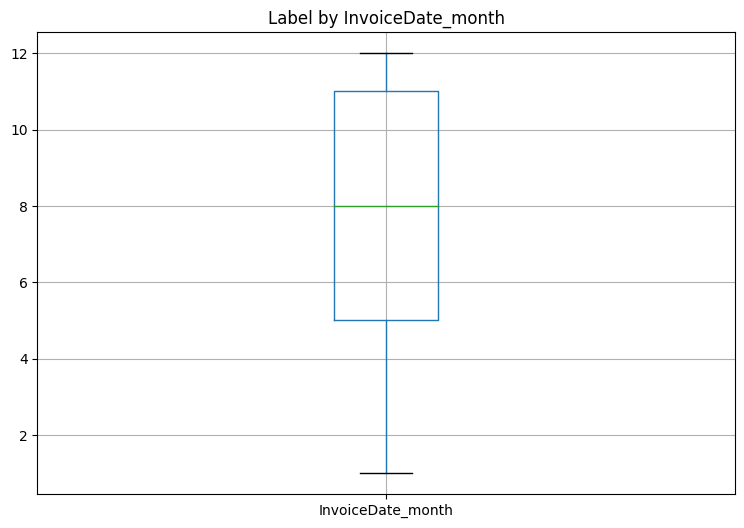

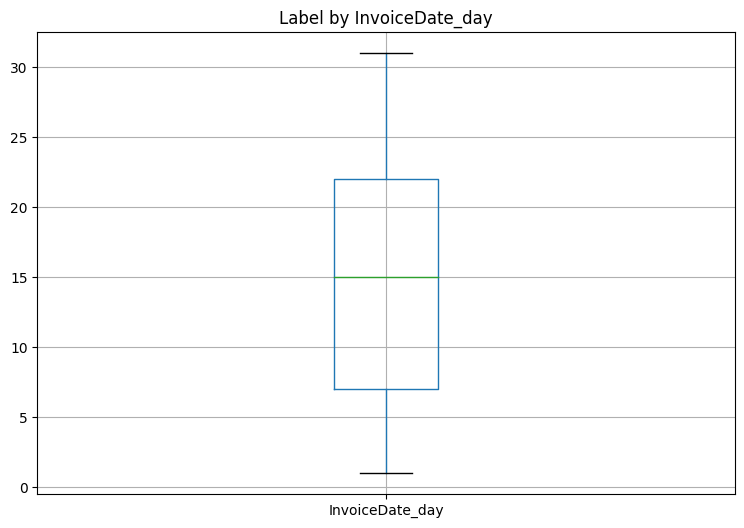

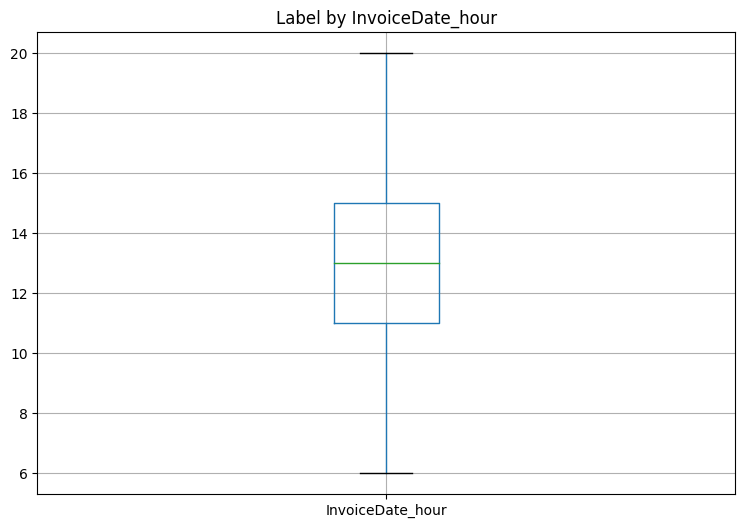

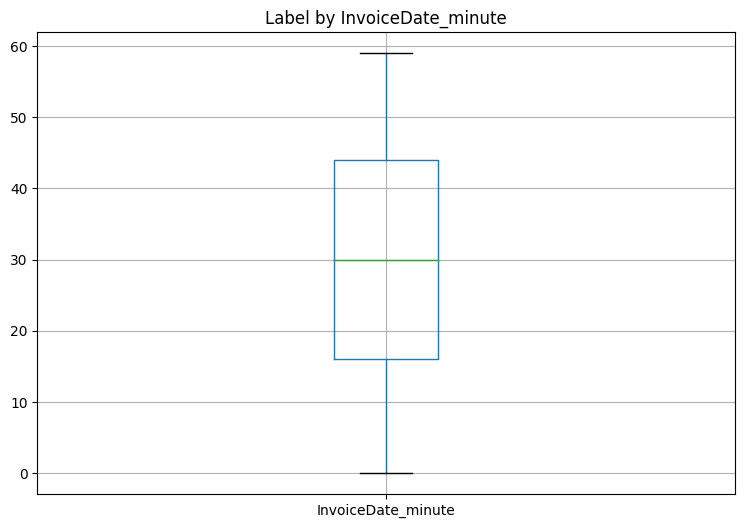

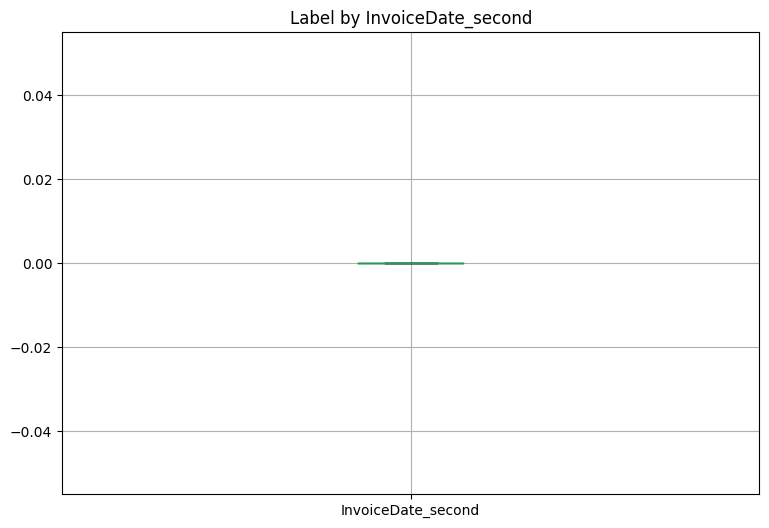

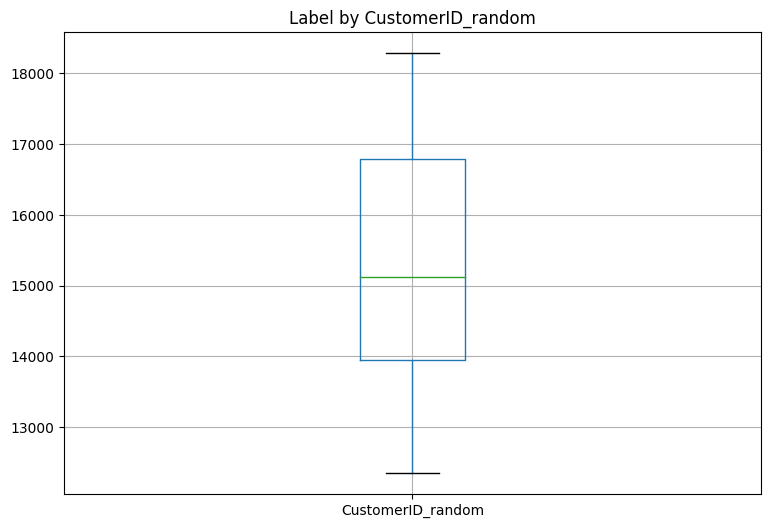

In [39]:
# plot a boxplot for the label by each numerical feature

for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(col)
    ax.set_title('Label by ' + col)
    #ax.set_ylabel("Churn")
plt.show()

In [40]:
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country', 'InvoiceDate_year', 'InvoiceDate_month',
       'InvoiceDate_day', 'InvoiceDate_hour', 'InvoiceDate_minute',
       'InvoiceDate_second', 'CustomerID_random'],
      dtype='object')

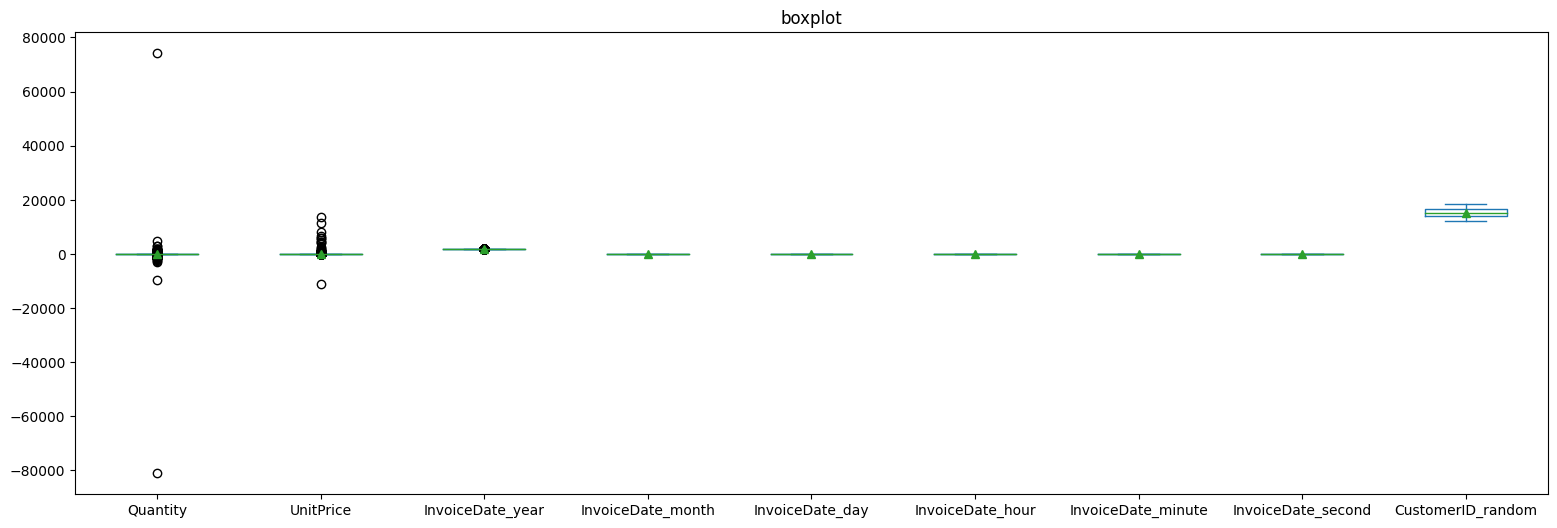

In [41]:
plt.rcParams['figure.figsize']=(19,6)
ax = dataset[['InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'UnitPrice', 'Country', 'InvoiceDate_year', 'InvoiceDate_month',
       'InvoiceDate_day', 'InvoiceDate_hour', 'InvoiceDate_minute',
       'InvoiceDate_second', 'CustomerID_random']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

<Axes: xlabel='year', ylabel='value'>

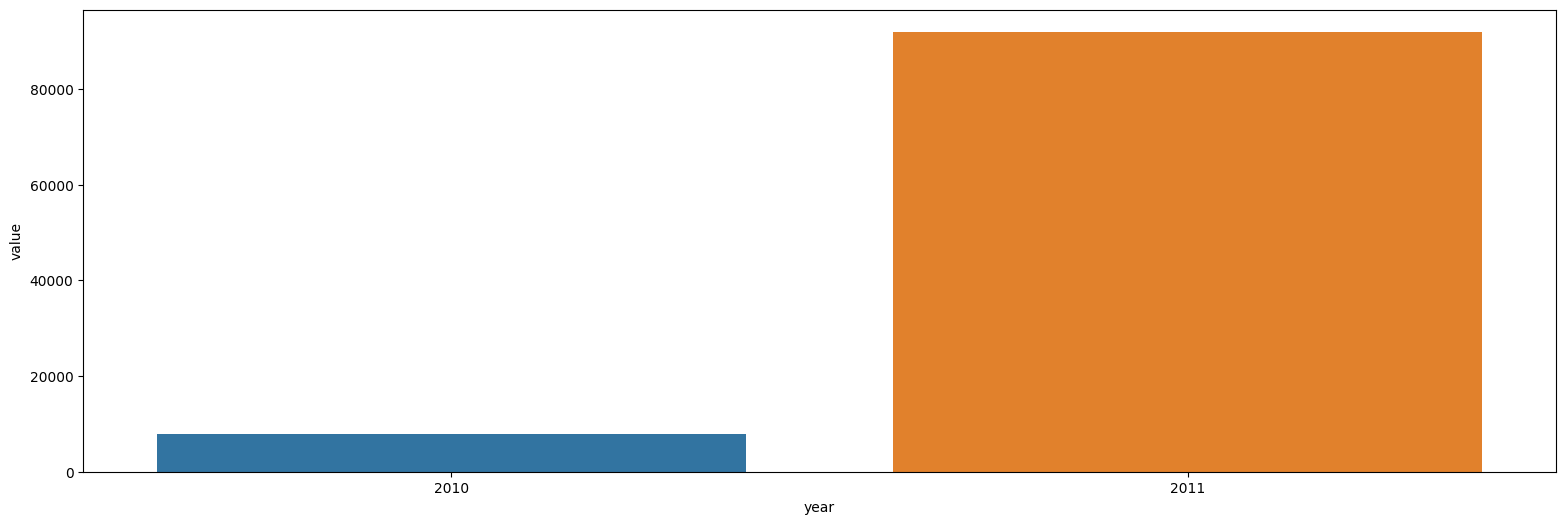

In [42]:
invb=pd.DataFrame({'year':[2011,2010],'value':[92011,7789]})
sns.barplot(y='value',x='year',data=invb)

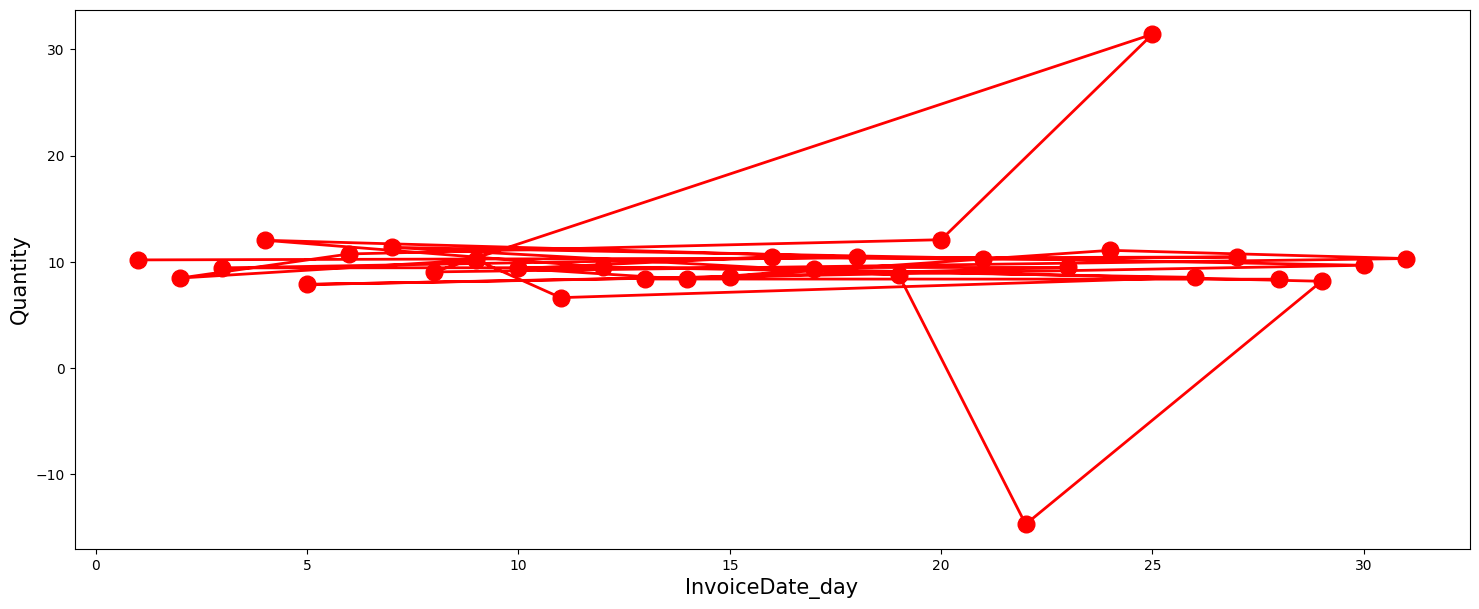

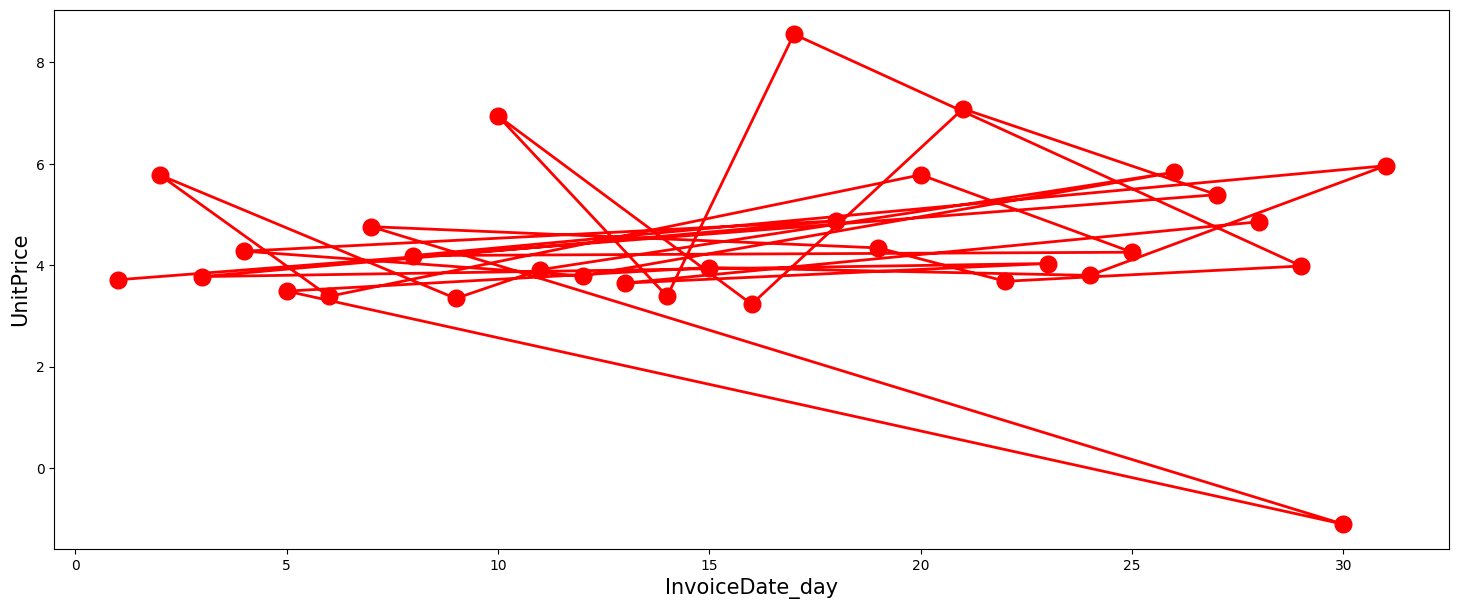

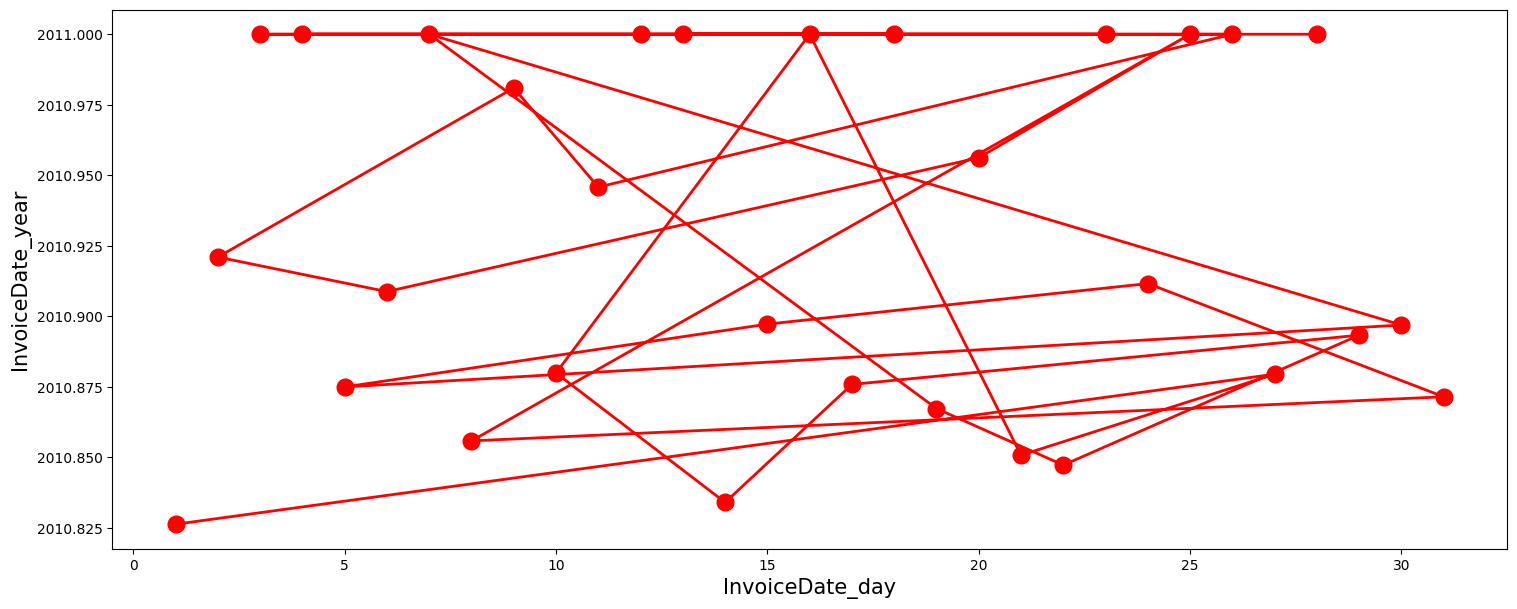

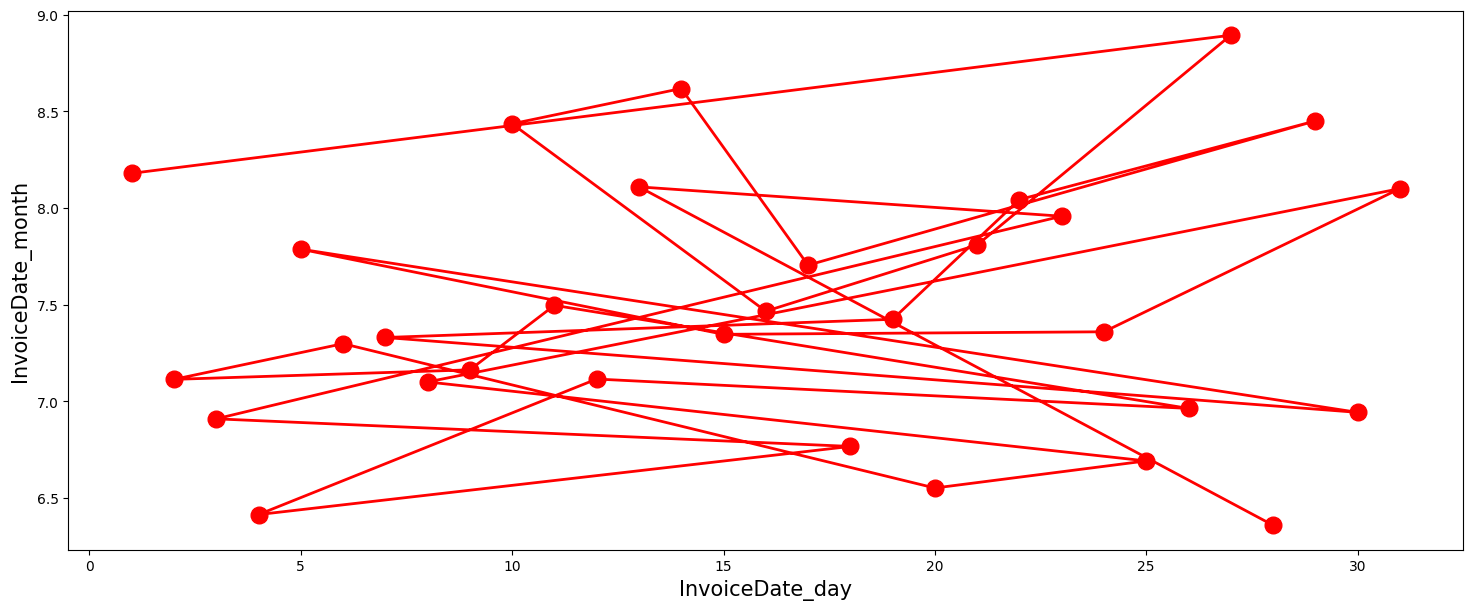

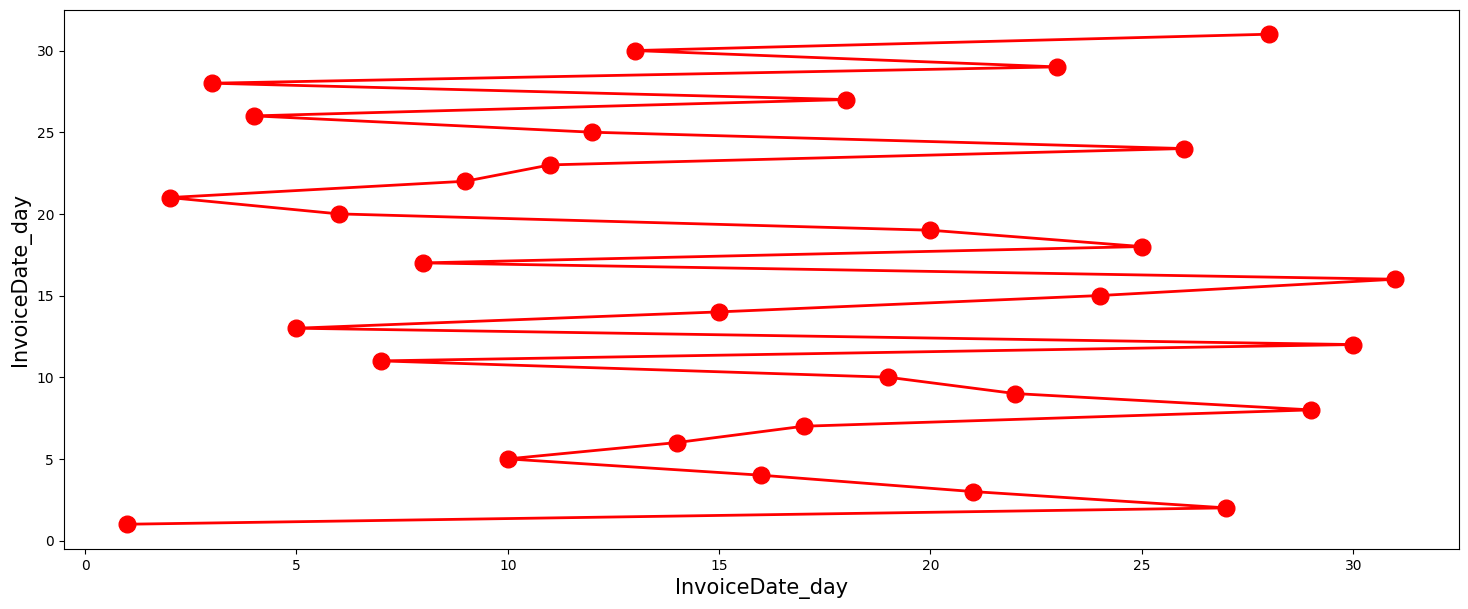

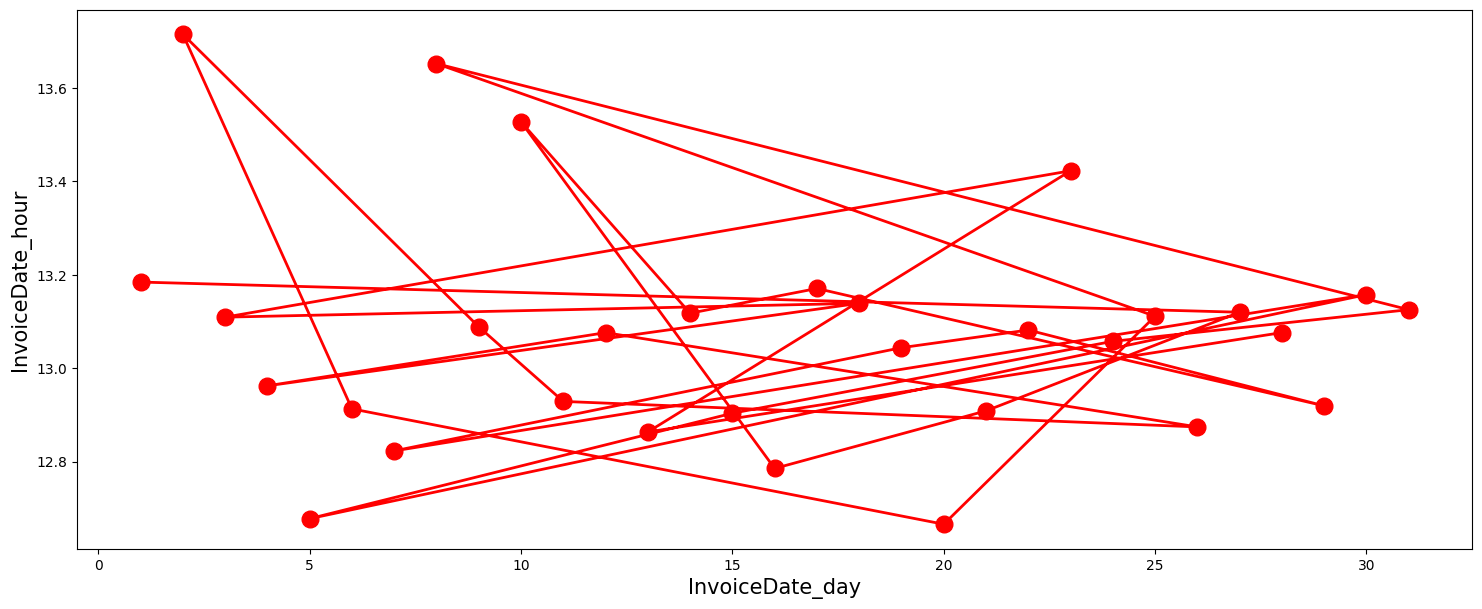

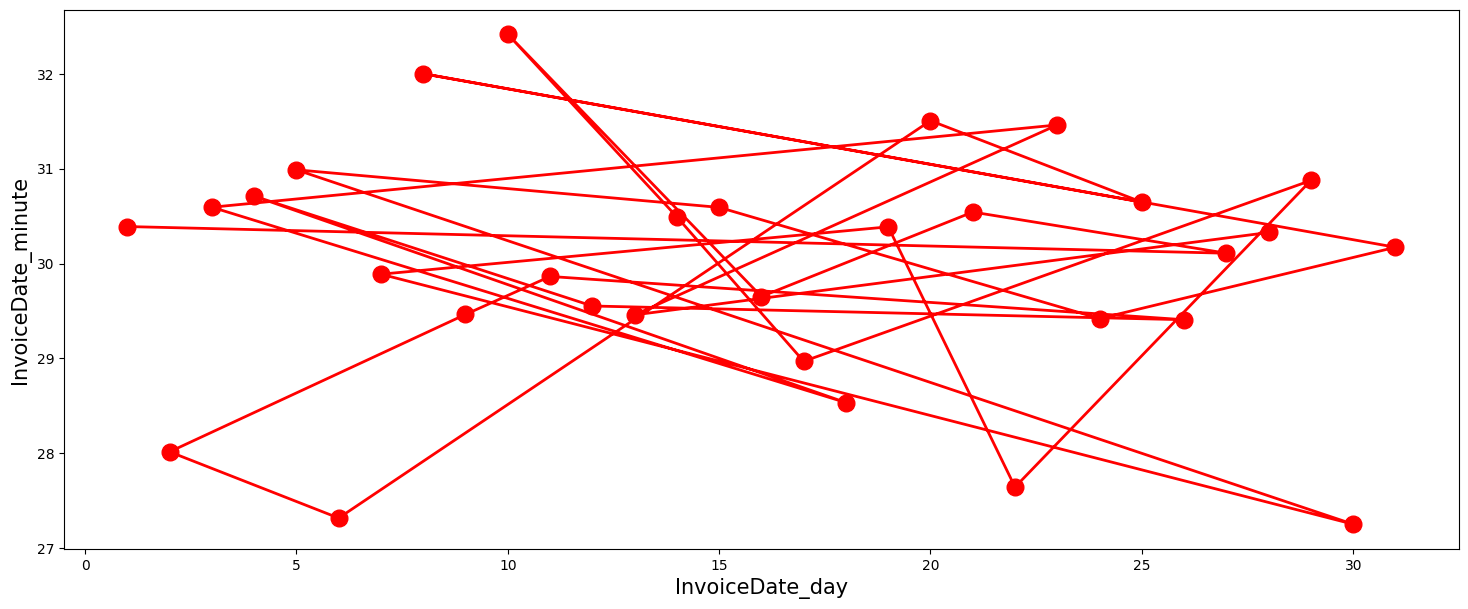

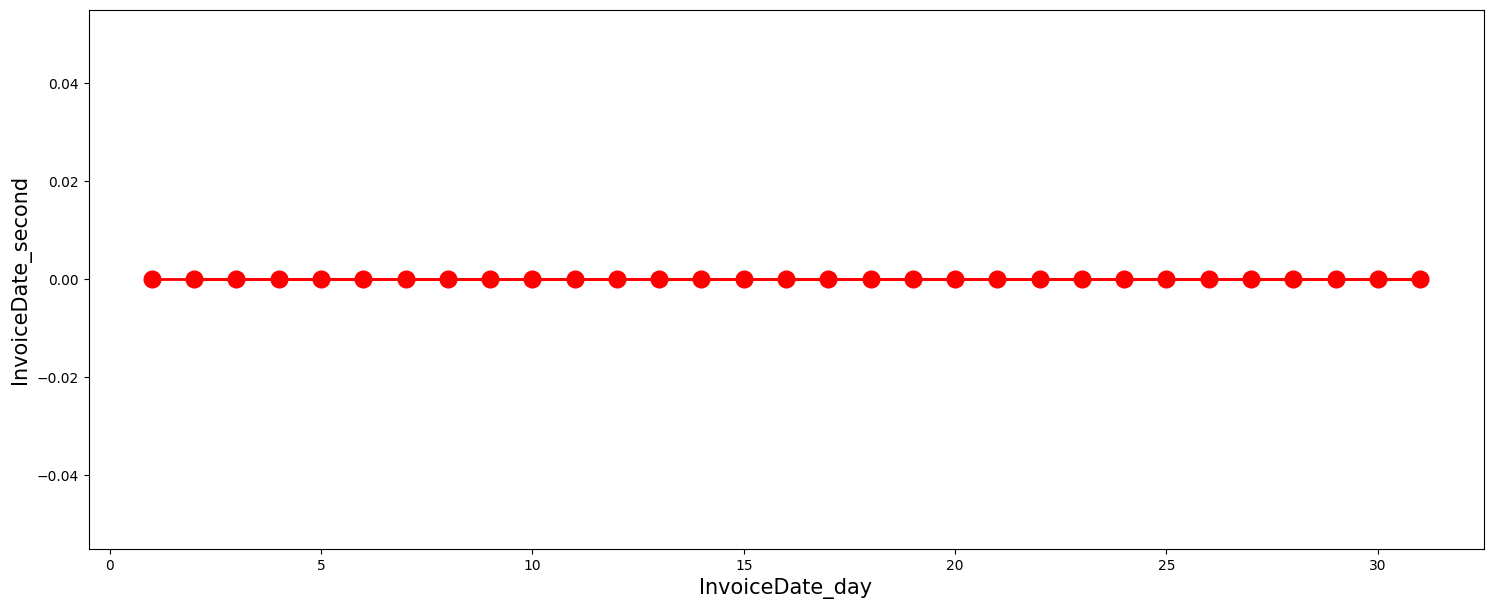

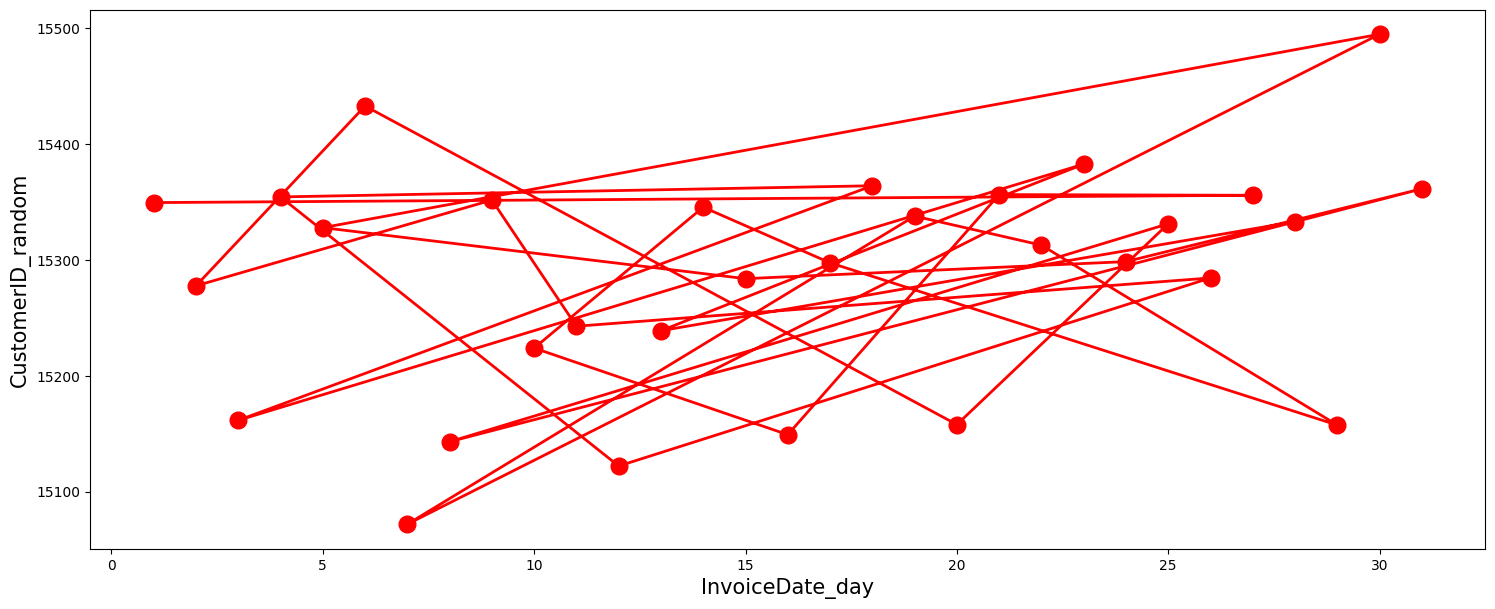

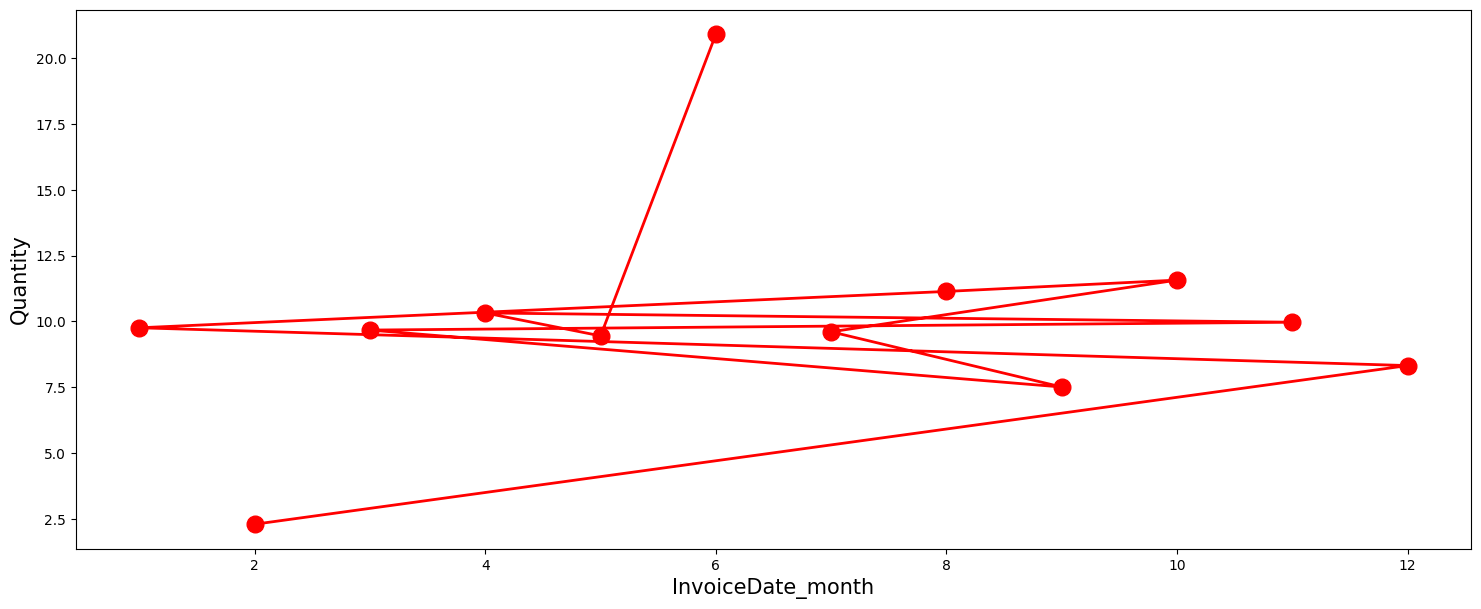

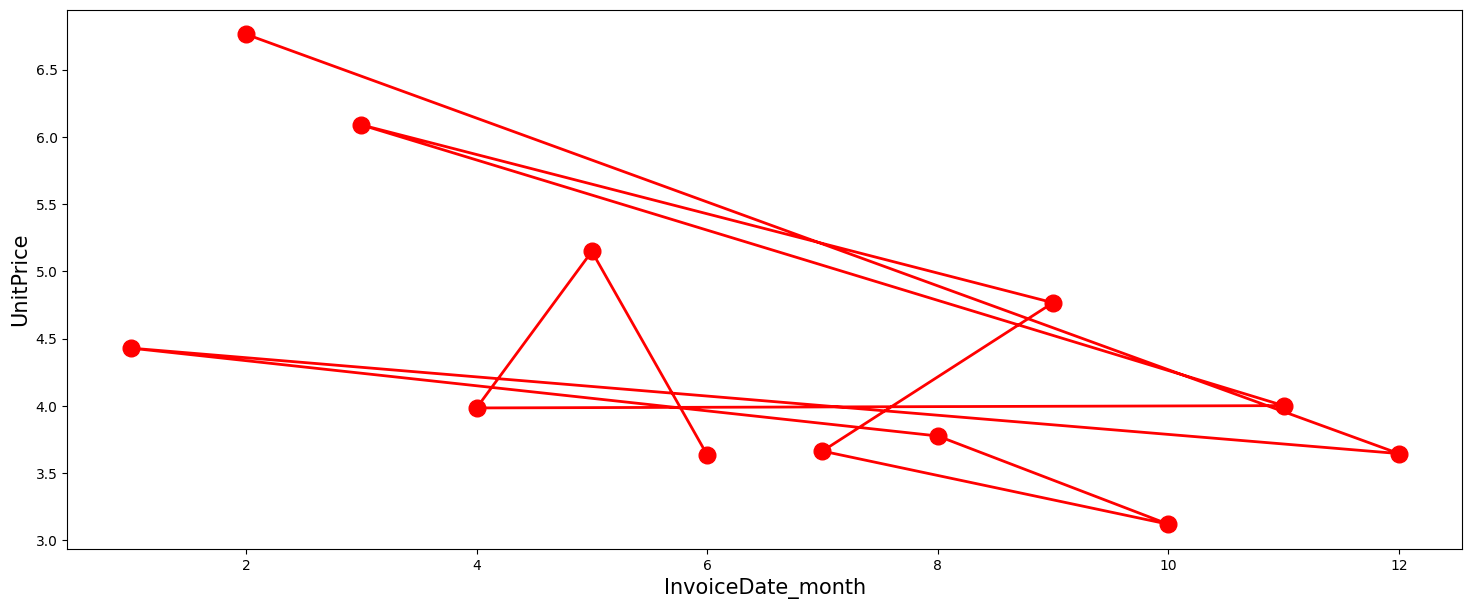

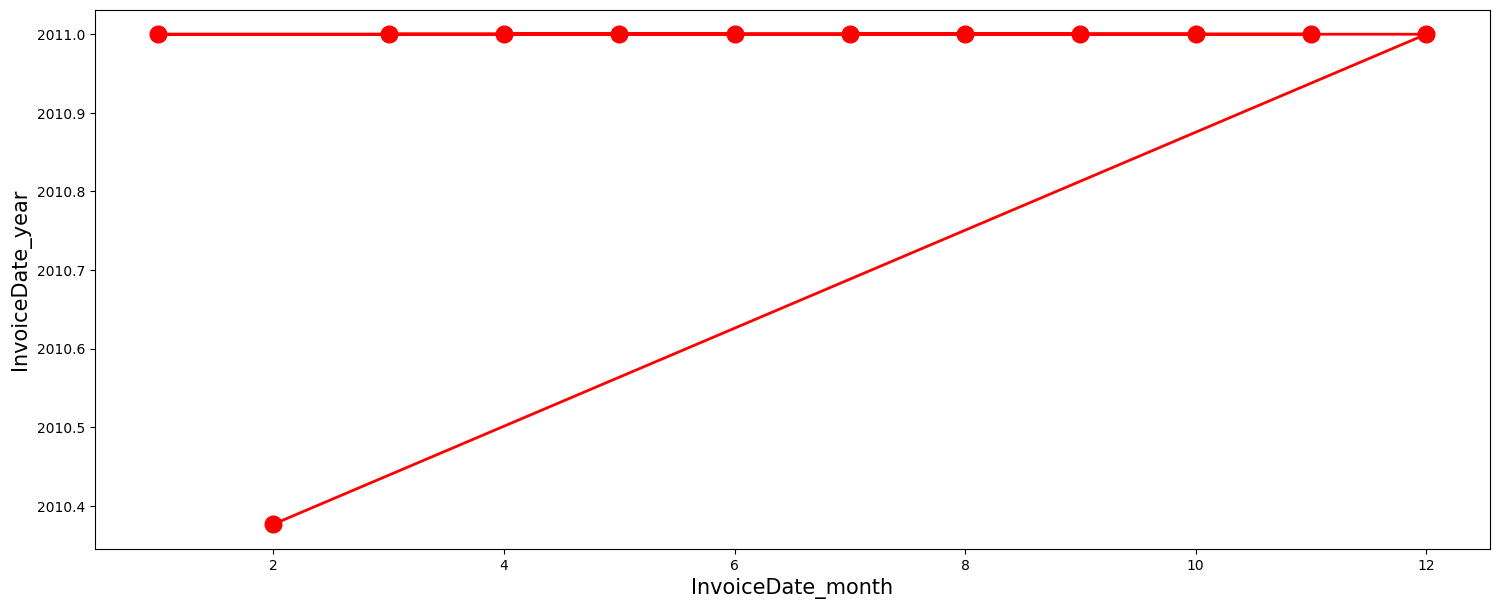

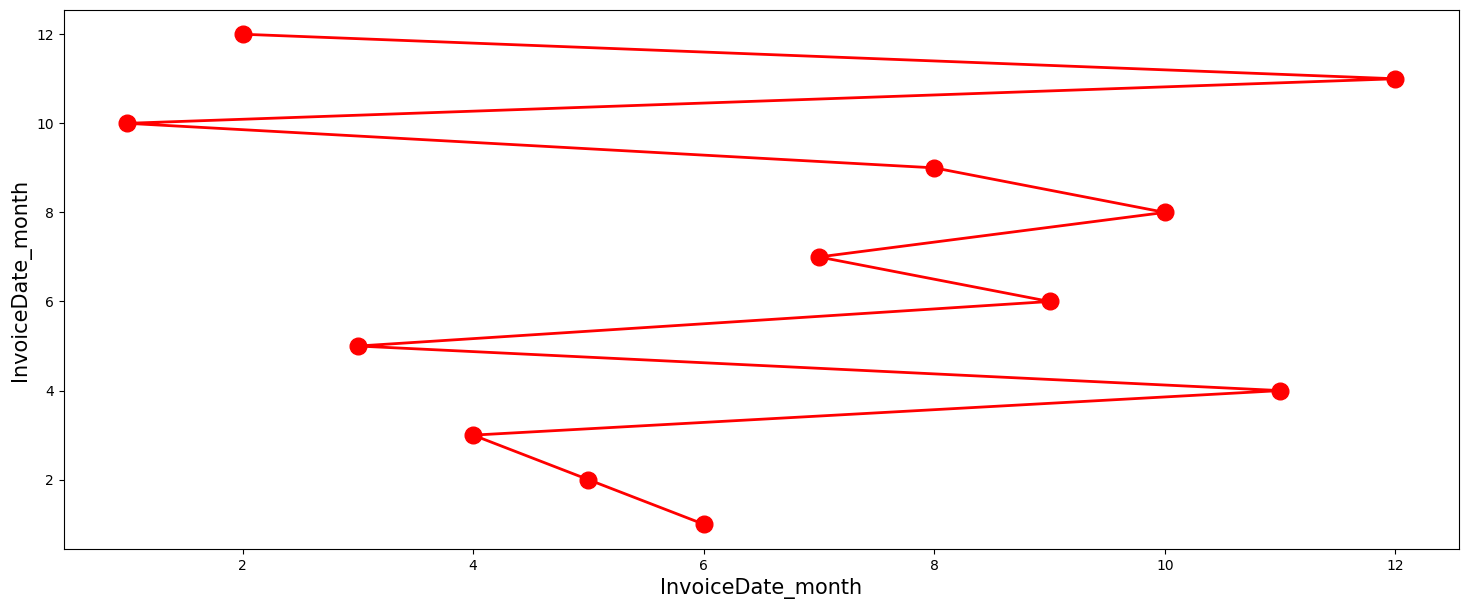

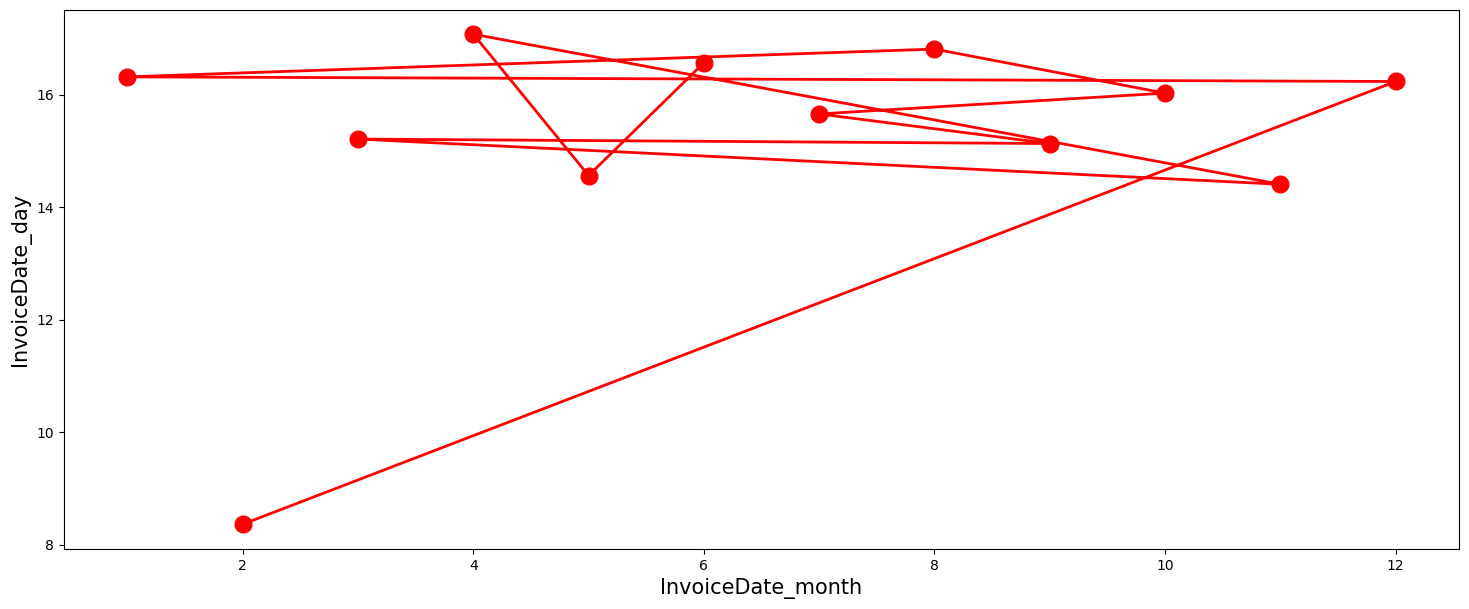

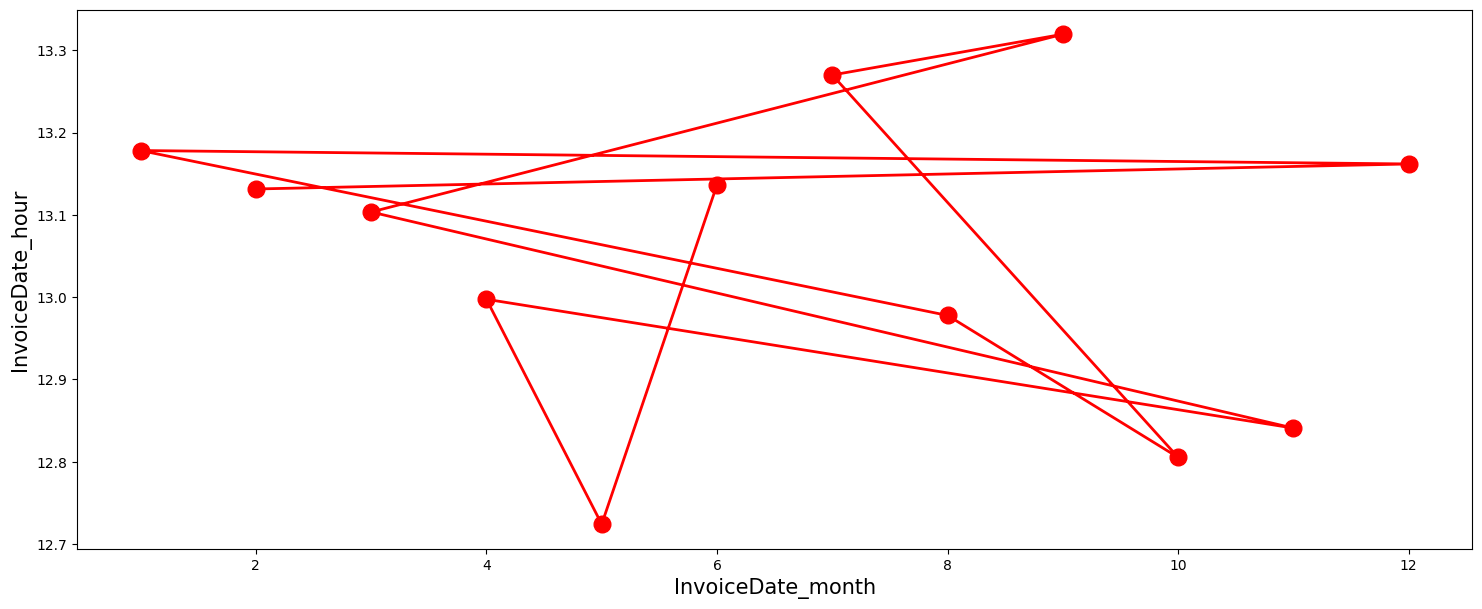

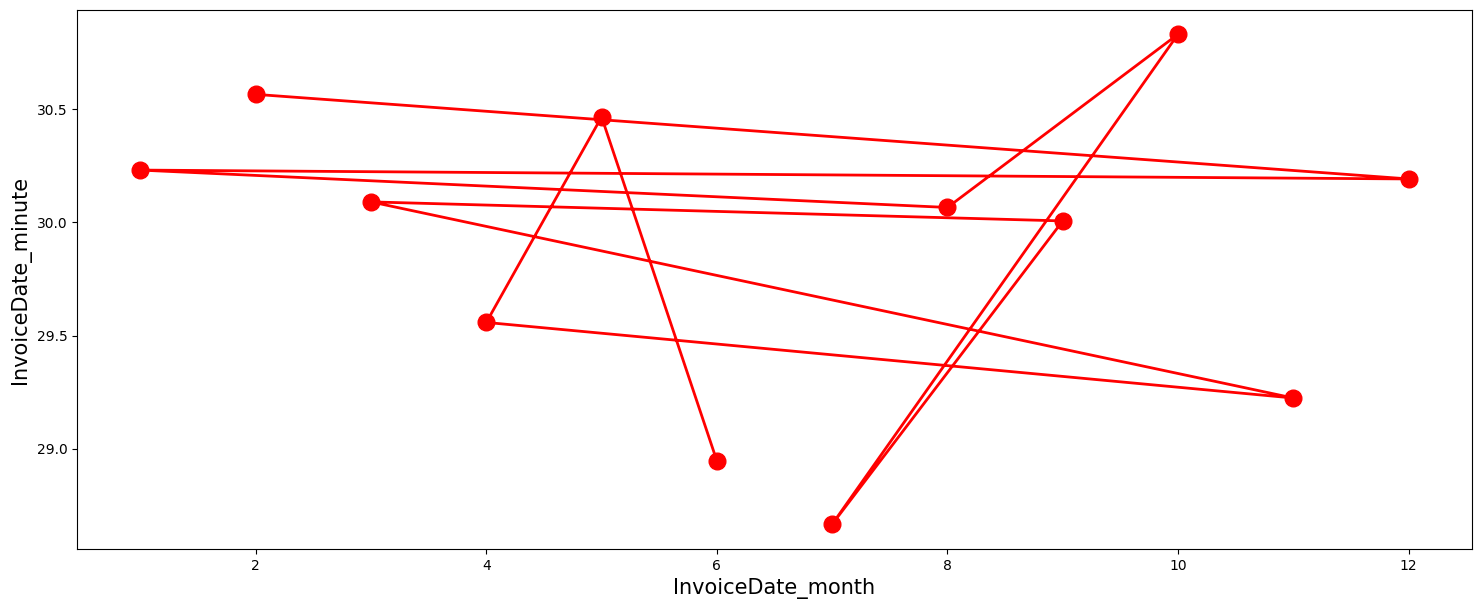

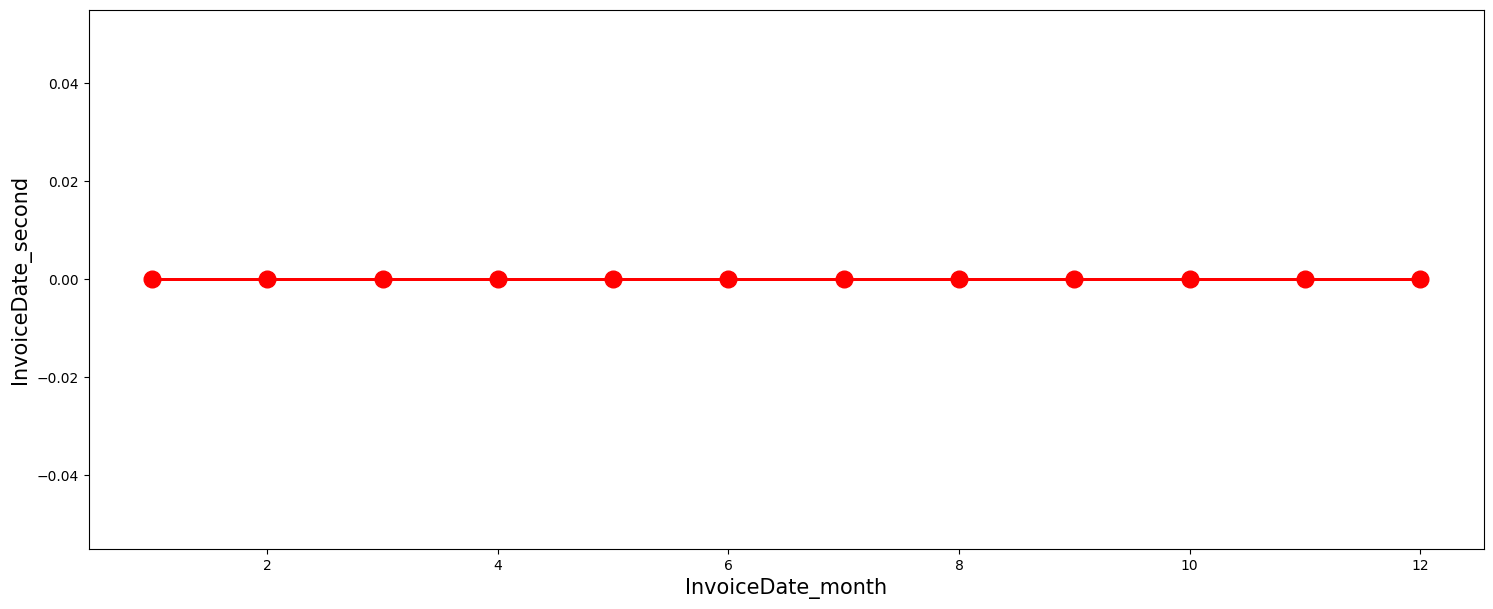

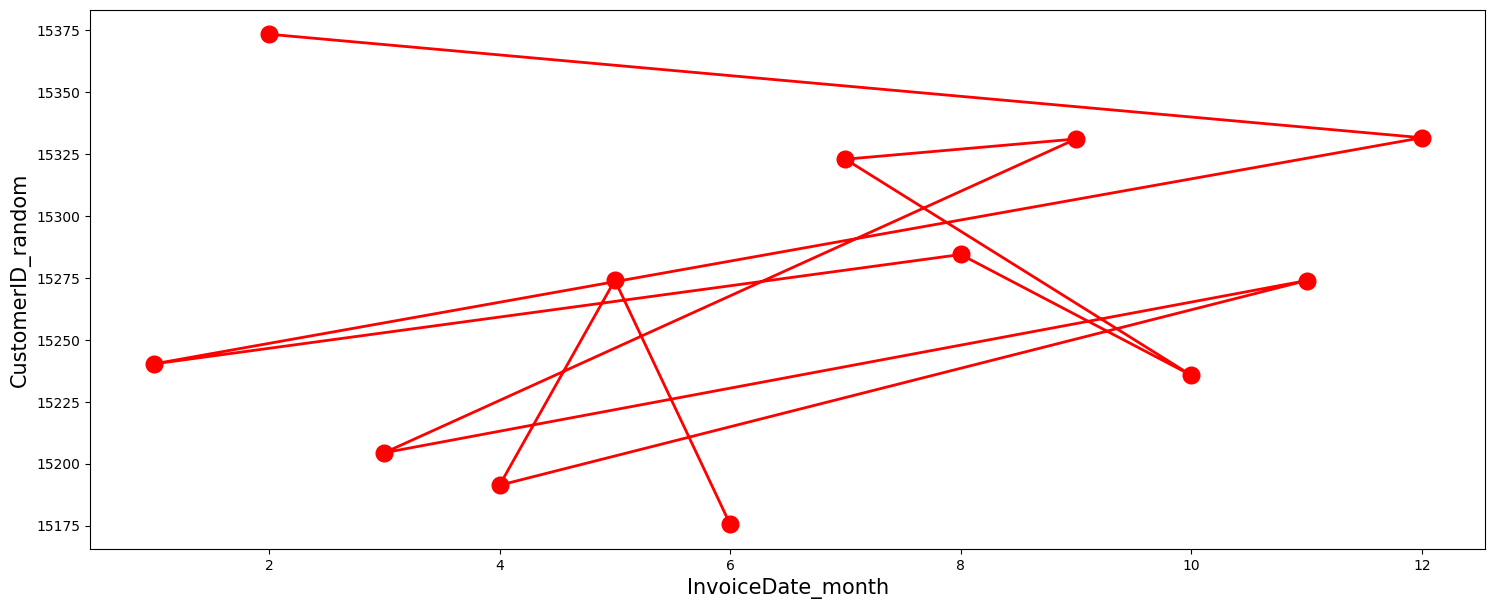

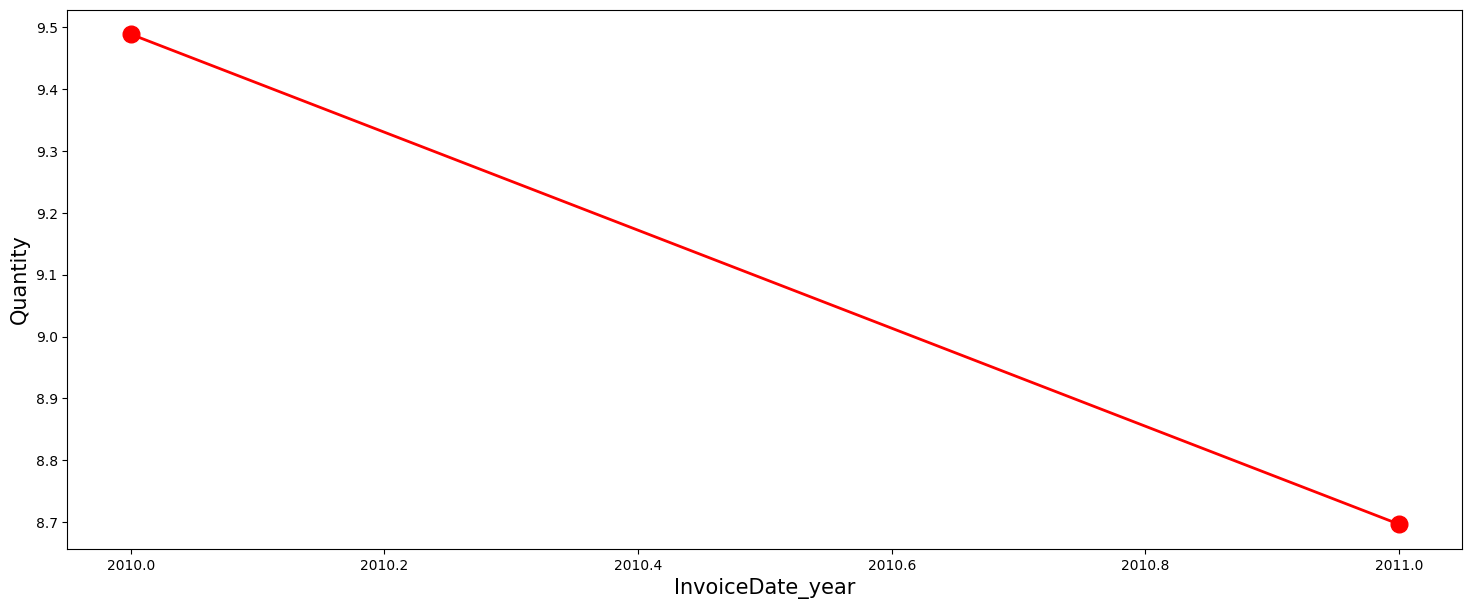

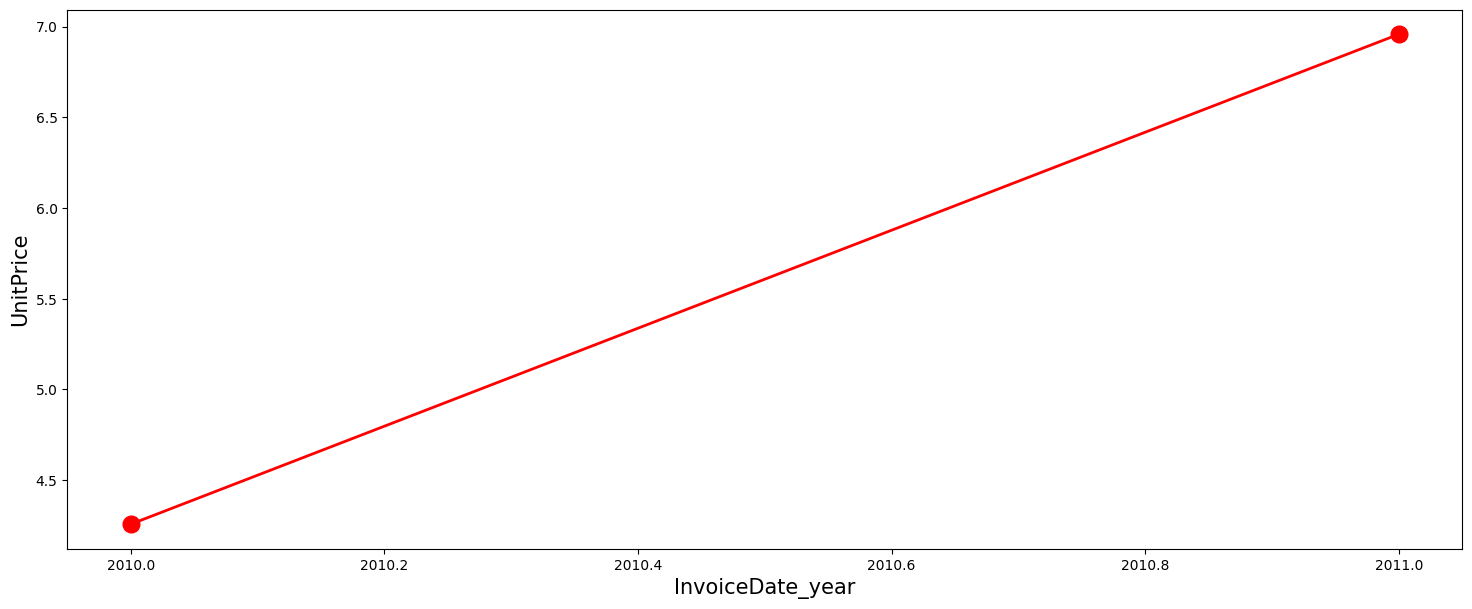

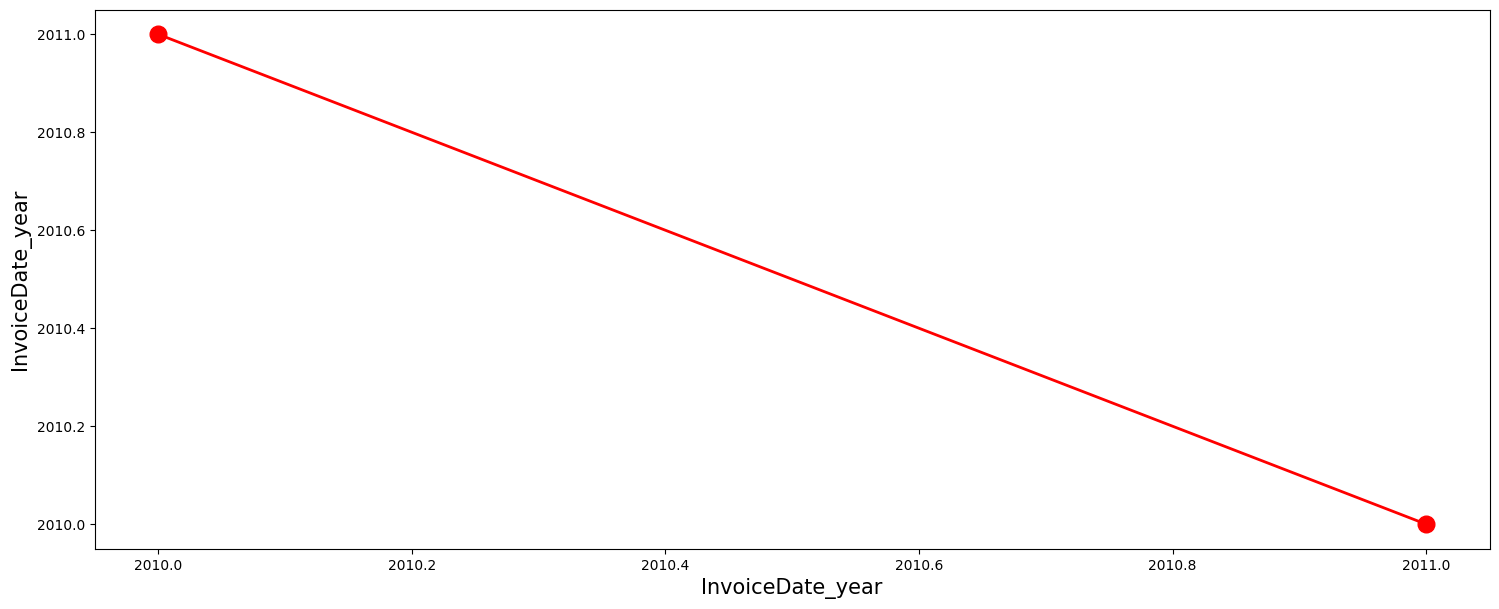

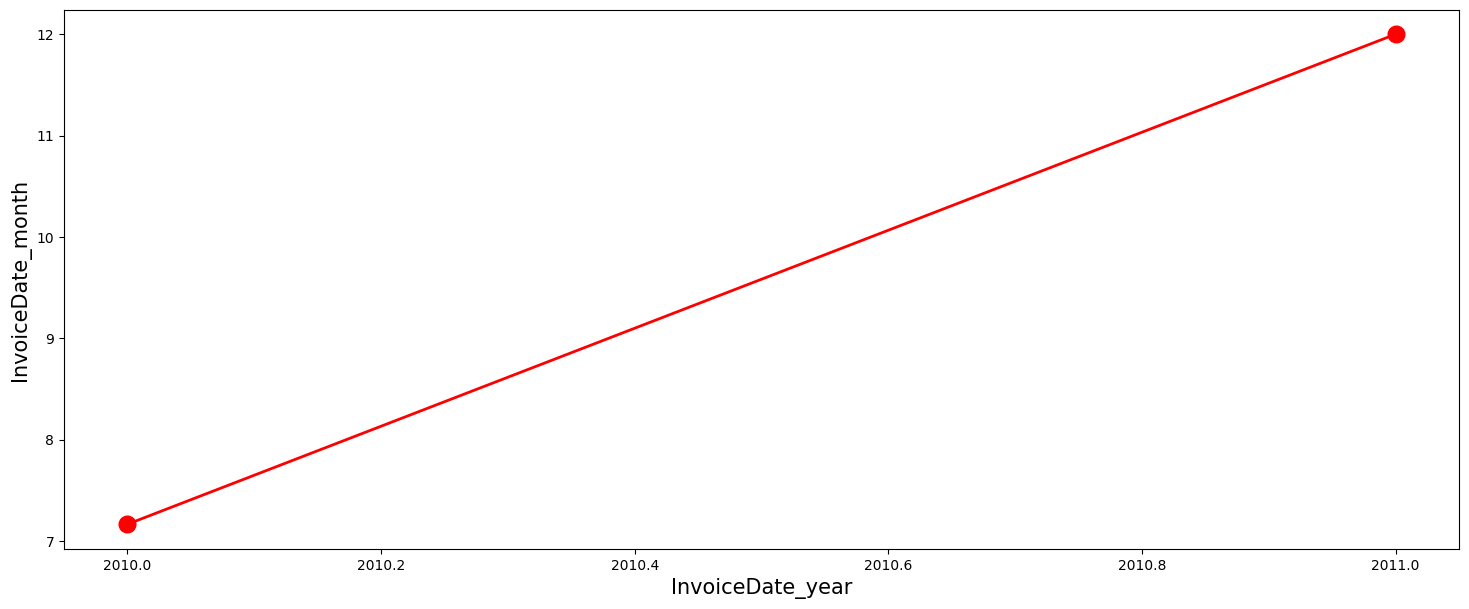

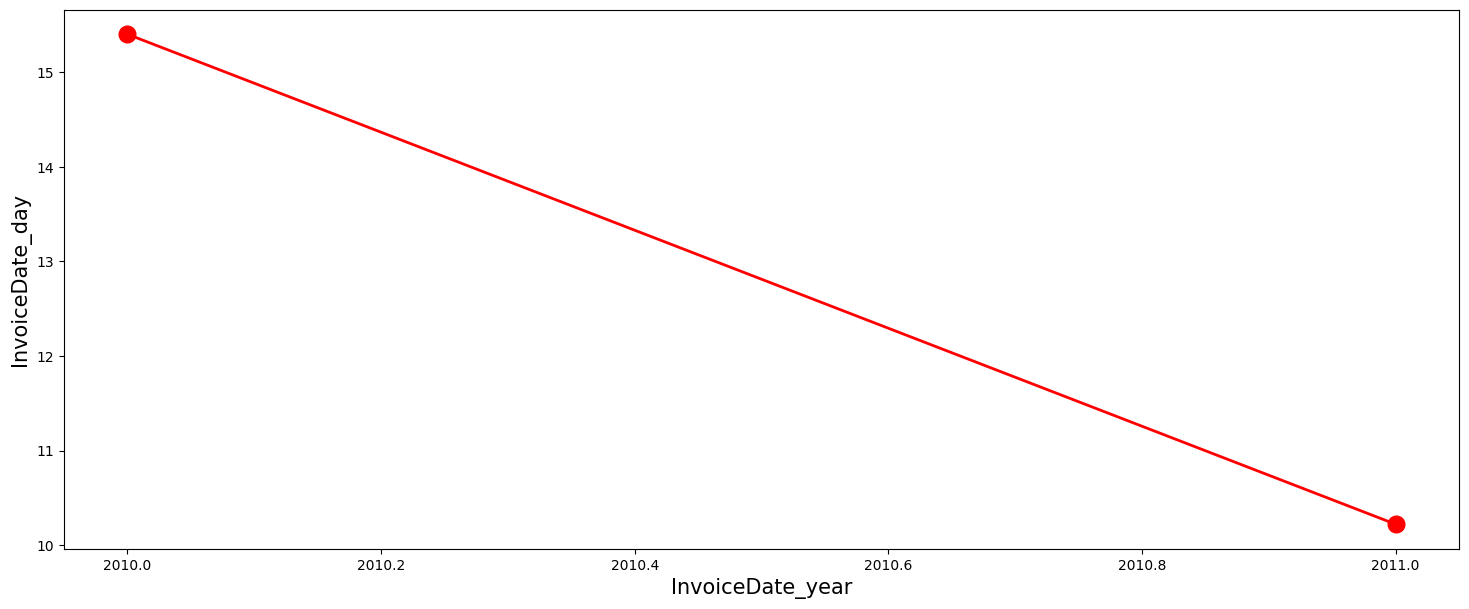

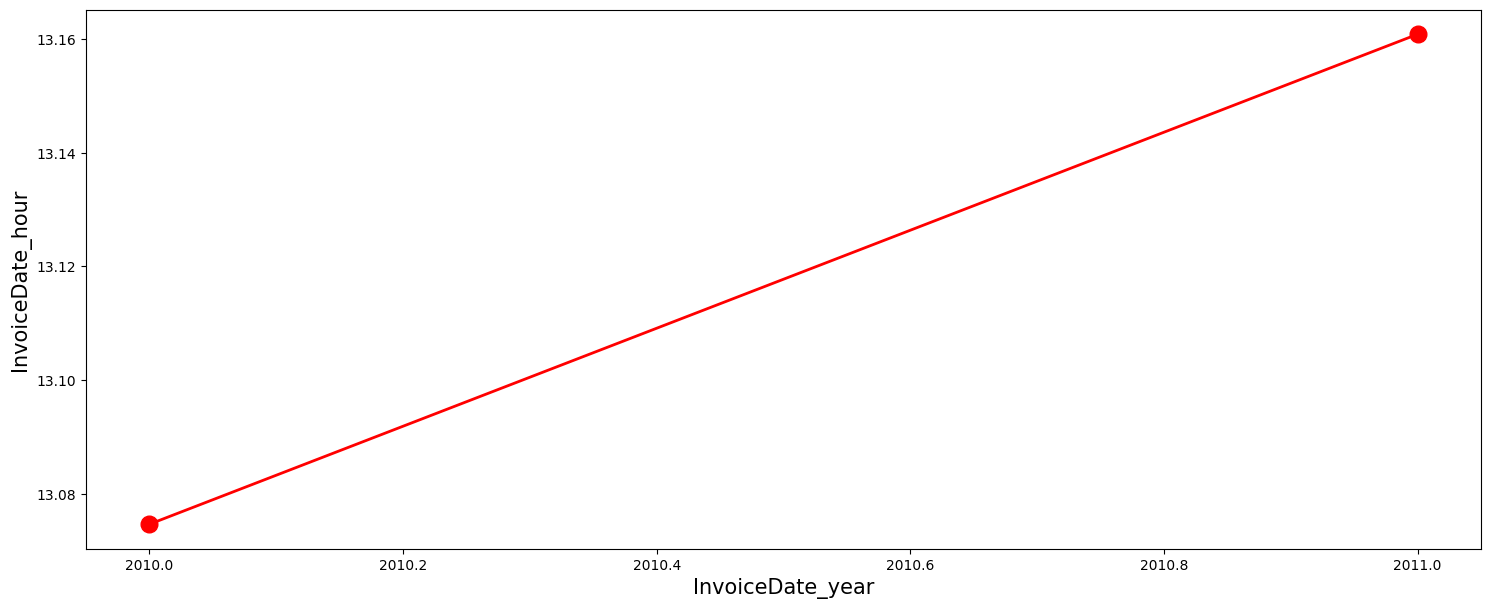

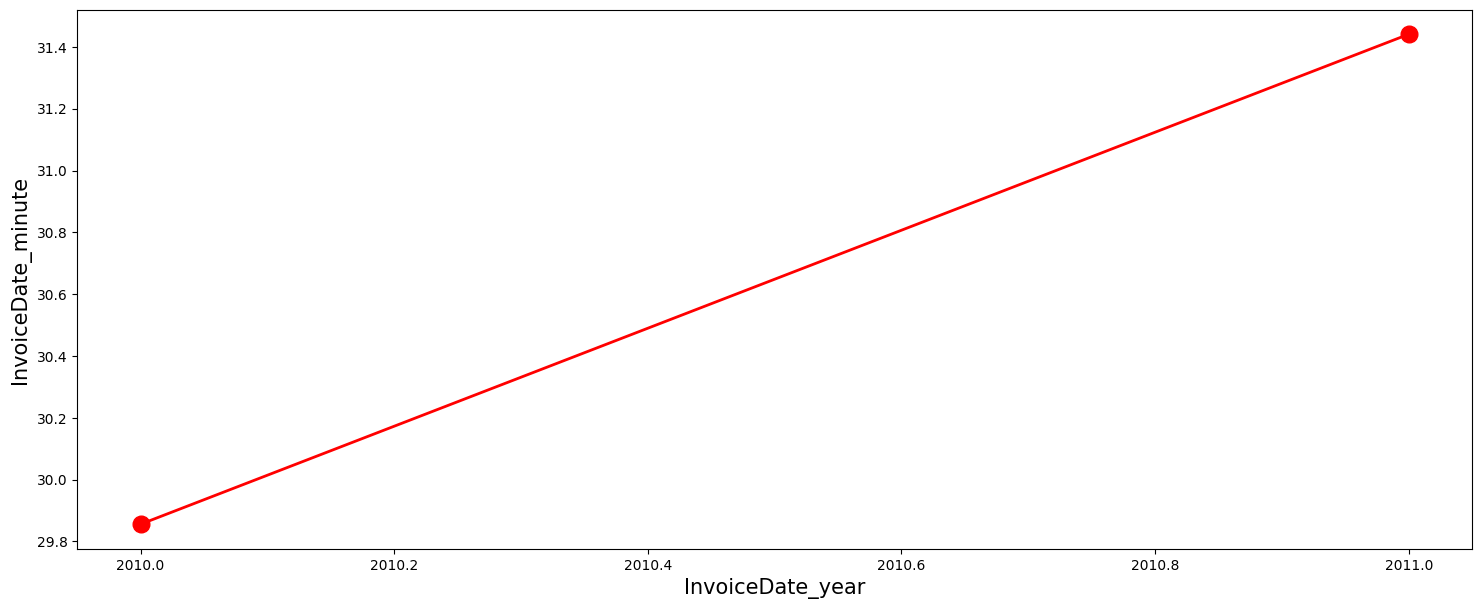

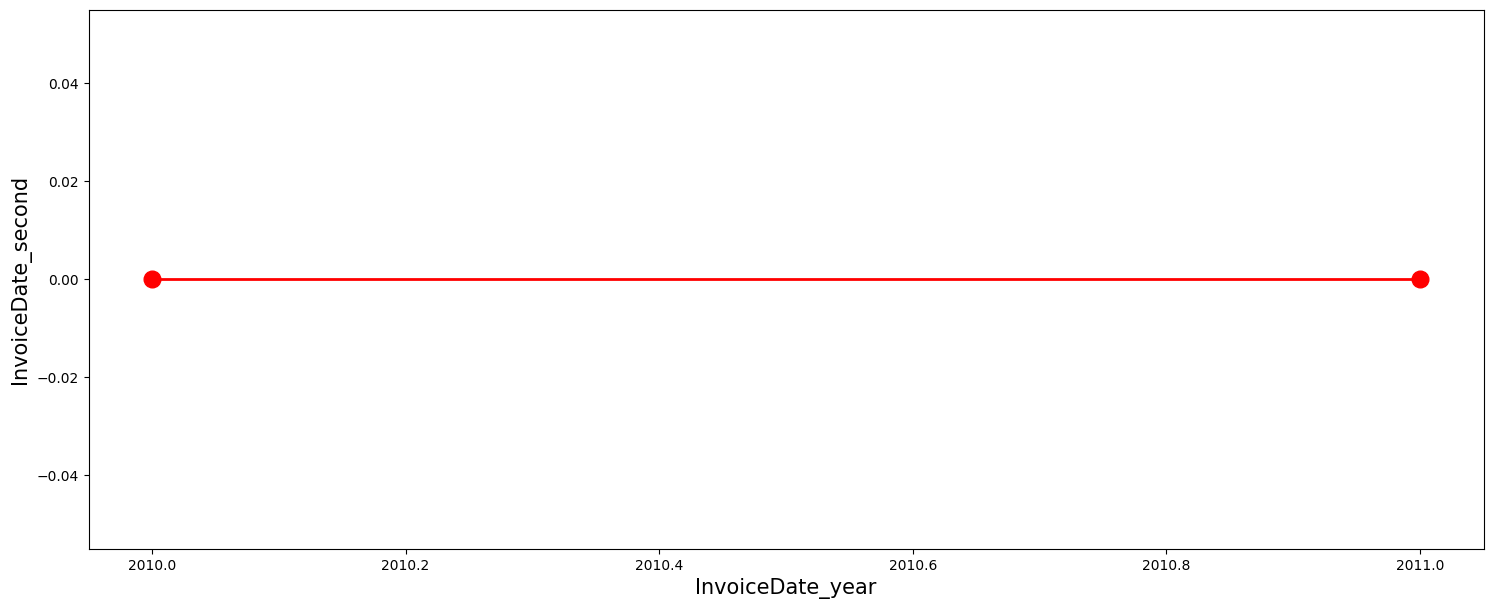

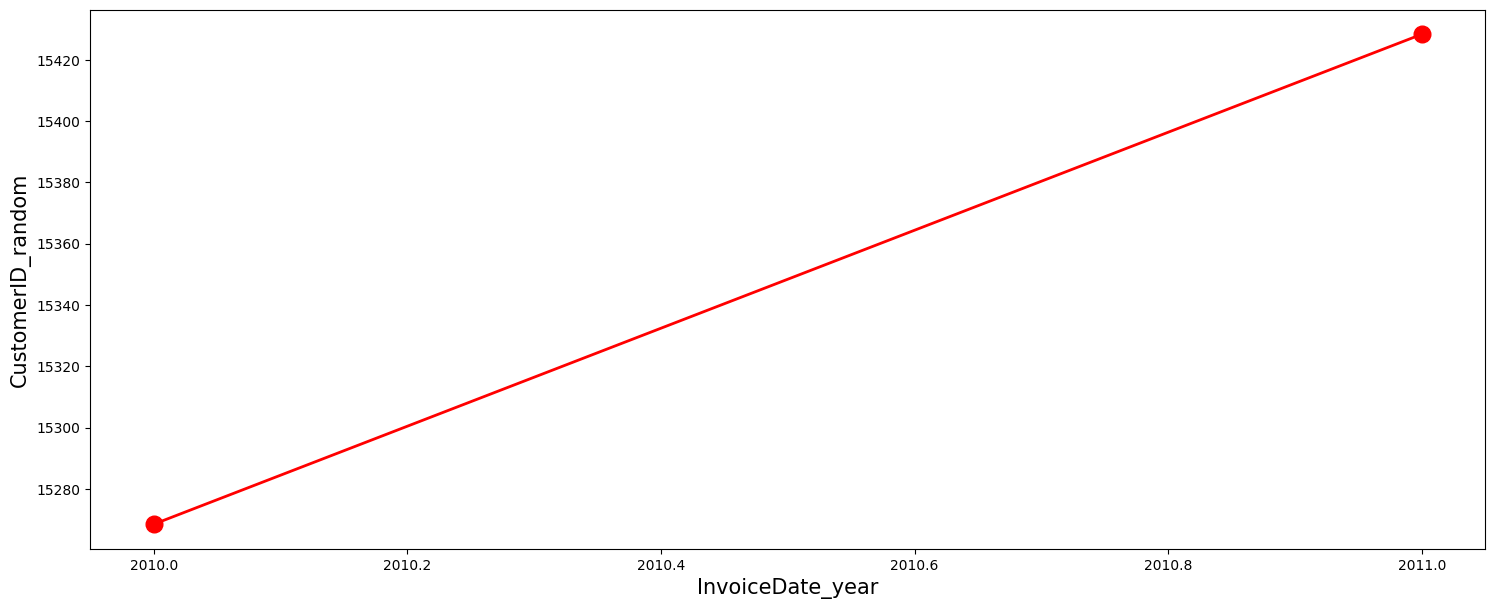

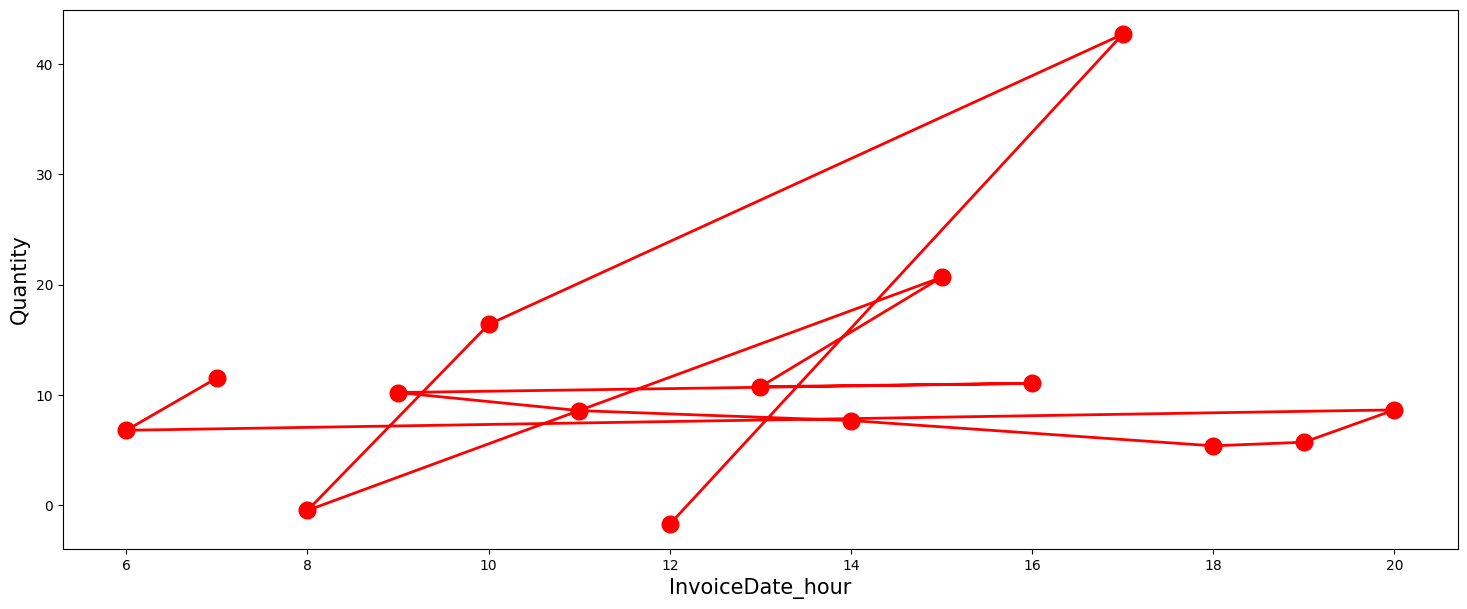

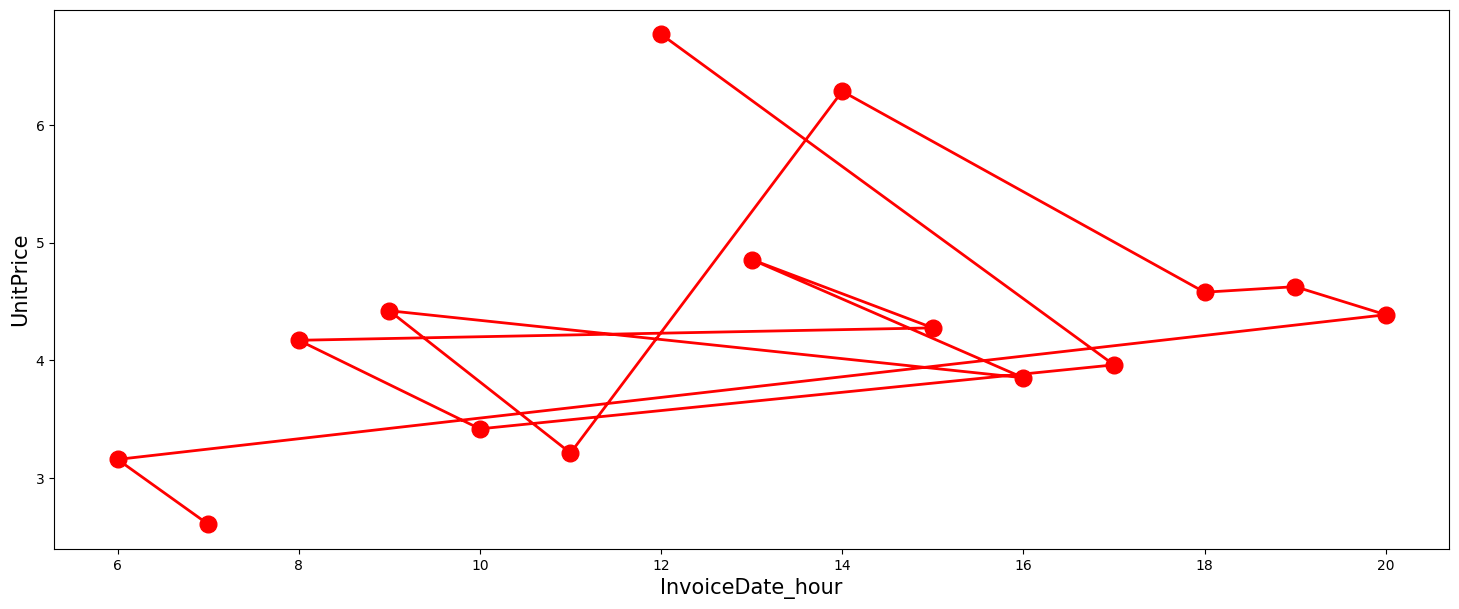

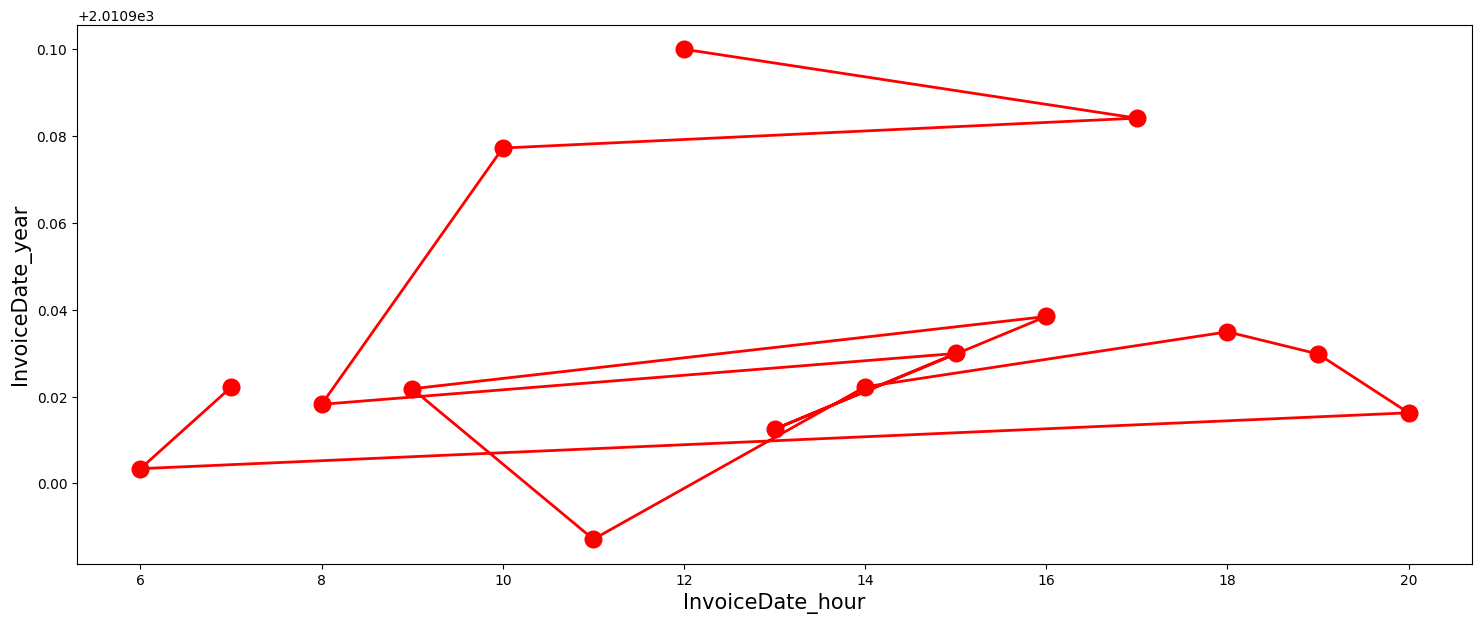

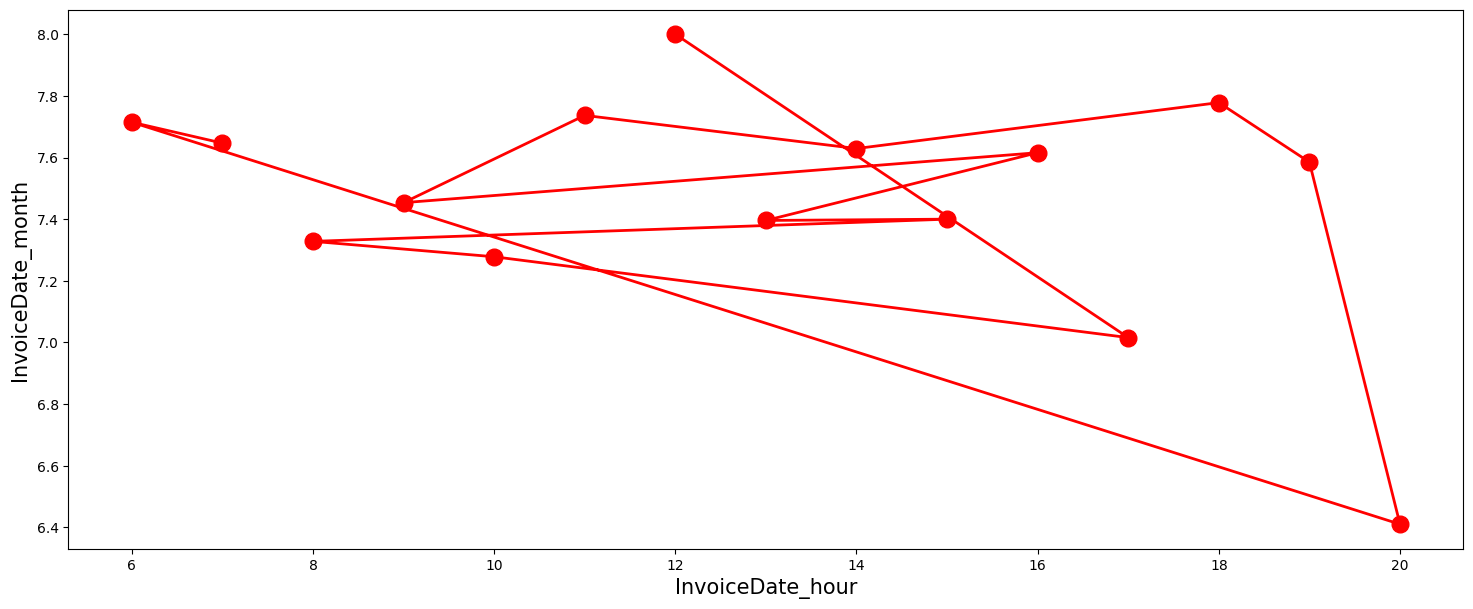

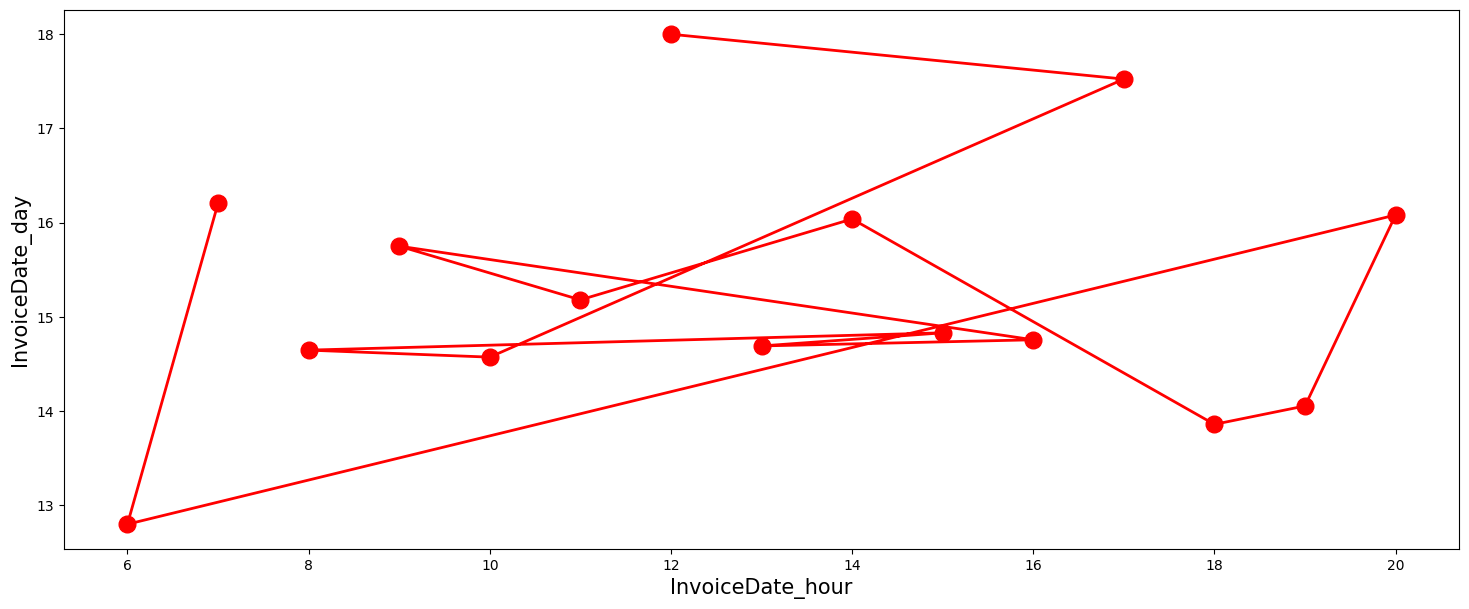

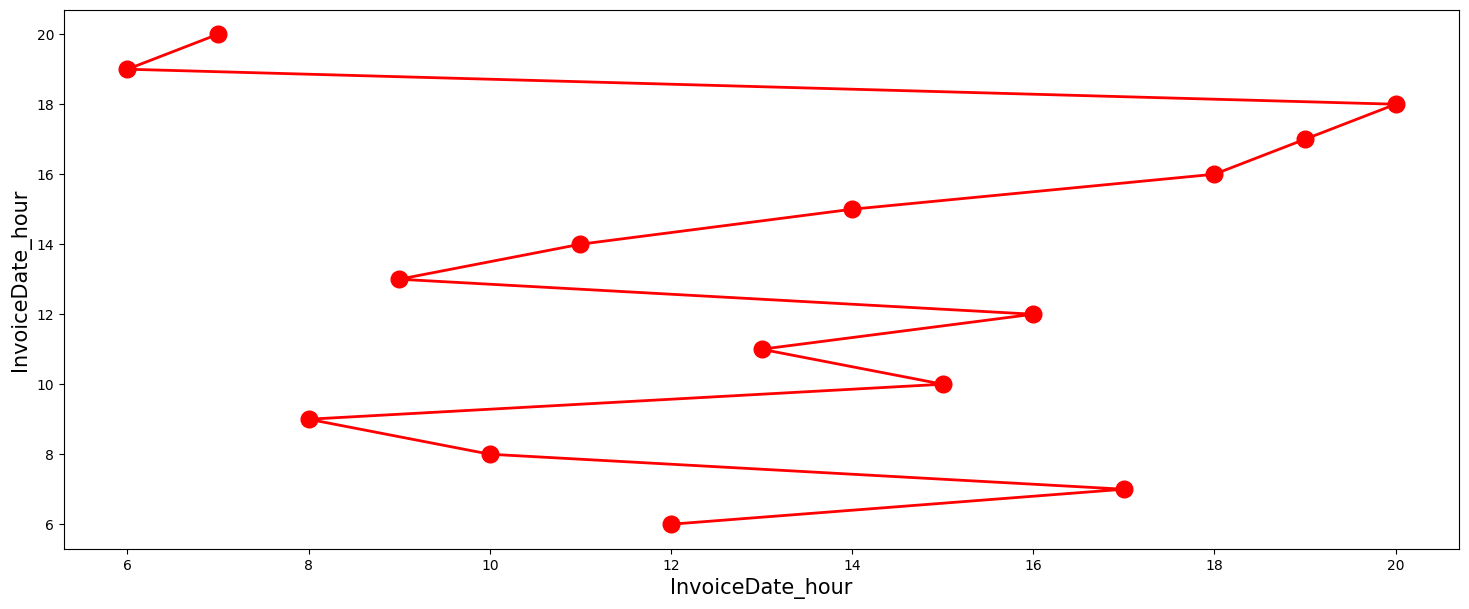

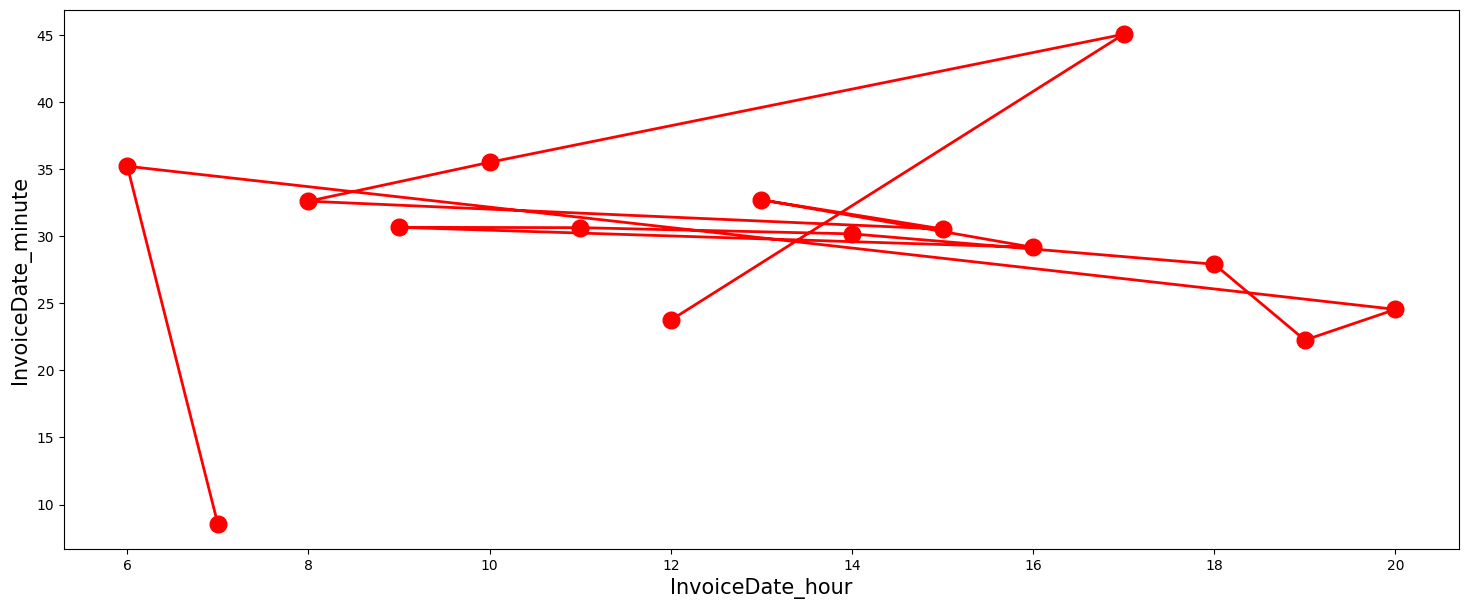

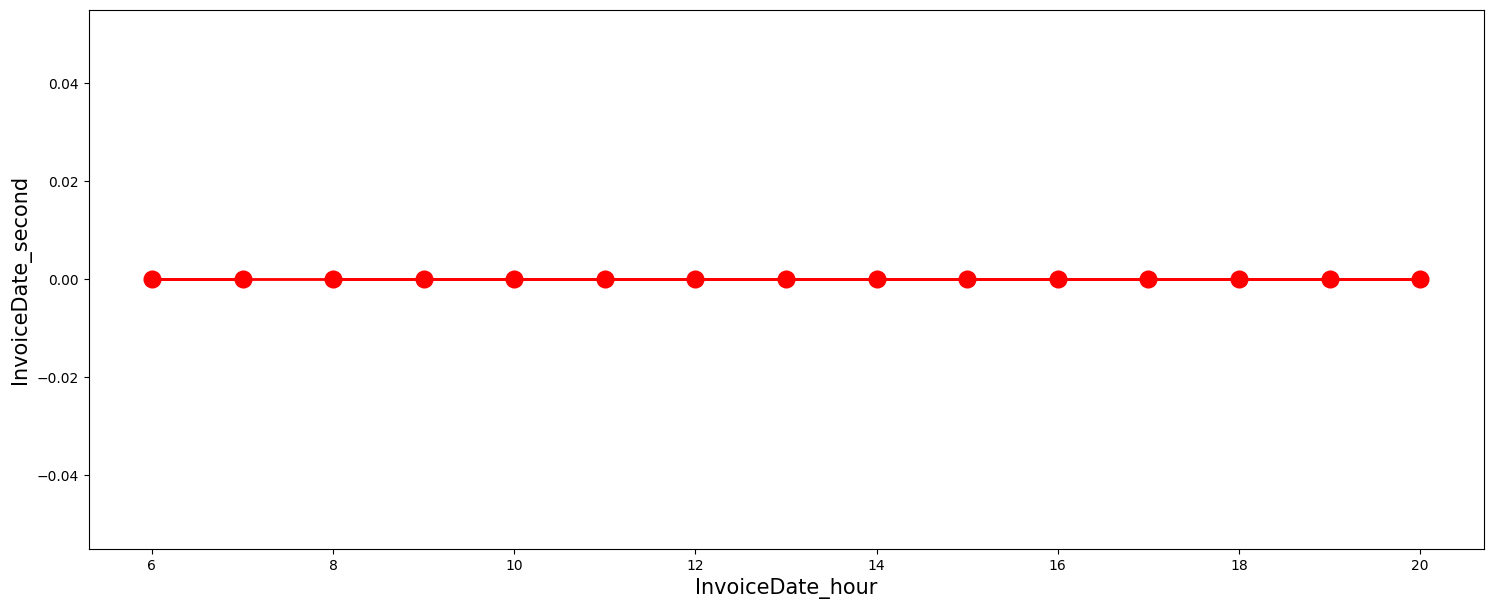

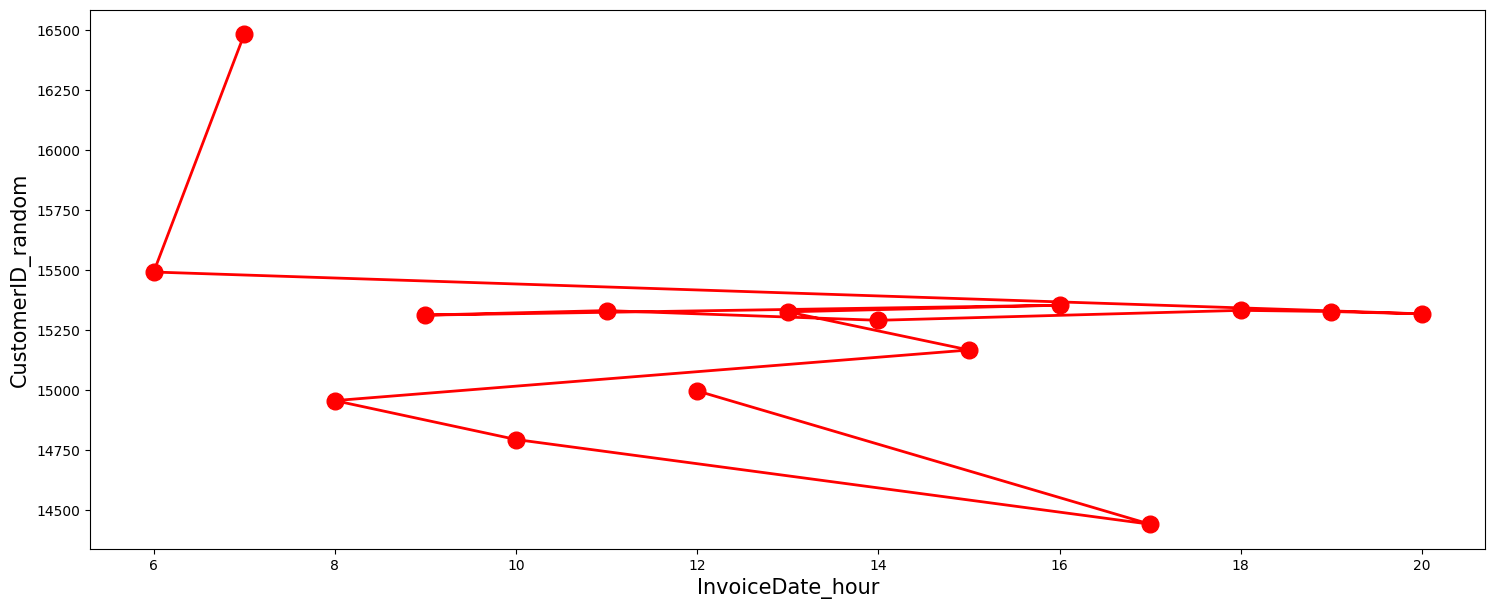

In [43]:
for i in ['InvoiceDate_day','InvoiceDate_month','InvoiceDate_year','InvoiceDate_hour']:
  for j in numerical_features:
    s1=dataset[i].unique()
    s2=dataset.groupby([i])[j].mean()

    plt.rcParams['figure.figsize'] = (18, 7)

    plt.plot(s1,s2,color='r', marker='o', linewidth=2, markersize=12)


    plt.xlabel(i, fontsize = 15)
    plt.ylabel(j, fontsize = 15)
    plt.show()

**Correlation**

<Axes: >

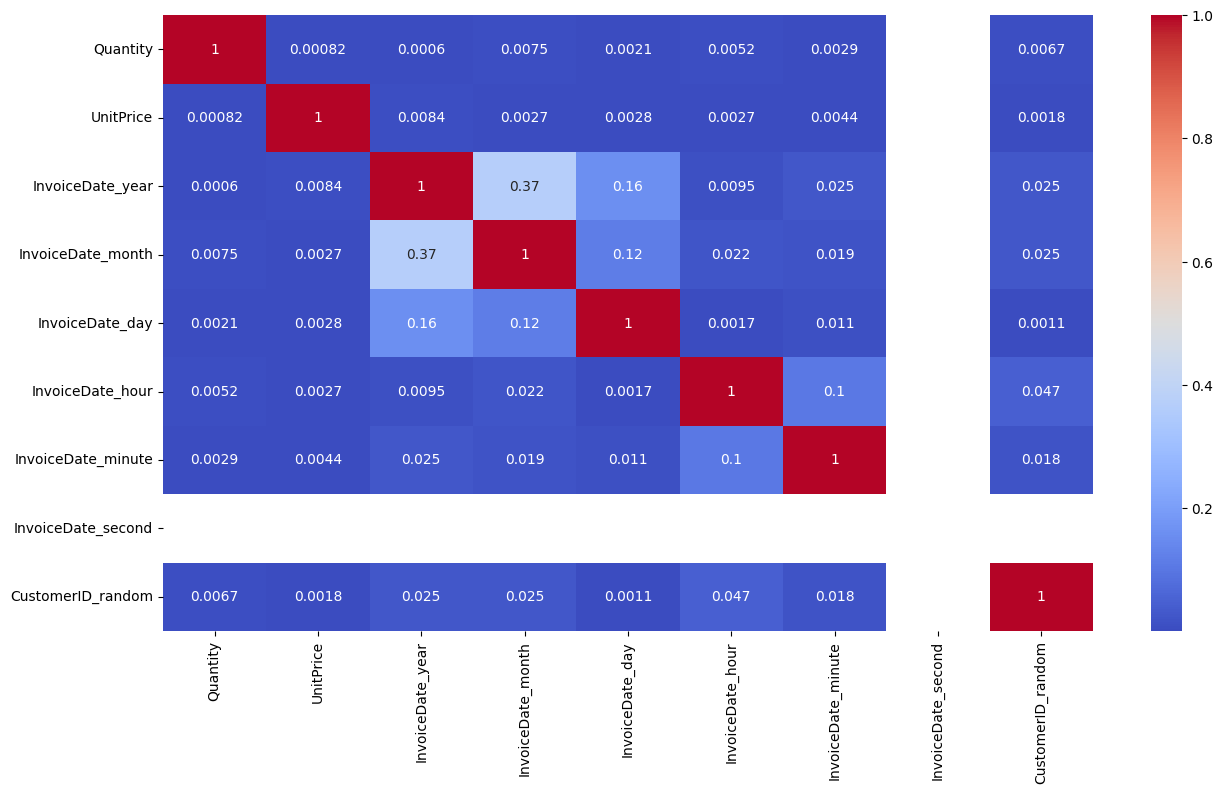

In [44]:
## Correlation
plt.figure(figsize=(15,8))
correlation=dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [45]:
corr = dataset.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

## **Handling Categorical Features**

In [46]:
# Catagorical
dataset.head()

InvoiceNo StockCode                       Description  Quantity  \
209268    555200     71459    HANGING JAM JAR T-LIGHT HOLDER        24   
207108    554974     21128                GOLD FISHING GNOME         4   
167085    550972     21086       SET/6 RED SPOTTY PAPER CUPS         4   
471836    576652     22812  PACK 3 BOXES CHRISTMAS PANETTONE         3   
115865    546157     22180                    RETROSPOT LAMP         2   

               InvoiceDate  UnitPrice         Country  InvoiceDate_year  \
209268 2011-06-01 12:05:00       0.85  United Kingdom              2011   
207108 2011-05-27 17:14:00       6.95  United Kingdom              2011   
167085 2011-04-21 17:05:00       0.65  United Kingdom              2011   
471836 2011-11-16 10:39:00       1.95  United Kingdom              2011   
115865 2011-03-10 08:40:00       9.95  United Kingdom              2011   

        InvoiceDate_month  InvoiceDate_day  InvoiceDate_hour  \
209268                  6                1                12   
207108                  5               27                17   
167085                  4               21                17   
471836                 11               16                10   
115865                  3               10                 8   

        InvoiceDate_minute  InvoiceDate_second  CustomerID_random  
209268                   5                   0            17315.0  
207108                  14                   0            14031.0  
167085                   5                   0            14031.0  
471836                  39                   0            17198.0  
115865                  40                   0            13502.0

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99800 entries, 209268 to 290024
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   InvoiceNo           99800 non-null  object        
 1   StockCode           99800 non-null  object        
 2   Description         99800 non-null  object        
 3   Quantity            99800 non-null  int64         
 4   InvoiceDate         99800 non-null  datetime64[ns]
 5   UnitPrice           99800 non-null  float64       
 6   Country             99800 non-null  object        
 7   InvoiceDate_year    99800 non-null  int64         
 8   InvoiceDate_month   99800 non-null  int64         
 9   InvoiceDate_day     99800 non-null  int64         
 10  InvoiceDate_hour    99800 non-null  int64         
 11  InvoiceDate_minute  99800 non-null  int64         
 12  InvoiceDate_second  99800 non-null  int64         
 13  CustomerID_random   99800 non-null  floa

**Univariate Analysis**

In [48]:
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

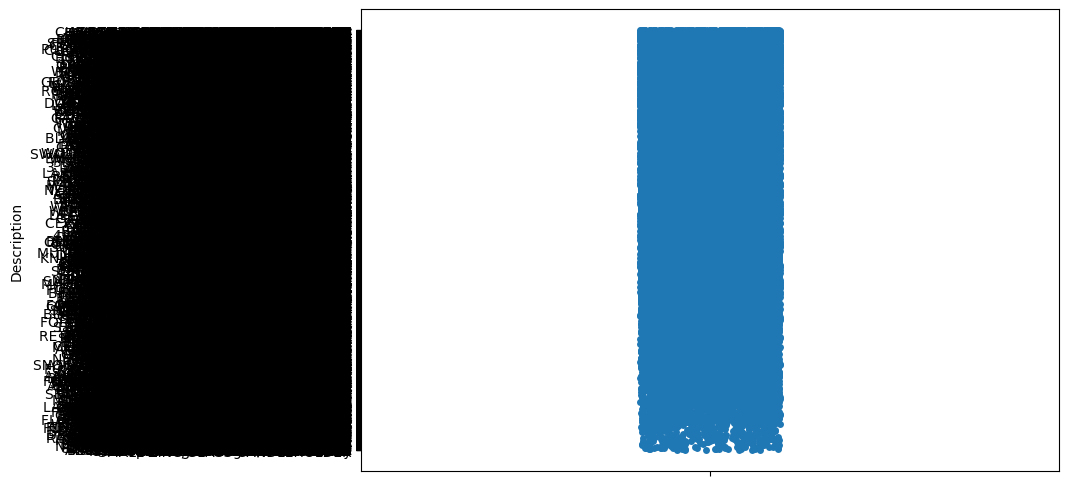

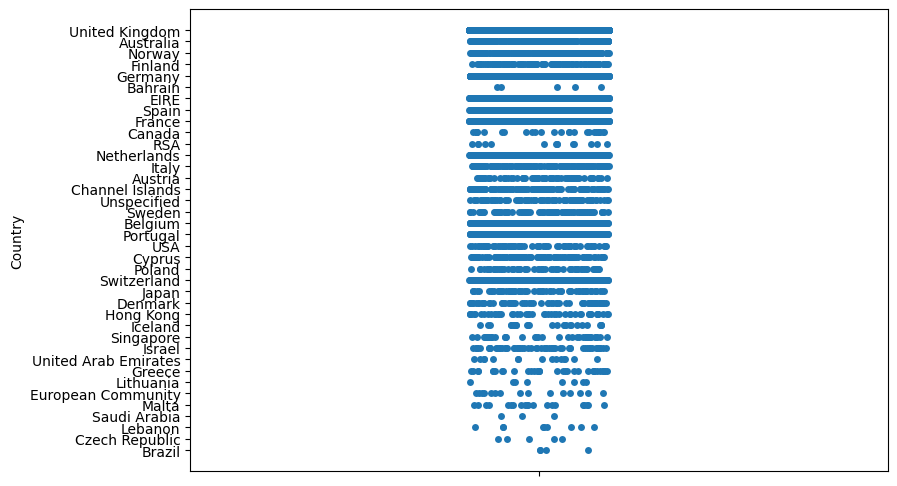

In [49]:
for col in [  'Description', 'Country']:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(dataset[col])

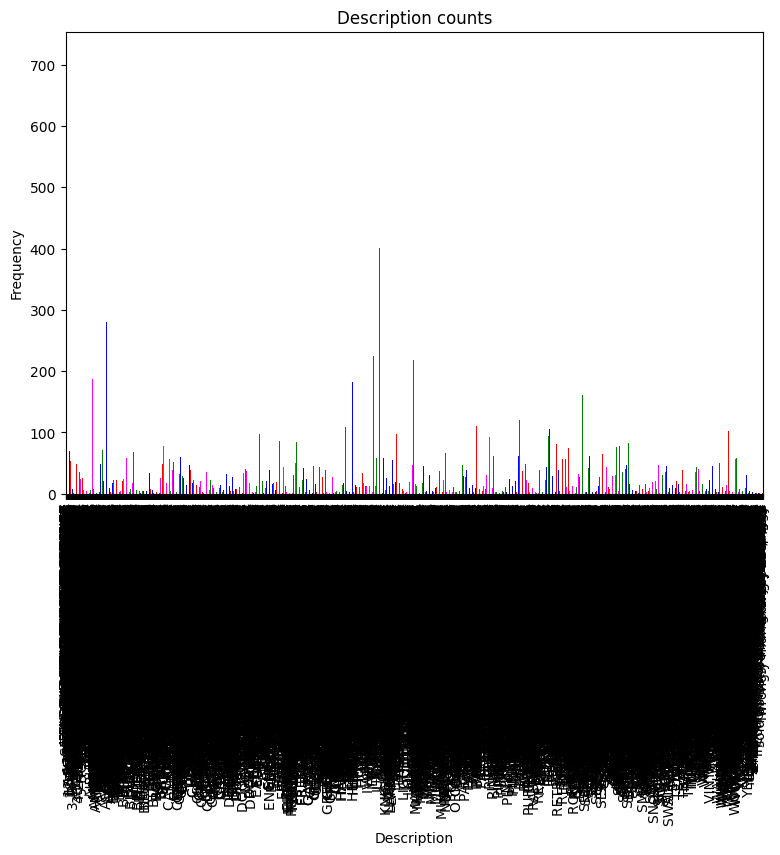

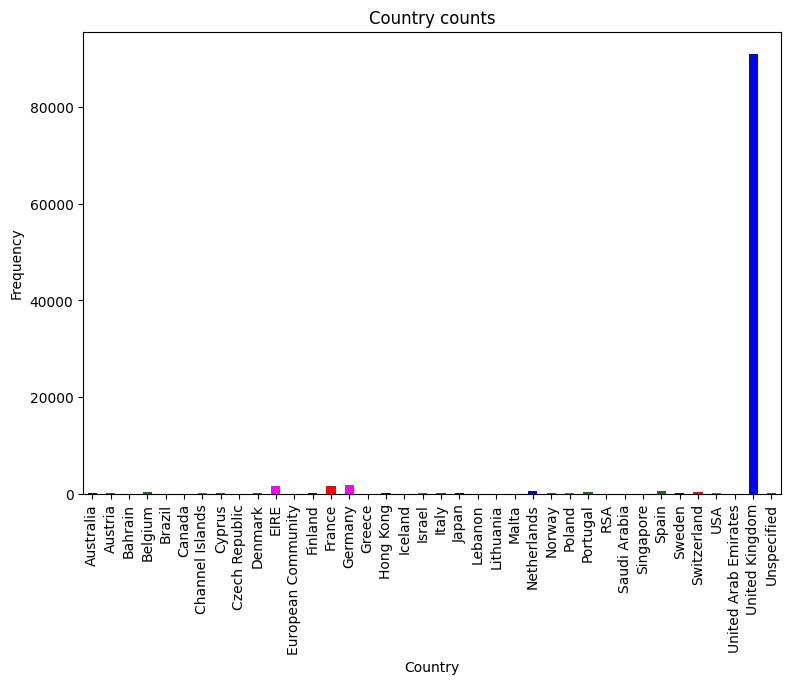

In [50]:
# plot a bar plot for each categorical feature count

for col in  [  'Description', 'Country']:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color=['blue','red','magenta','g'])
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

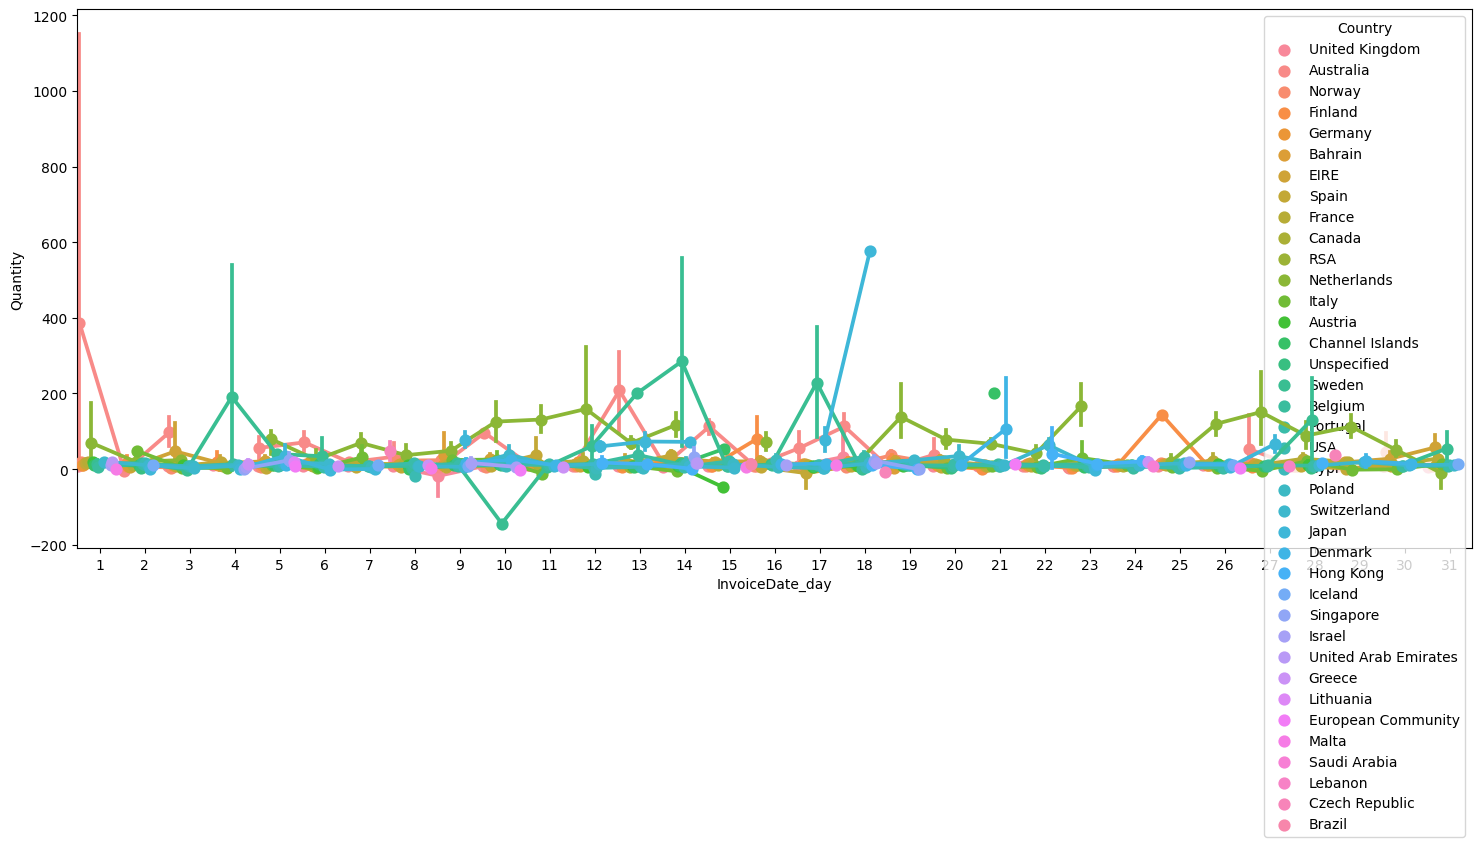

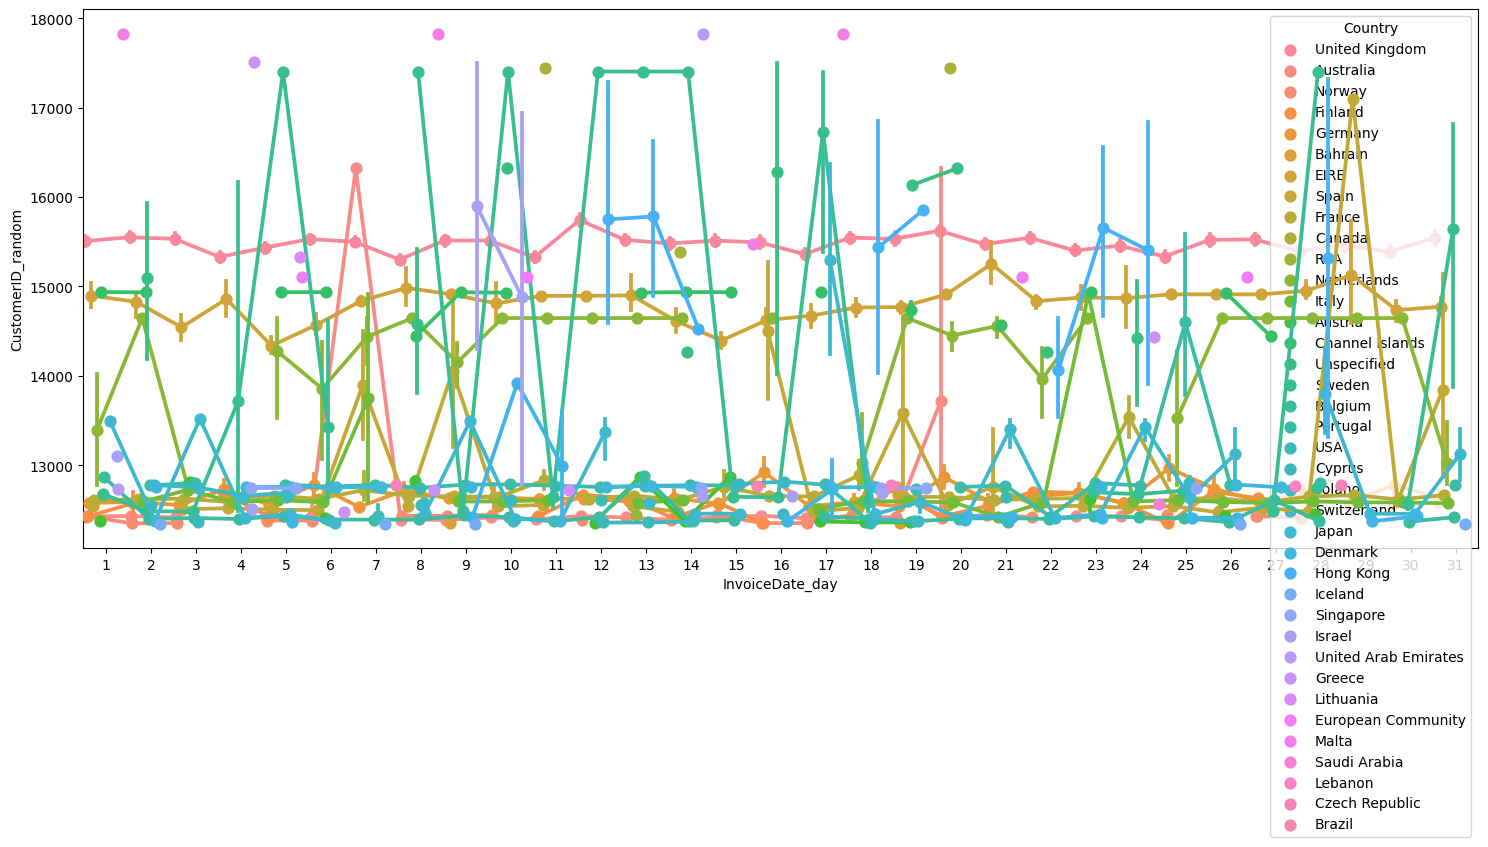

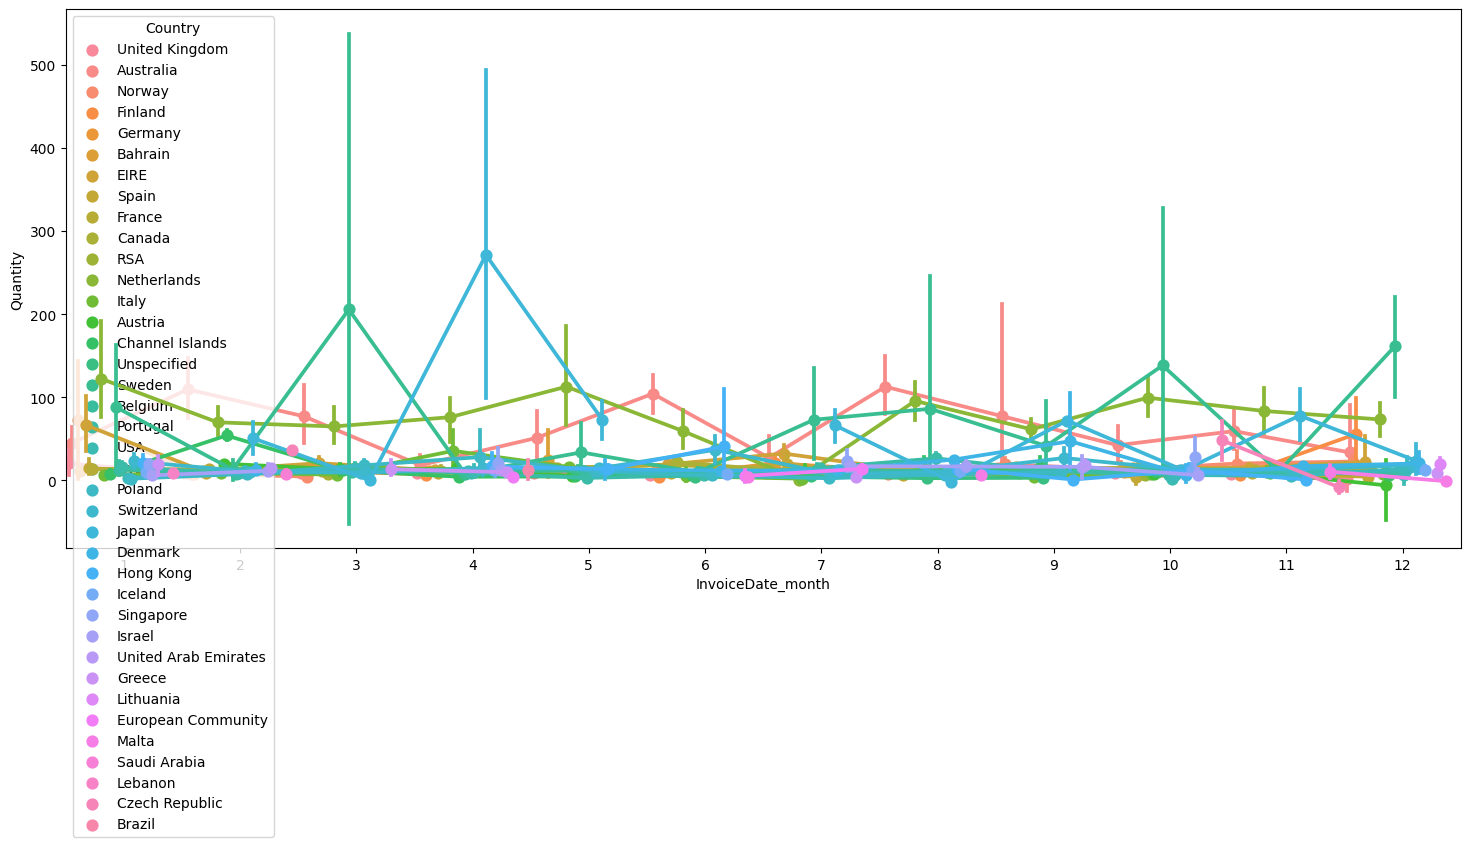

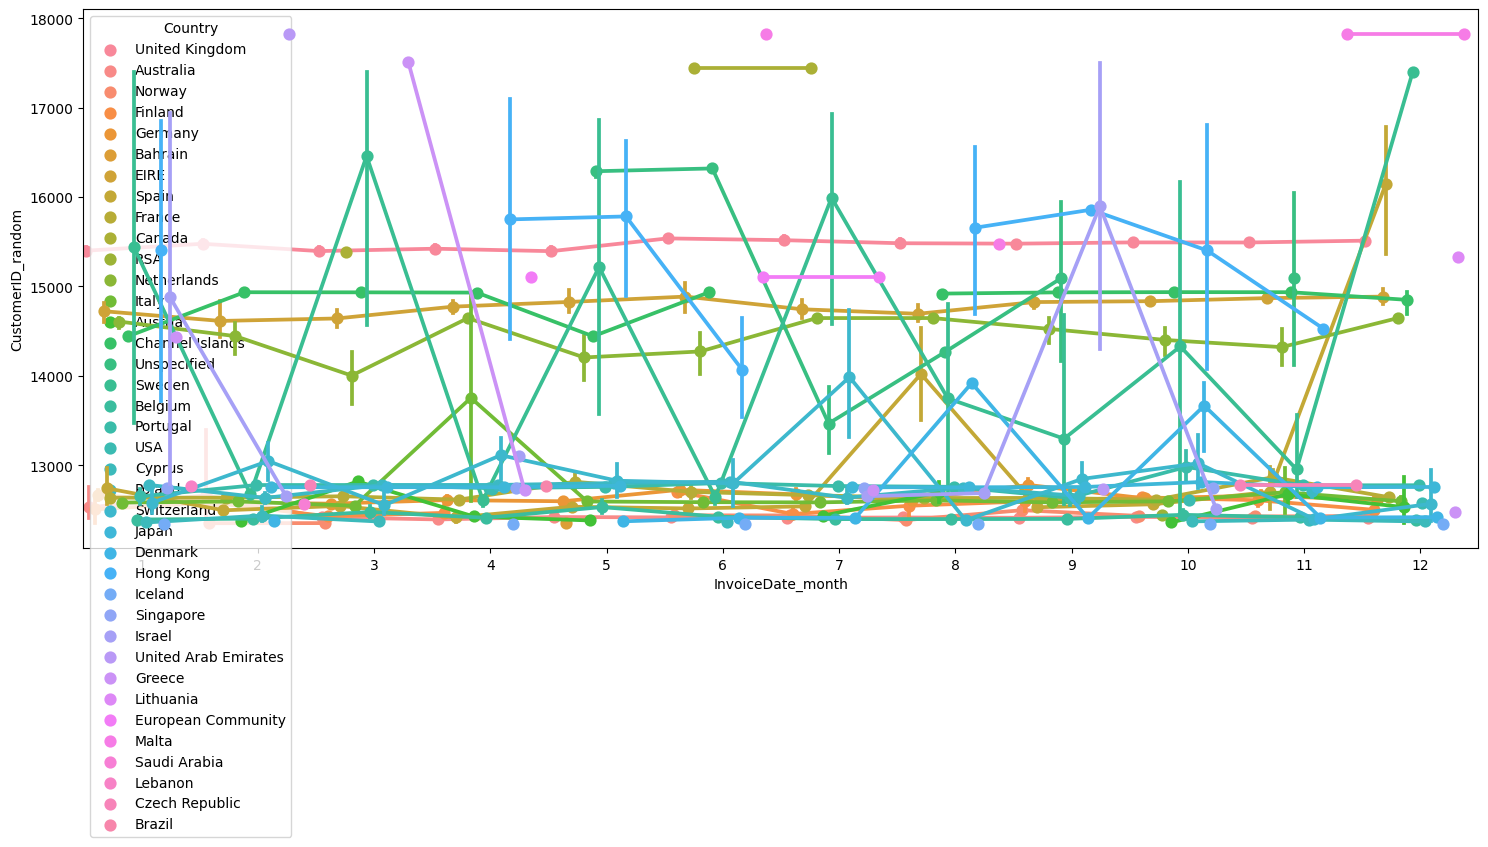

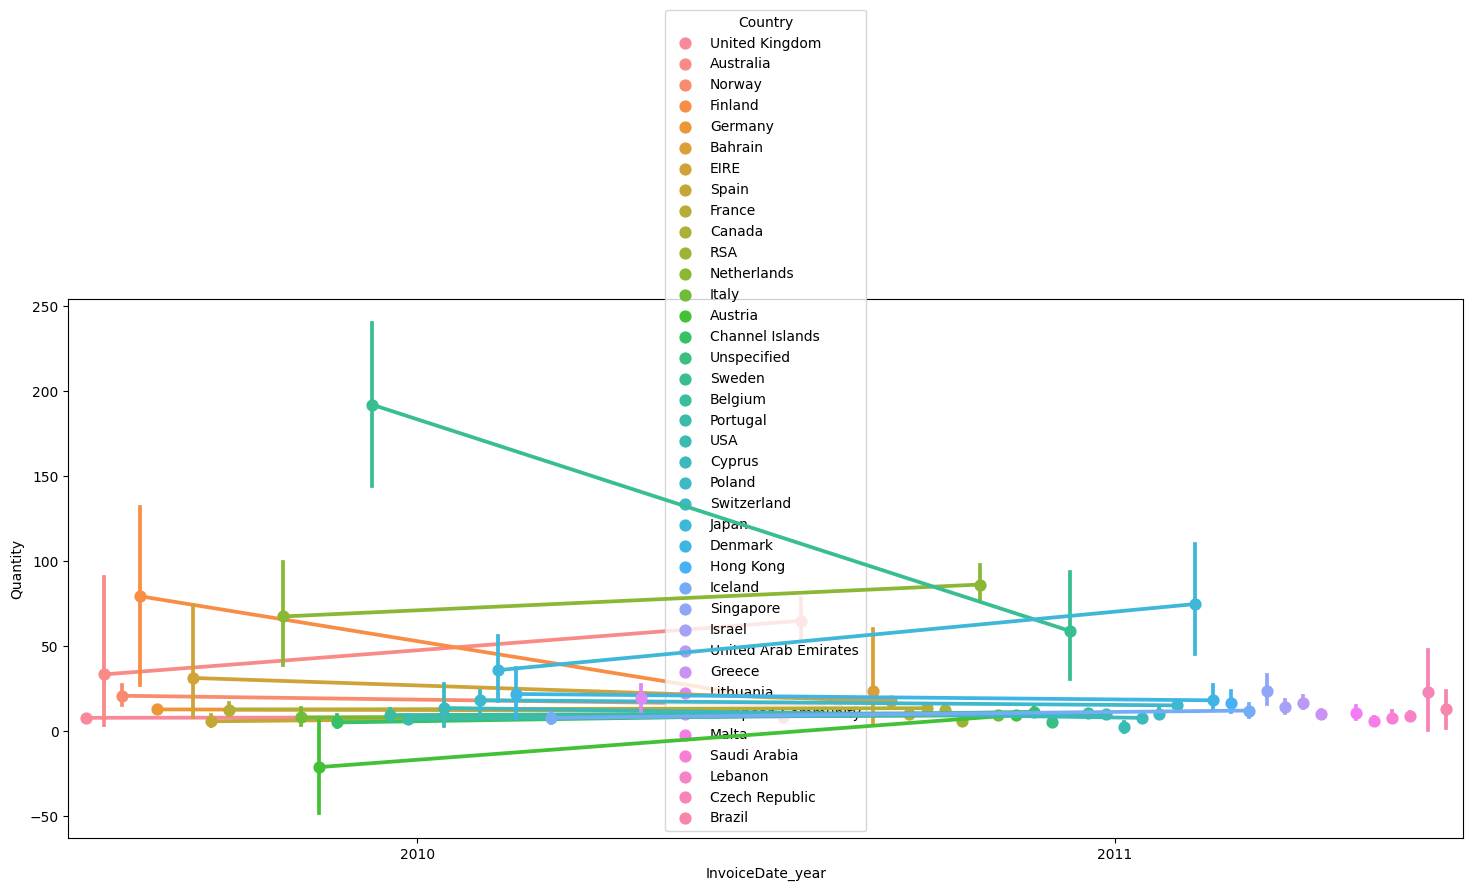

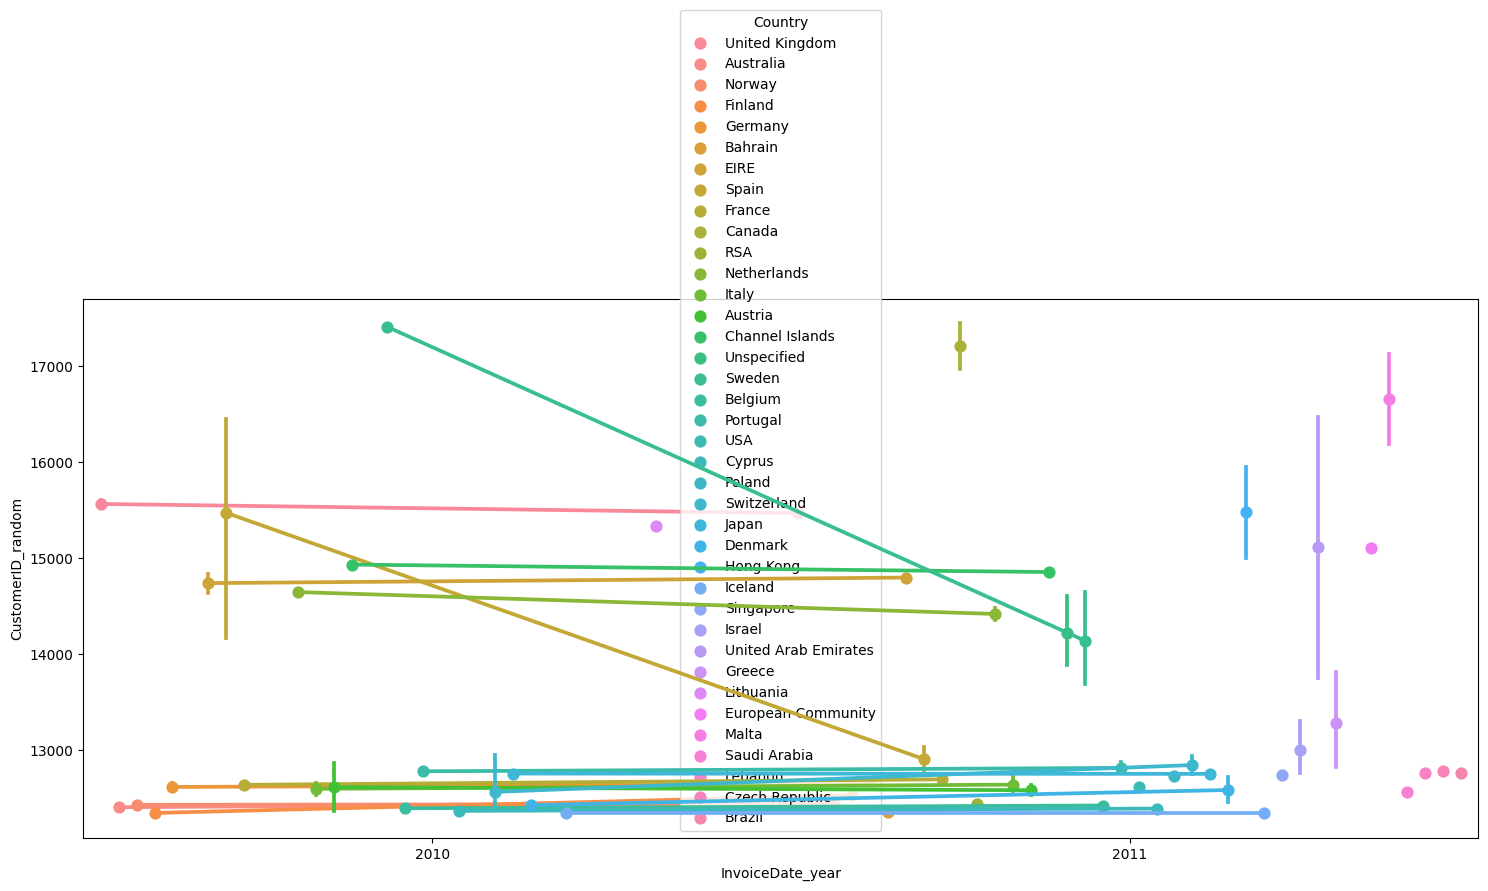

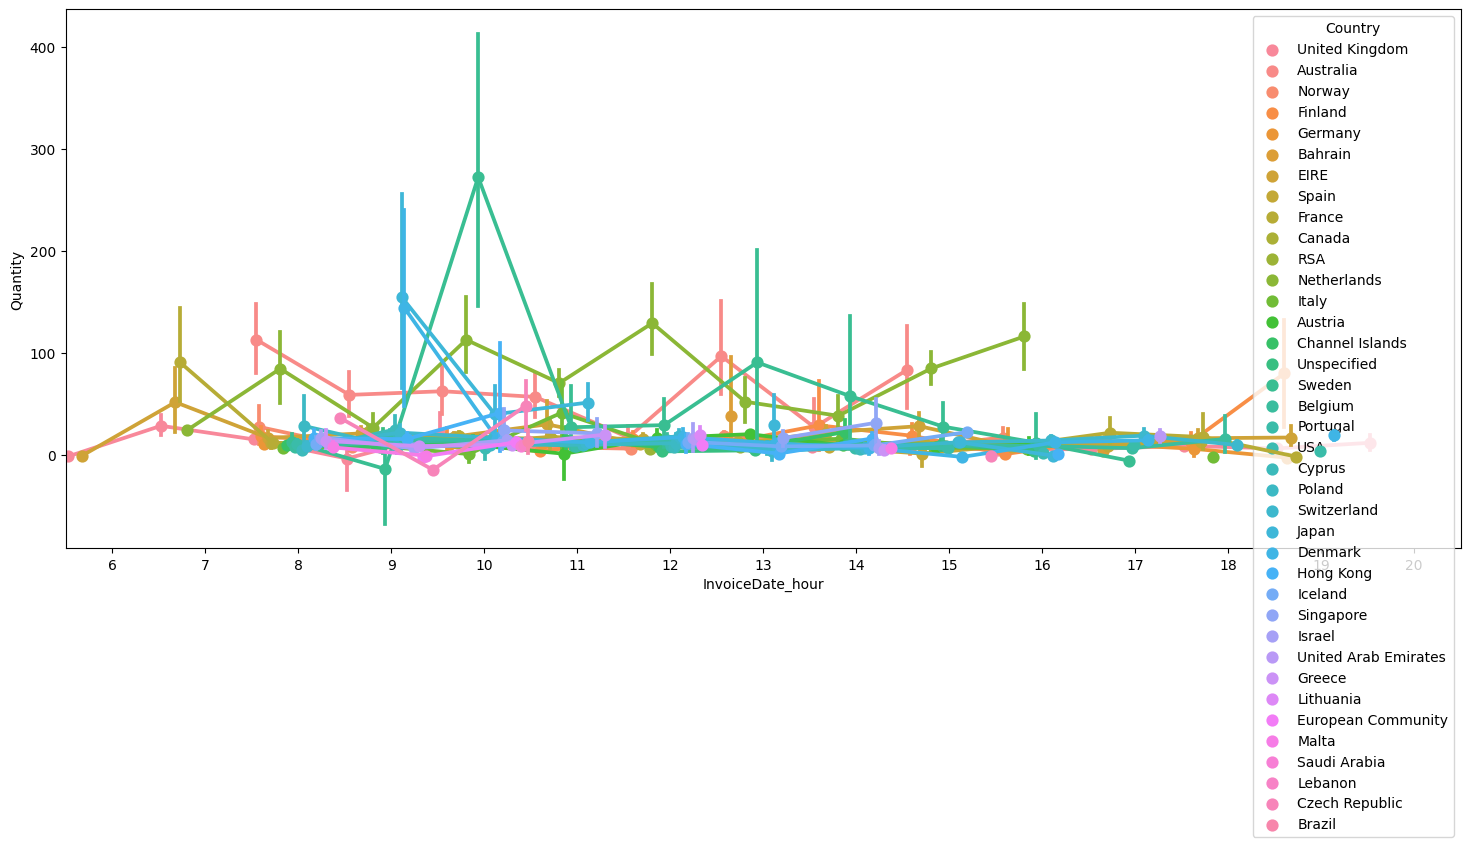

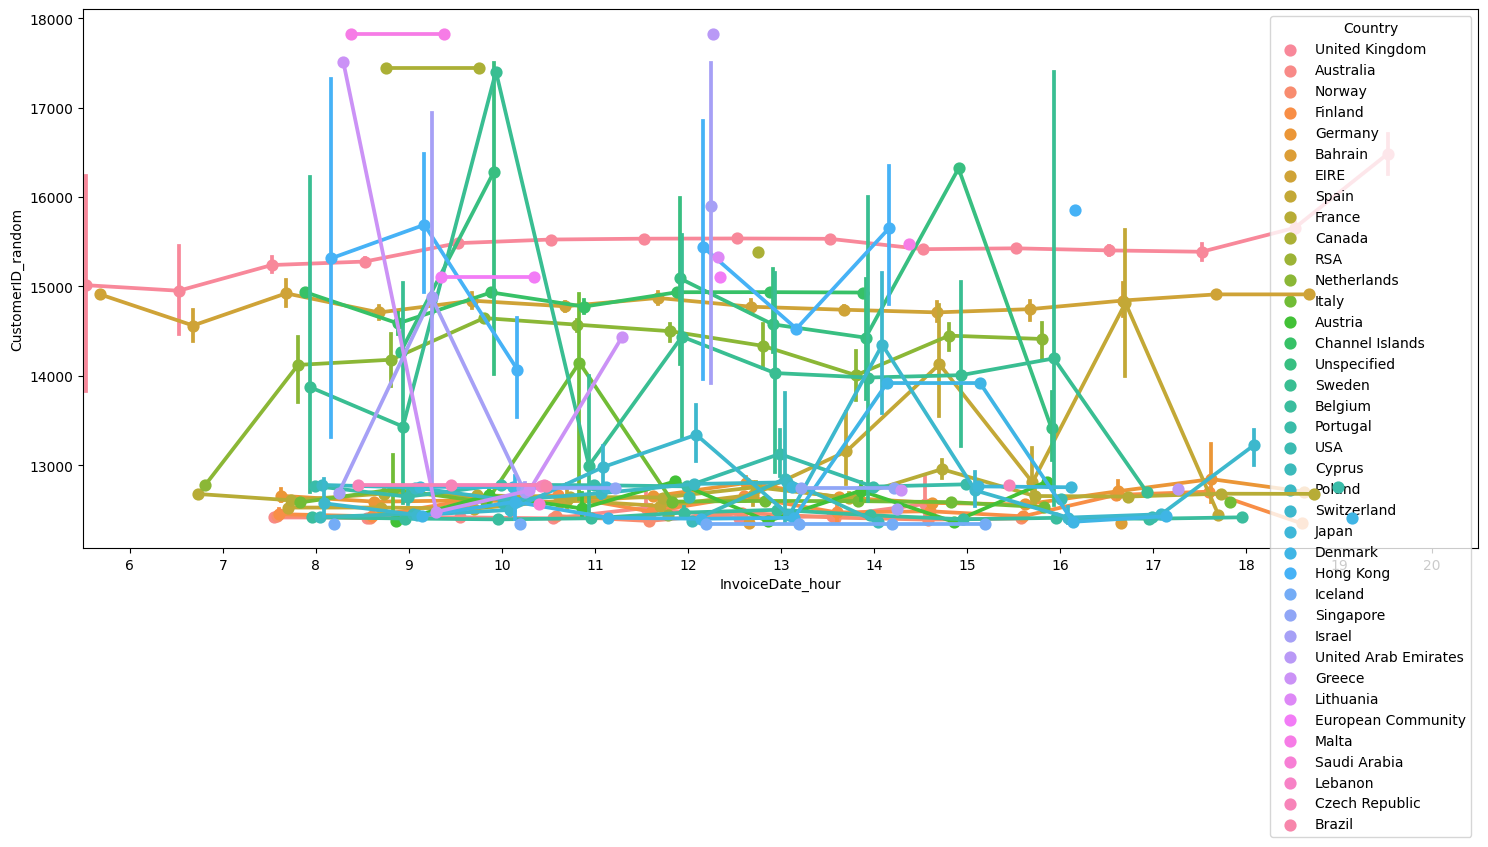

In [51]:
for i in ['InvoiceDate_day','InvoiceDate_month','InvoiceDate_year','InvoiceDate_hour']:
  ax = sns.pointplot(x=i, y="Quantity", hue="Country",
                   data=dataset, dodge=True)
  plt.show()


  ax = sns.pointplot(x=i, y="CustomerID_random", hue="Country",
                   data=dataset, dodge=True)
  plt.show()






# **RFM Table**



R (Recency): Number of days since last purchase

F (Frequency): Number of tracsactions

M (Monetary): Total amount of transactions (revenue contributed)

In [52]:
# Convert to show date only
from datetime import datetime
df_fix["InvoiceDate"] = df_fix["InvoiceDate"].dt.date
# Create TotalSum colummn
df_fix["TotalSum"] = df_fix["Quantity"] * df_fix["UnitPrice"]
# Create date variable that records recency
import datetime
snapshot_date = max(df_fix.InvoiceDate) + datetime.timedelta(days=1)
# Aggregate data by each customer
customers = df_fix.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'}).reset_index()
# Rename columns
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

In [53]:
customers.head(10)

CustomerID  Recency  Frequency  MonetaryValue
0     12346.0      326          1       77183.60
1     12347.0        3         27         588.48
2     12348.0      319          5         443.52
3     12349.0       19         15         578.21
4     12350.0      311          2          42.90
5     12352.0       37         19         506.68
6     12353.0      205          2          59.70
7     12354.0      233          6          94.45
8     12355.0      215          3         165.30
9     12356.0      246          7         427.40

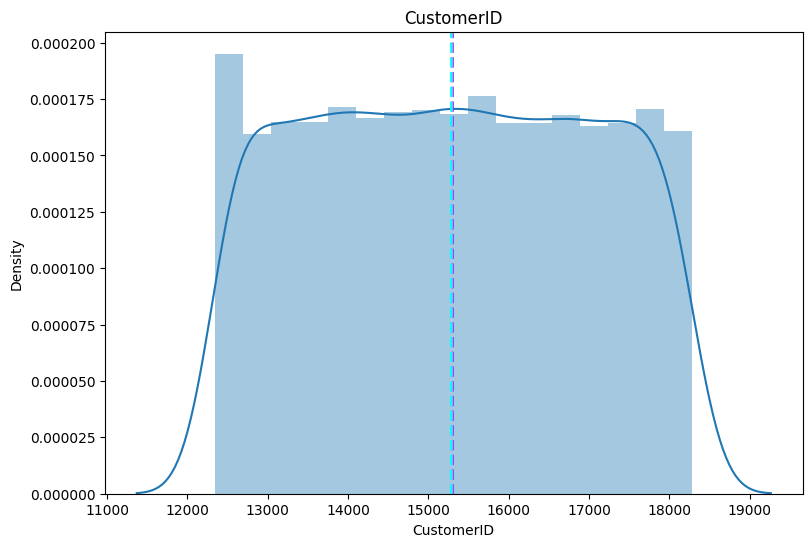

Skewness : 0.0076522952748913275
Kurtosis : -1.193708598479697


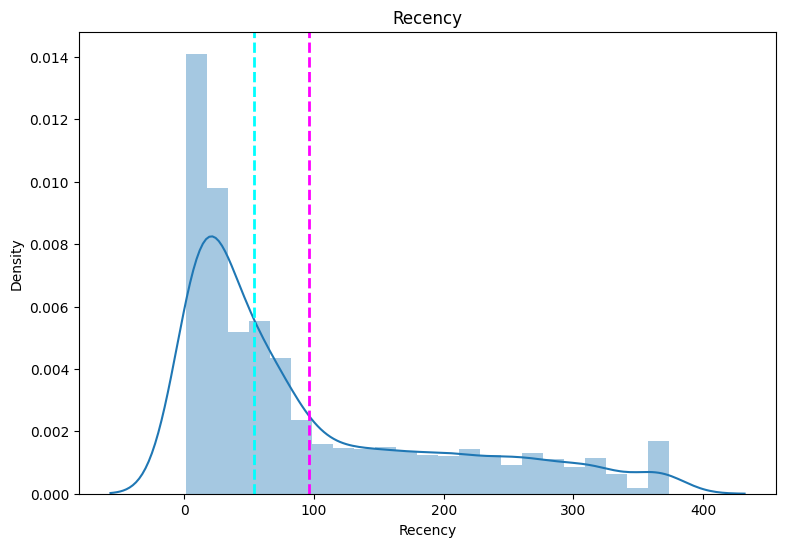

Skewness : 1.1894093874114786
Kurtosis : 0.2604433473318766


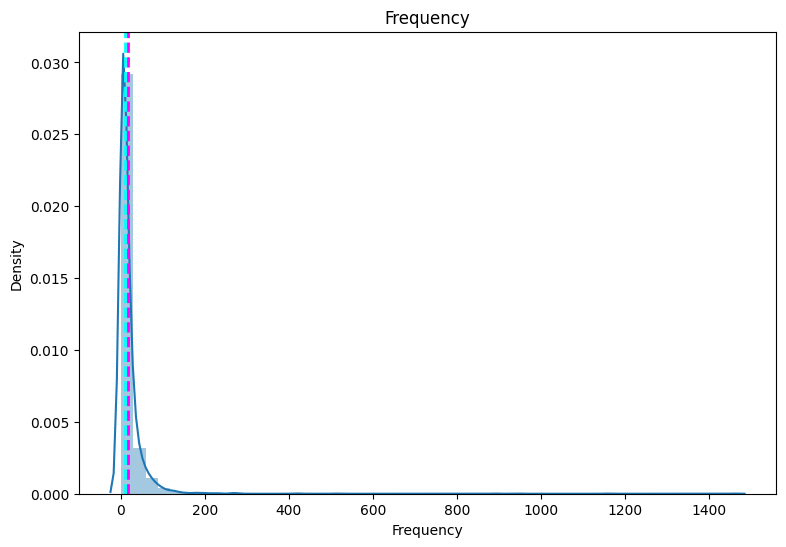

Skewness : 17.707469730773248
Kurtosis : 455.77098759018554


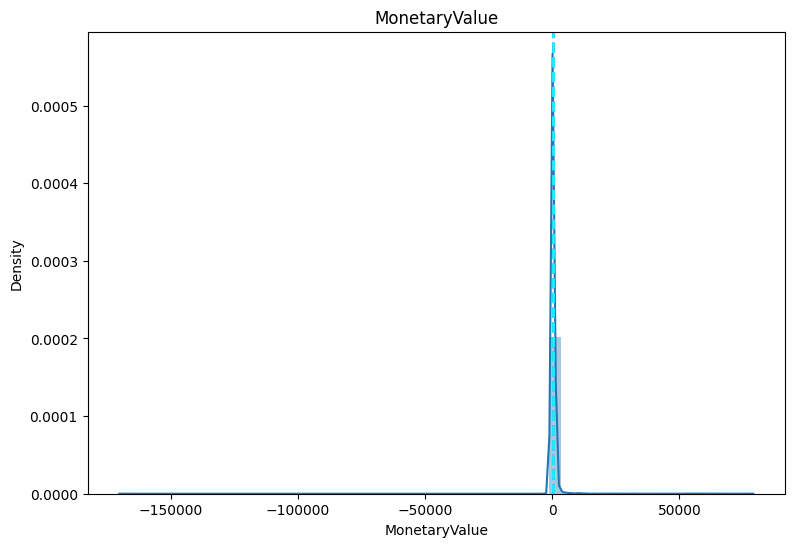

Skewness : -25.901704678922723
Kurtosis : 1691.9041935420605


In [54]:
#plot a bar plot for each numerical feature count with Dist Plot (except Car_ID)
for col in ["CustomerID","Recency","Frequency","MonetaryValue"]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (customers[col])
  sns.distplot(customers[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",customers[col].skew())
  print( "Kurtosis :",customers[col].kurt())

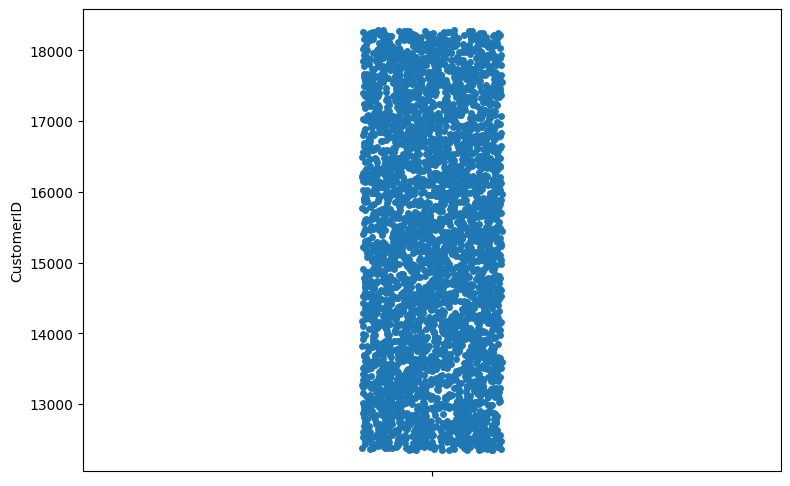

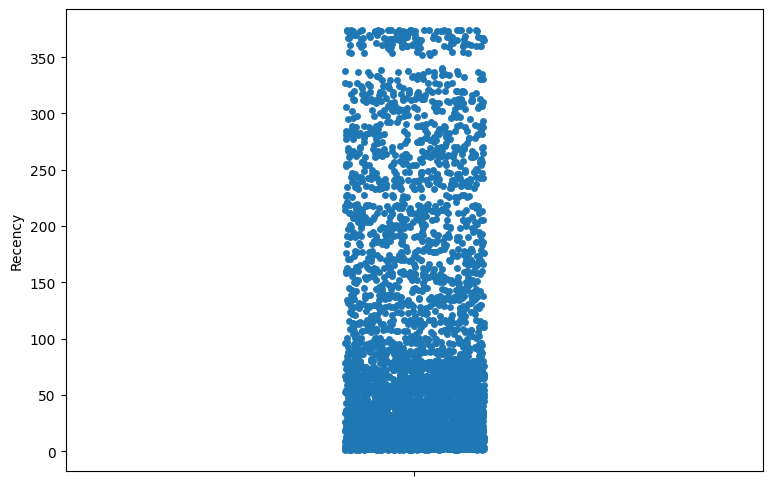

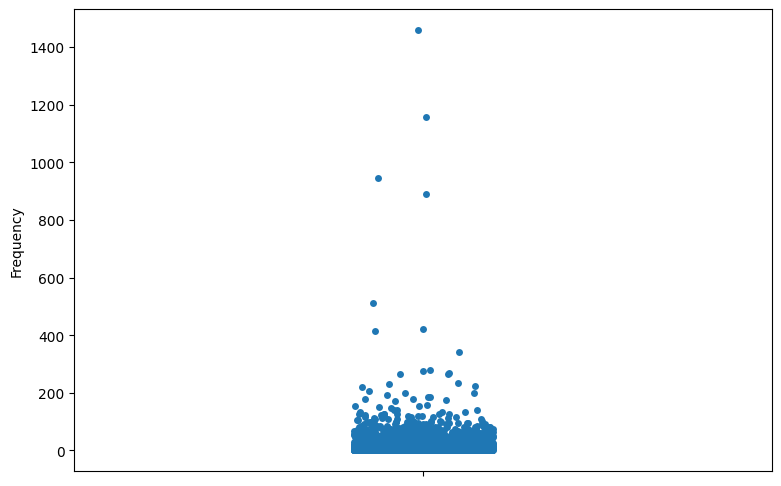

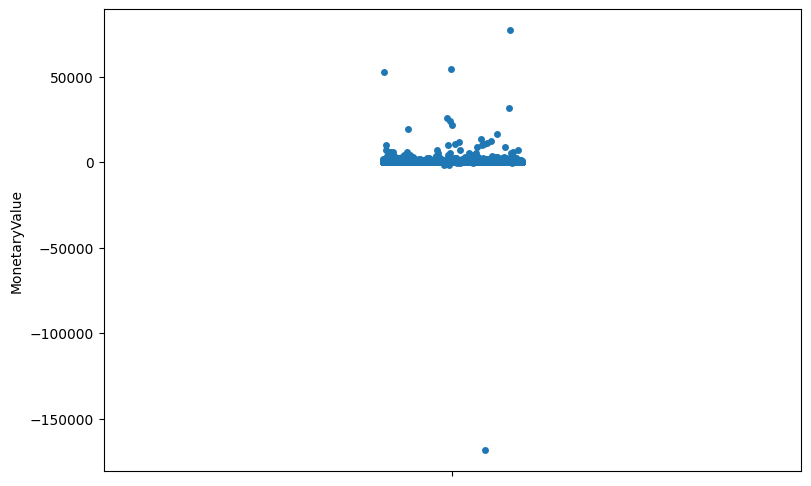

In [55]:
for col in ["CustomerID","Recency","Frequency","MonetaryValue"]:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(customers[col])

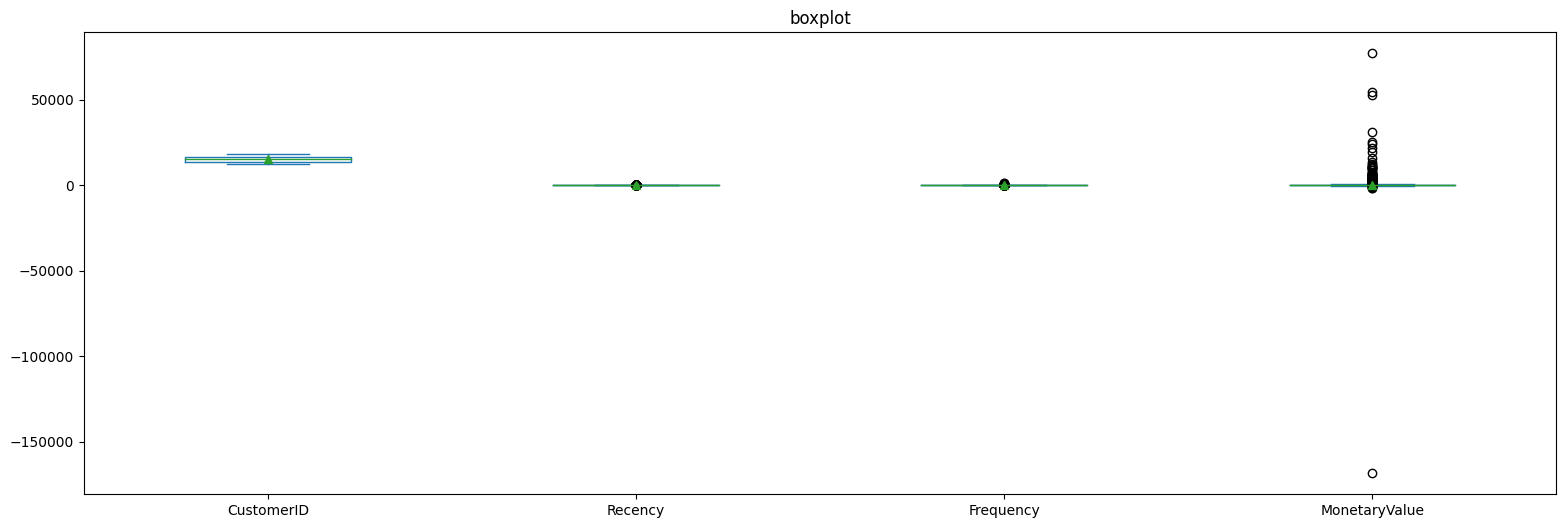

In [56]:
plt.rcParams['figure.figsize']=(19,6)
ax = customers[["CustomerID","Recency","Frequency","MonetaryValue"]].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

<Axes: >

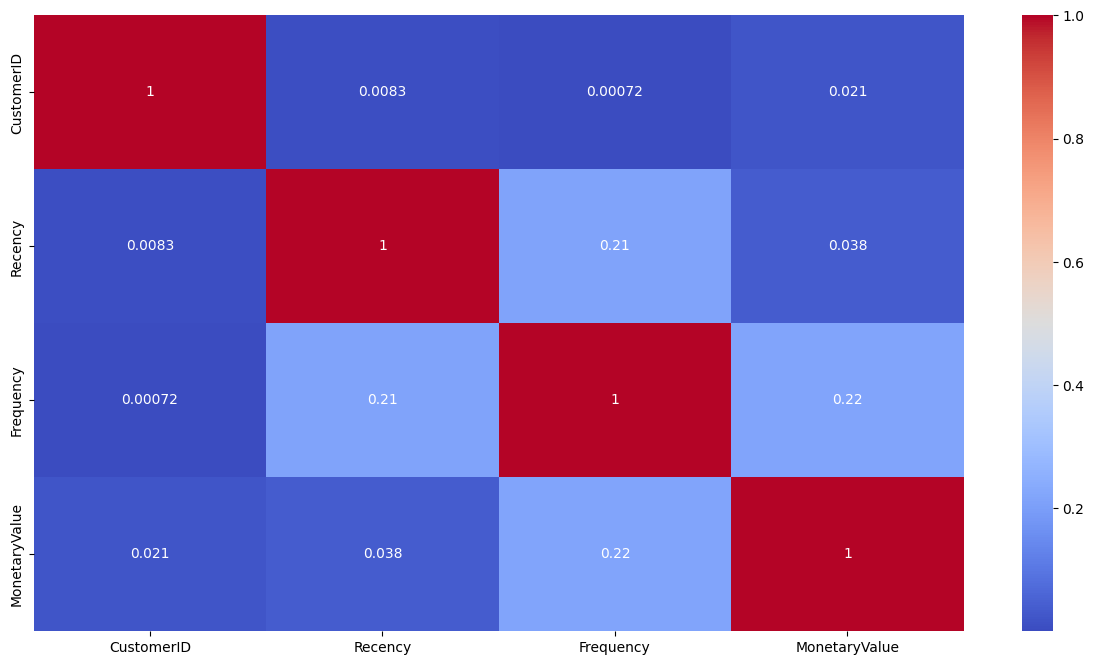

In [57]:
## Correlation
plt.figure(figsize=(15,8))
correlation=customers.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# **Outlier Treatment**


In [58]:
dataset_l=dataset.copy()

## **For Quite Symmetric Features**

In [59]:
dataset_l.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country', 'InvoiceDate_year', 'InvoiceDate_month',
       'InvoiceDate_day', 'InvoiceDate_hour', 'InvoiceDate_minute',
       'InvoiceDate_second', 'CustomerID_random'],
      dtype='object')

In [60]:
def iqr_symmetric(df,variable):

  lower_bridge=df[variable].mean()-3*(df[variable].std())
  upper_bridge=df[variable].mean()+3*(df[variable].std())
  print(variable.upper())
  print(" ")
  print(f"lower_bridge_{variable}",lower_bridge)
  print(" ")
  print(f"upper_bridge_{variable}",upper_bridge)
  print(" ")

In [61]:
for variable in ['Quantity',
       'UnitPrice']:
  iqr_symmetric(dataset_l,variable)

QUANTITY
 
lower_bridge_Quantity -1047.3442740049638
 
upper_bridge_Quantity 1066.1983822213967
 
UNITPRICE
 
lower_bridge_UnitPrice -255.4943424677472
 
upper_bridge_UnitPrice 264.4301140308735
 


In [62]:
def iqr_symmetric_impute(df,variable):
  lower_bridge=df[variable].mean()-3*(df[variable].std())
  upper_bridge=df[variable].mean()+3*(df[variable].std())
  df.loc[df[variable]>=upper_bridge,variable]=upper_bridge
  df.loc[df[variable]<=lower_bridge,variable]=lower_bridge

In [63]:
for variable in ['Quantity',
       'UnitPrice']:
  iqr_symmetric_impute(dataset_l,variable)

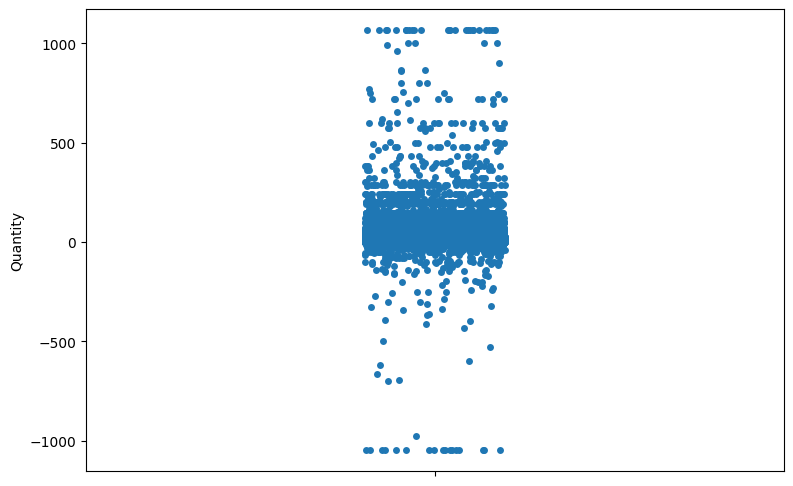

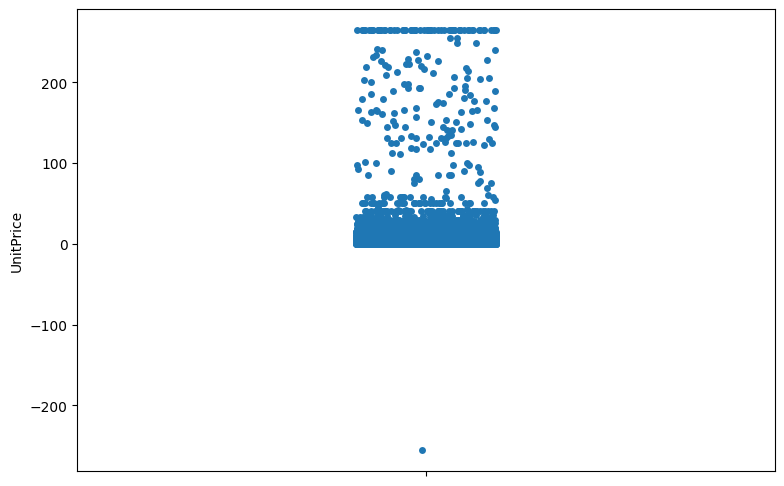

In [64]:
for col in ['Quantity',
       'UnitPrice']:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(dataset_l[col])

# **Categorical Value Encoding**

**One Hot Encoding**

In [65]:
dataset_l.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country', 'InvoiceDate_year', 'InvoiceDate_month',
       'InvoiceDate_day', 'InvoiceDate_hour', 'InvoiceDate_minute',
       'InvoiceDate_second', 'CustomerID_random'],
      dtype='object')

In [66]:
dataset_l.head()

InvoiceNo StockCode                       Description  Quantity  \
209268    555200     71459    HANGING JAM JAR T-LIGHT HOLDER      24.0   
207108    554974     21128                GOLD FISHING GNOME       4.0   
167085    550972     21086       SET/6 RED SPOTTY PAPER CUPS       4.0   
471836    576652     22812  PACK 3 BOXES CHRISTMAS PANETTONE       3.0   
115865    546157     22180                    RETROSPOT LAMP       2.0   

               InvoiceDate  UnitPrice         Country  InvoiceDate_year  \
209268 2011-06-01 12:05:00       0.85  United Kingdom              2011   
207108 2011-05-27 17:14:00       6.95  United Kingdom              2011   
167085 2011-04-21 17:05:00       0.65  United Kingdom              2011   
471836 2011-11-16 10:39:00       1.95  United Kingdom              2011   
115865 2011-03-10 08:40:00       9.95  United Kingdom              2011   

        InvoiceDate_month  InvoiceDate_day  InvoiceDate_hour  \
209268                  6                1                12   
207108                  5               27                17   
167085                  4               21                17   
471836                 11               16                10   
115865                  3               10                 8   

        InvoiceDate_minute  InvoiceDate_second  CustomerID_random  
209268                   5                   0            17315.0  
207108                  14                   0            14031.0  
167085                   5                   0            14031.0  
471836                  39                   0            17198.0  
115865                  40                   0            13502.0

In [67]:
dataset_l1=dataset_l[['Description', 'Quantity',
       'UnitPrice', 'Country', 'InvoiceDate_year', 'InvoiceDate_month',
       'InvoiceDate_day', 'InvoiceDate_hour', 'InvoiceDate_minute',
       'InvoiceDate_second', 'CustomerID_random']]
dataset_l1

Description  Quantity  UnitPrice         Country  \
209268    HANGING JAM JAR T-LIGHT HOLDER      24.0       0.85  United Kingdom   
207108                GOLD FISHING GNOME       4.0       6.95  United Kingdom   
167085       SET/6 RED SPOTTY PAPER CUPS       4.0       0.65  United Kingdom   
471836  PACK 3 BOXES CHRISTMAS PANETTONE       3.0       1.95  United Kingdom   
115865                    RETROSPOT LAMP       2.0       9.95  United Kingdom   
...                                  ...       ...        ...             ...   
242085               SPACEBOY LUNCH BOX       -1.0       1.95  United Kingdom   
435441  CRYSTAL HOOP EARRING FLORAL LEAF       1.0       2.90  United Kingdom   
275042     SET/6 RED SPOTTY PAPER PLATES       2.0       0.85  United Kingdom   
430654                 GUMBALL COAT RACK       4.0       4.96  United Kingdom   
290024      TRAVEL CARD WALLET KEEP CALM       4.0       0.42  United Kingdom   

        InvoiceDate_year  InvoiceDate_month  InvoiceDate_day  \
209268              2011                  6                1   
207108              2011                  5               27   
167085              2011                  4               21   
471836              2011                 11               16   
115865              2011                  3               10   
...                  ...                ...              ...   
242085              2011                  6               28   
435441              2011                 11                2   
275042              2011                  7               22   
430654              2011                 10               31   
290024              2011                  8                4   

        InvoiceDate_hour  InvoiceDate_minute  InvoiceDate_second  \
209268                12                   5                   0   
207108                17                  14                   0   
167085                17                   5                   0   
471836                10                  39                   0   
115865                 8                  40                   0   
...                  ...                 ...                 ...   
242085                11                  31                   0   
435441                15                  33                   0   
275042                10                   6                   0   
430654                14                  41                   0   
290024                12                  22                   0   

        CustomerID_random  
209268            17315.0  
207108            14031.0  
167085            14031.0  
471836            17198.0  
115865            13502.0  
...                   ...  
242085            13870.0  
435441            14239.0  
275042            16866.0  
430654            15701.0  
290024            13263.0  

[99800 rows x 11 columns]

In [68]:
dataset_final=pd.get_dummies(dataset_l1)

In [69]:
dataset_final

Quantity  UnitPrice  InvoiceDate_year  InvoiceDate_month  \
209268      24.0       0.85              2011                  6   
207108       4.0       6.95              2011                  5   
167085       4.0       0.65              2011                  4   
471836       3.0       1.95              2011                 11   
115865       2.0       9.95              2011                  3   
...          ...        ...               ...                ...   
242085      -1.0       1.95              2011                  6   
435441       1.0       2.90              2011                 11   
275042       2.0       0.85              2011                  7   
430654       4.0       4.96              2011                 10   
290024       4.0       0.42              2011                  8   

        InvoiceDate_day  InvoiceDate_hour  InvoiceDate_minute  \
209268                1                12                   5   
207108               27                17                  14   
167085               21                17                   5   
471836               16                10                  39   
115865               10                 8                  40   
...                 ...               ...                 ...   
242085               28                11                  31   
435441                2                15                  33   
275042               22                10                   6   
430654               31                14                  41   
290024                4                12                  22   

        InvoiceDate_second  CustomerID_random  \
209268                   0            17315.0   
207108                   0            14031.0   
167085                   0            14031.0   
471836                   0            17198.0   
115865                   0            13502.0   
...                    ...                ...   
242085                   0            13870.0   
435441                   0            14239.0   
275042                   0            16866.0   
430654                   0            15701.0   
290024                   0            13263.0   

        Description_ 4 PURPLE FLOCK DINNER CANDLES  ...  Country_RSA  \
209268                                           0  ...            0   
207108                                           0  ...            0   
167085                                           0  ...            0   
471836                                           0  ...            0   
115865                                           0  ...            0   
...                                            ...  ...          ...   
242085                                           0  ...            0   
435441                                           0  ...            0   
275042                                           0  ...            0   
430654                                           0  ...            0   
290024                                           0  ...            0   

        Country_Saudi Arabia  Country_Singapore  Country_Spain  \
209268                     0                  0              0   
207108                     0                  0              0   
167085                     0                  0              0   
471836                     0                  0              0   
115865                     0                  0              0   
...                      ...                ...            ...   
242085                     0                  0              0   
435441                     0                  0              0   
275042                     0                  0              0   
430654                     0                  0              0   
290024                     0                  0              0   

        Country_Sweden  Country_Switzerland  Country_USA  \
209268               0                    0            0   
207108               0                    0

# **PRINCIPAL COMPONENT ANALYSIS**

### **Data Preparation**

**Feature Scaling**

In [70]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(dataset_final)


In [71]:
X_train

array([[ 0.3880632 , -0.28995797,  0.29095175, ..., -0.01226064,
         0.30971034, -0.02885057],
       [-0.14824904,  0.33801063,  0.29095175, ..., -0.01226064,
         0.30971034, -0.02885057],
       [-0.14824904, -0.3105471 ,  0.29095175, ..., -0.01226064,
         0.30971034, -0.02885057],
       ...,
       [-0.20188026, -0.28995797,  0.29095175, ..., -0.01226064,
         0.30971034, -0.02885057],
       [-0.14824904,  0.13314874,  0.29095175, ..., -0.01226064,
         0.30971034, -0.02885057],
       [-0.14824904, -0.33422461,  0.29095175, ..., -0.01226064,
         0.30971034, -0.02885057]])

**Applying Principal Component Analysis**

In [72]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)

X_train = pca.fit_transform(X_train)

explained_variance = pca.explained_variance_ratio_

In [73]:
print(pca.components_)

[[ 0.10248552  0.02162107  0.06135342 ...  0.01716246 -0.6084357
   0.04521002]
 [ 0.10366089 -0.69325708  0.02029436 ...  0.00364159 -0.01595055
  -0.00436242]
 [-0.04515226  0.00237089 -0.5166815  ... -0.00744183 -0.05293574
   0.0030428 ]
 [-0.60592705 -0.07785048  0.03894089 ...  0.01293901 -0.0395353
   0.01278238]]


In [74]:
print(pca.explained_variance_)

[2.35479225 1.84251254 1.65358106 1.38440211]


In [75]:
pca.explained_variance_ratio_

array([0.00062911, 0.00049225, 0.00044178, 0.00036986])

(-7.5892744748817424,
 9.169475235975895,
 -43.81182391483731,
 45.035960753824156)

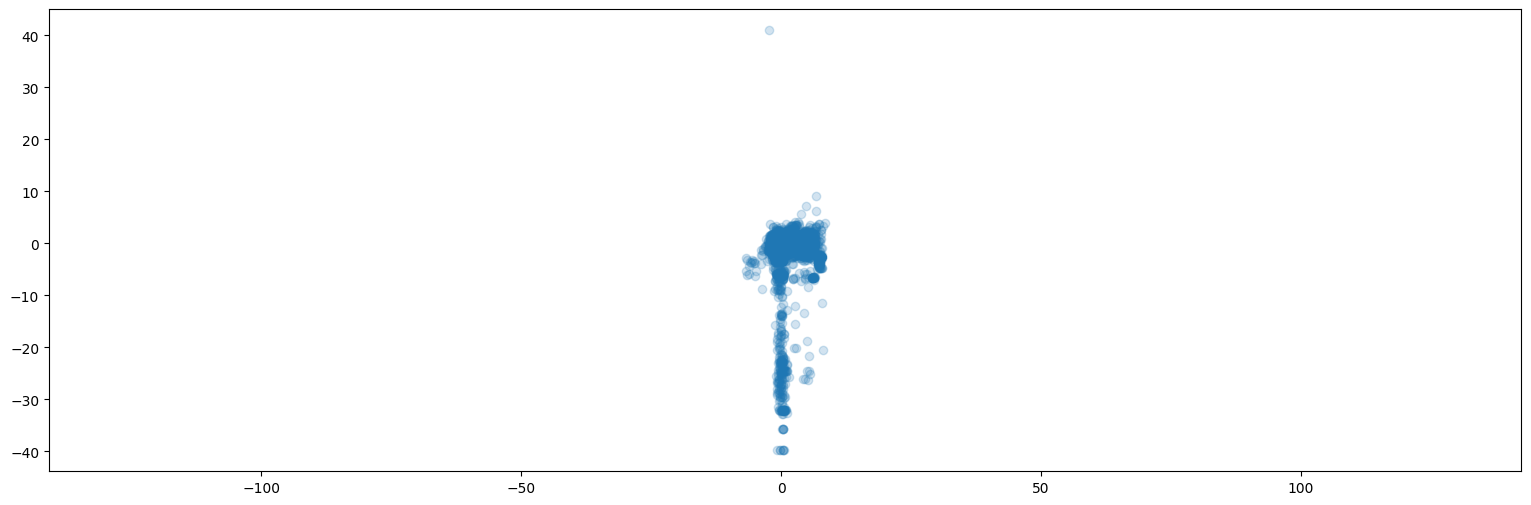

In [76]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)


# plot data
plt.scatter(X_train[:, 0], X_train[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

In [77]:
X_train

array([[-0.65651384,  0.64831911, -1.01665346, -0.55274702],
       [-0.38564105, -0.81078571, -0.30046335,  1.61757876],
       [ 0.23335755,  0.54539748, -1.15089417,  0.38181321],
       ...,
       [-0.09119438,  0.6424286 , -0.73959904, -0.22083482],
       [-0.36853266, -0.0672207 , -0.25333449,  0.02570817],
       [-0.18320376,  0.66503777, -0.41481285, -0.48594137]])

# **Implementing K-Means Clustering**

In [78]:
X=X_train

In [79]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=3,max_iter=1000, random_state=10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[0 0 0 ... 0 0 0]


In [80]:
dataset['Cluster']=cluster_labels

In [81]:
dataset.head()

InvoiceNo StockCode                       Description  Quantity  \
209268    555200     71459    HANGING JAM JAR T-LIGHT HOLDER        24   
207108    554974     21128                GOLD FISHING GNOME         4   
167085    550972     21086       SET/6 RED SPOTTY PAPER CUPS         4   
471836    576652     22812  PACK 3 BOXES CHRISTMAS PANETTONE         3   
115865    546157     22180                    RETROSPOT LAMP         2   

               InvoiceDate  UnitPrice         Country  InvoiceDate_year  \
209268 2011-06-01 12:05:00       0.85  United Kingdom              2011   
207108 2011-05-27 17:14:00       6.95  United Kingdom              2011   
167085 2011-04-21 17:05:00       0.65  United Kingdom              2011   
471836 2011-11-16 10:39:00       1.95  United Kingdom              2011   
115865 2011-03-10 08:40:00       9.95  United Kingdom              2011   

        InvoiceDate_month  InvoiceDate_day  InvoiceDate_hour  \
209268                  6                1                12   
207108                  5               27                17   
167085                  4               21                17   
471836                 11               16                10   
115865                  3               10                 8   

        InvoiceDate_minute  InvoiceDate_second  CustomerID_random  Cluster  
209268                   5                   0            17315.0        0  
207108                  14                   0            14031.0        0  
167085                   5                   0            14031.0        0  
471836                  39                   0            17198.0        0  
115865                  40                   0            13502.0        0

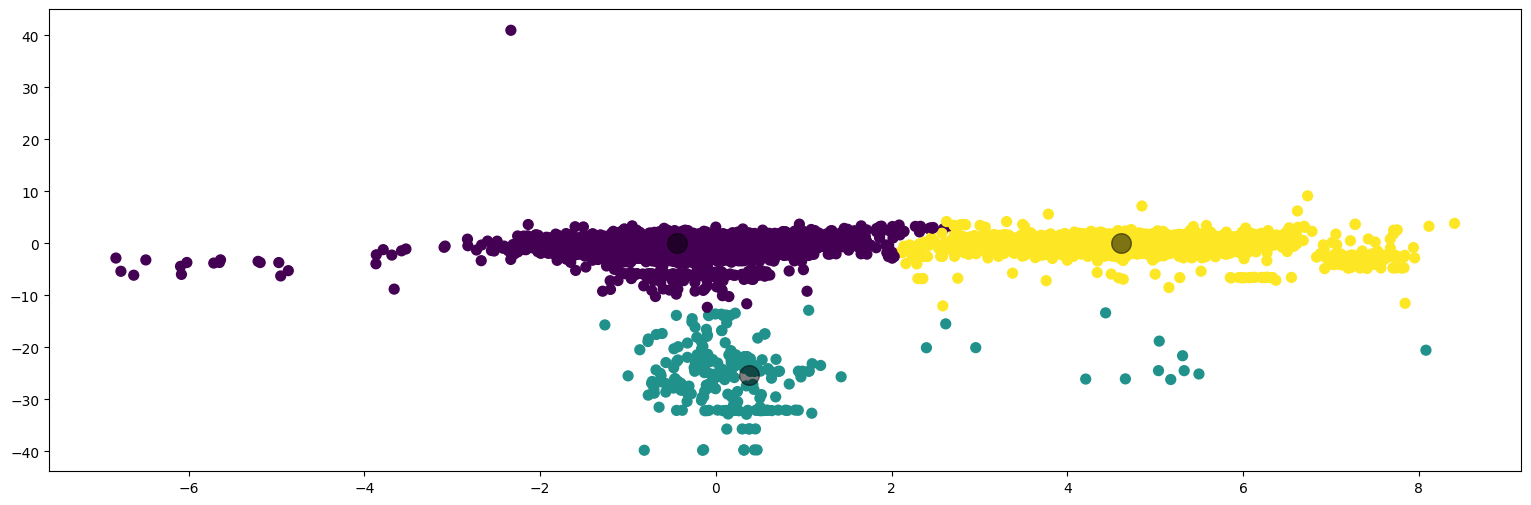

In [82]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')

centers = clusterer.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [83]:
clusterer.cluster_centers_

array([[-4.46514956e-01,  4.63292934e-02, -2.60724910e-02,
        -6.53291734e-03],
       [ 3.74803817e-01, -2.53733036e+01, -3.66911879e-01,
        -3.29895414e+00],
       [ 4.61655541e+00,  1.16217625e-01,  2.78700264e-01,
         1.45180578e-01]])

# **RFM For Cluster**

   CustomerID  Recency  Frequency  MonetaryValue  Cluster_Id
0     12346.0      326          1       77183.60           0
1     12347.0        3         27         588.48           0
2     12348.0      319          5         443.52           0
3     12349.0       19         15         578.21           0
4     12350.0      311          2          42.90           0
5     12352.0       37         19         506.68           0
6     12353.0      205          2          59.70           0
7     12354.0      233          6          94.45           0
8     12355.0      215          3         165.30           0
9     12356.0      246          7         427.40           2


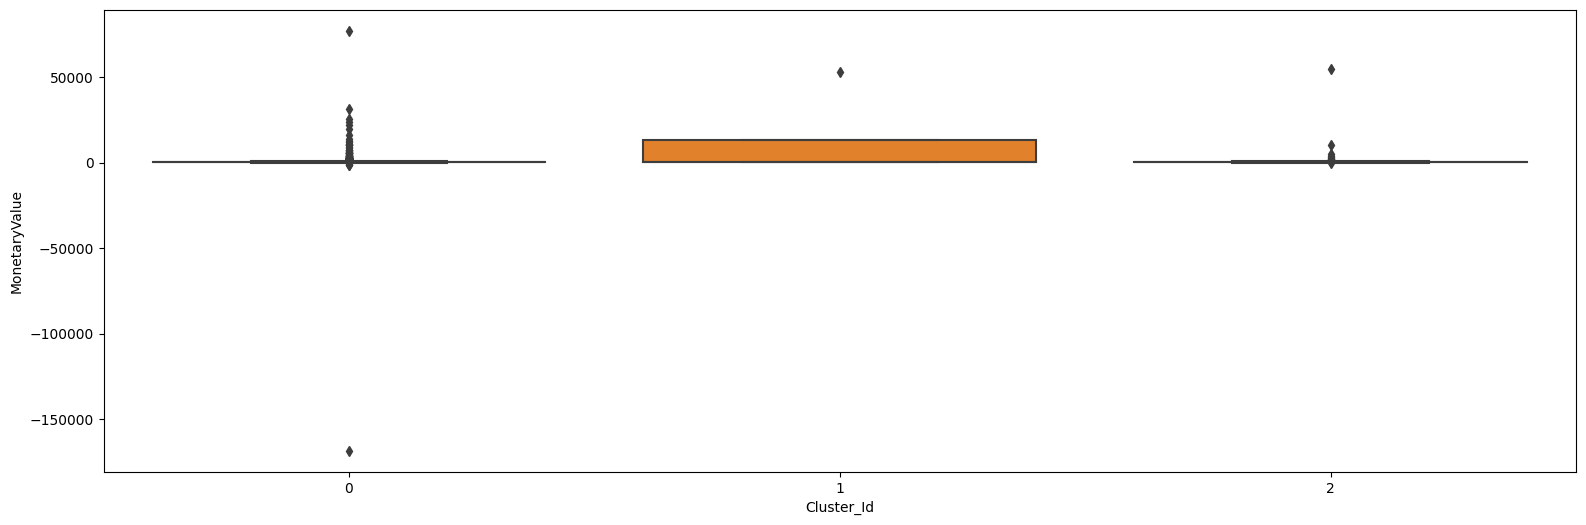

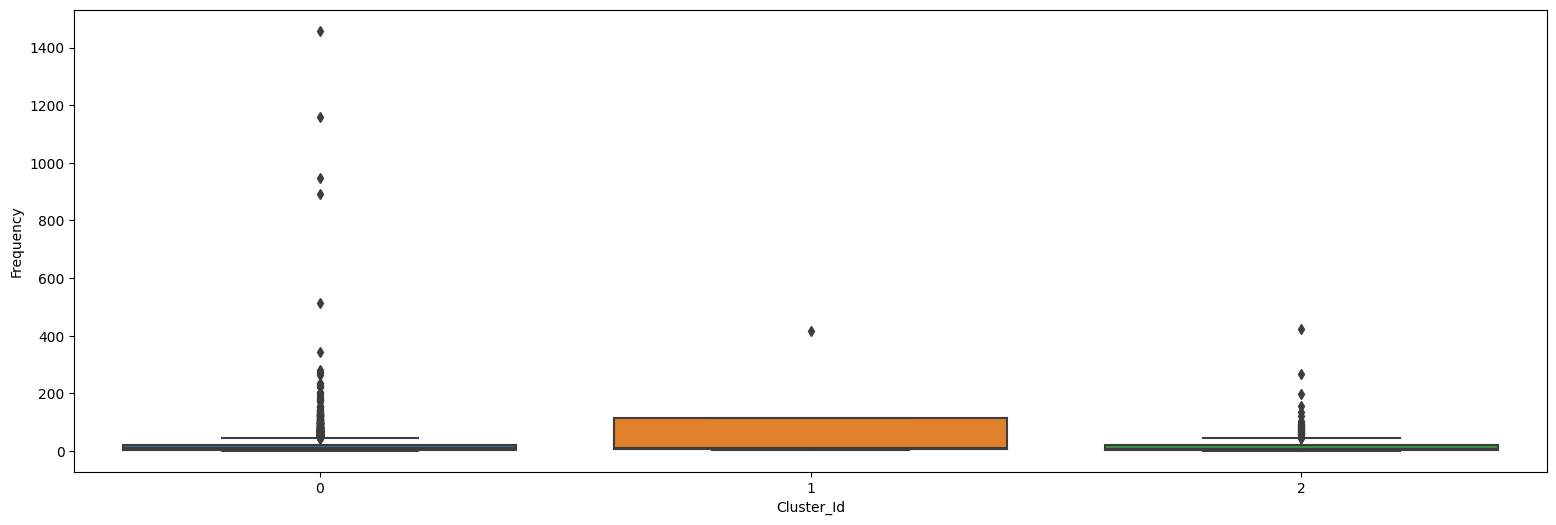

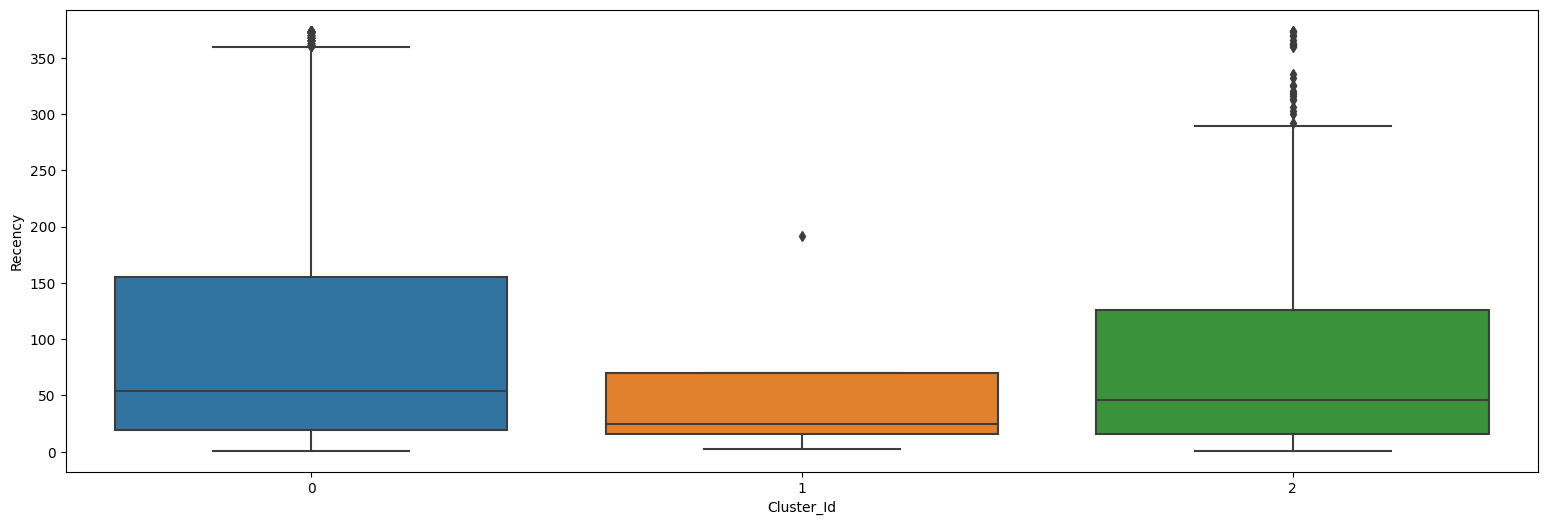

In [84]:
# assign the label
customers['Cluster_Id'] =cluster_labels[0:4092]
print(customers.head(10))

# Box plot to visualize Cluster Id vs MonetaryValue

sns.boxplot(x='Cluster_Id', y='MonetaryValue', data=customers)
plt.show()

# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=customers)
plt.show()

# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=customers)
plt.show()


# **Implementing K-Means Clustering with Silhoutte**

In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [86]:
range_n_clusters = [2,3,4,5,7,8,10]

For n_clusters = 2 The average silhouette_score is : 0.6174530034978353
For n_clusters = 3 The average silhouette_score is : 0.6256567308768186
For n_clusters = 4 The average silhouette_score is : 0.34612002298517847
For n_clusters = 5 The average silhouette_score is : 0.28612579588128373
For n_clusters = 7 The average silhouette_score is : 0.2935103564487528
For n_clusters = 8 The average silhouette_score is : 0.25114269465781314
For n_clusters = 10 The average silhouette_score is : 0.28089172603284357


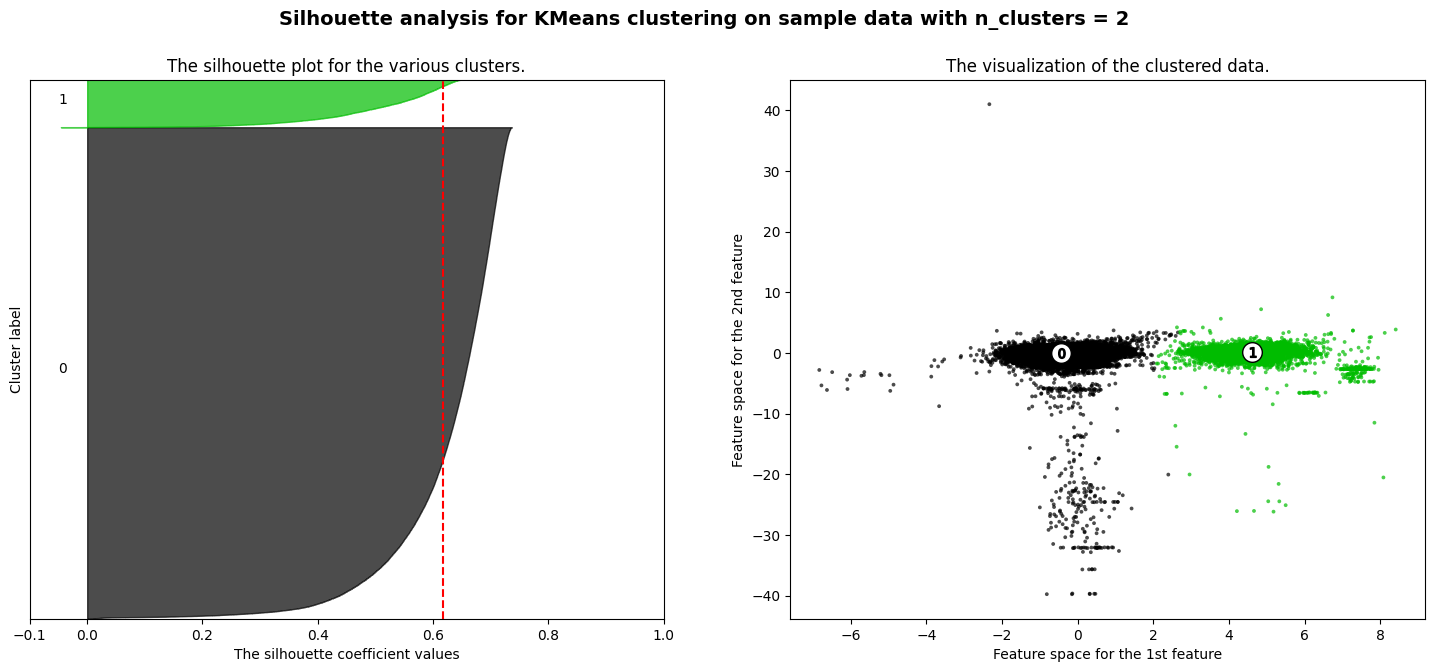

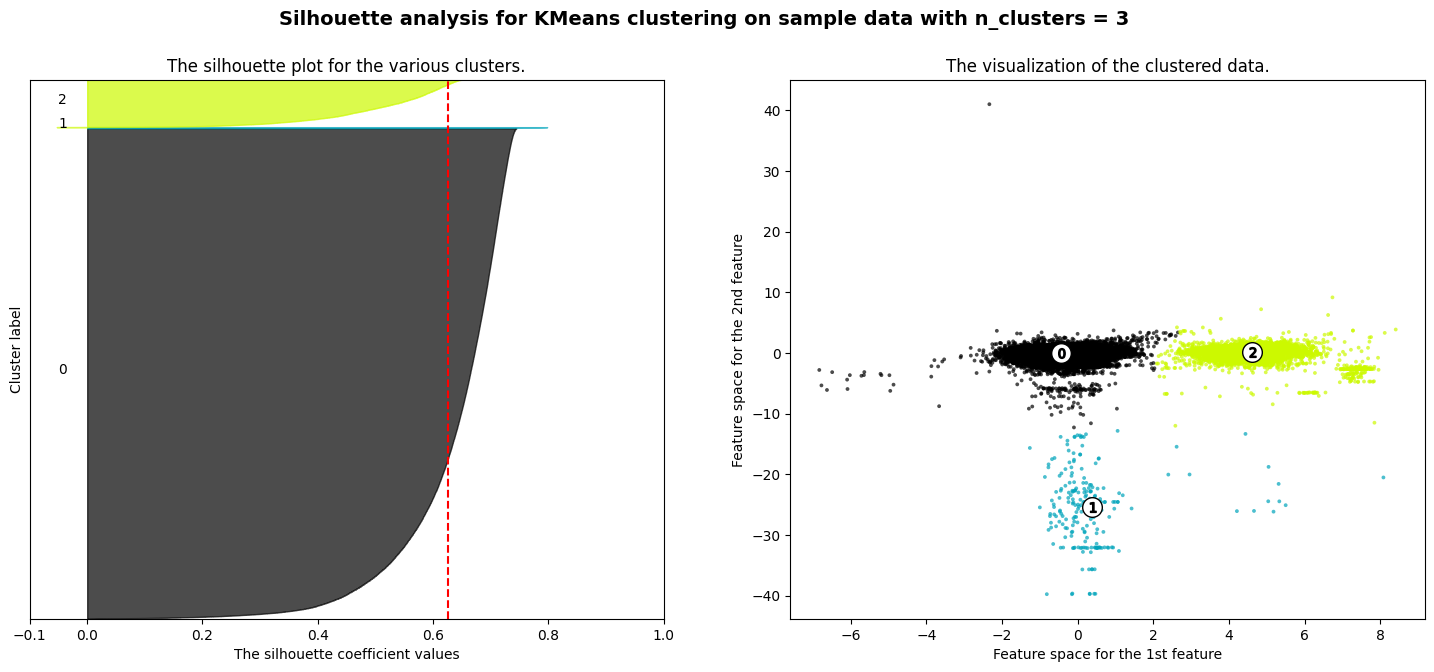

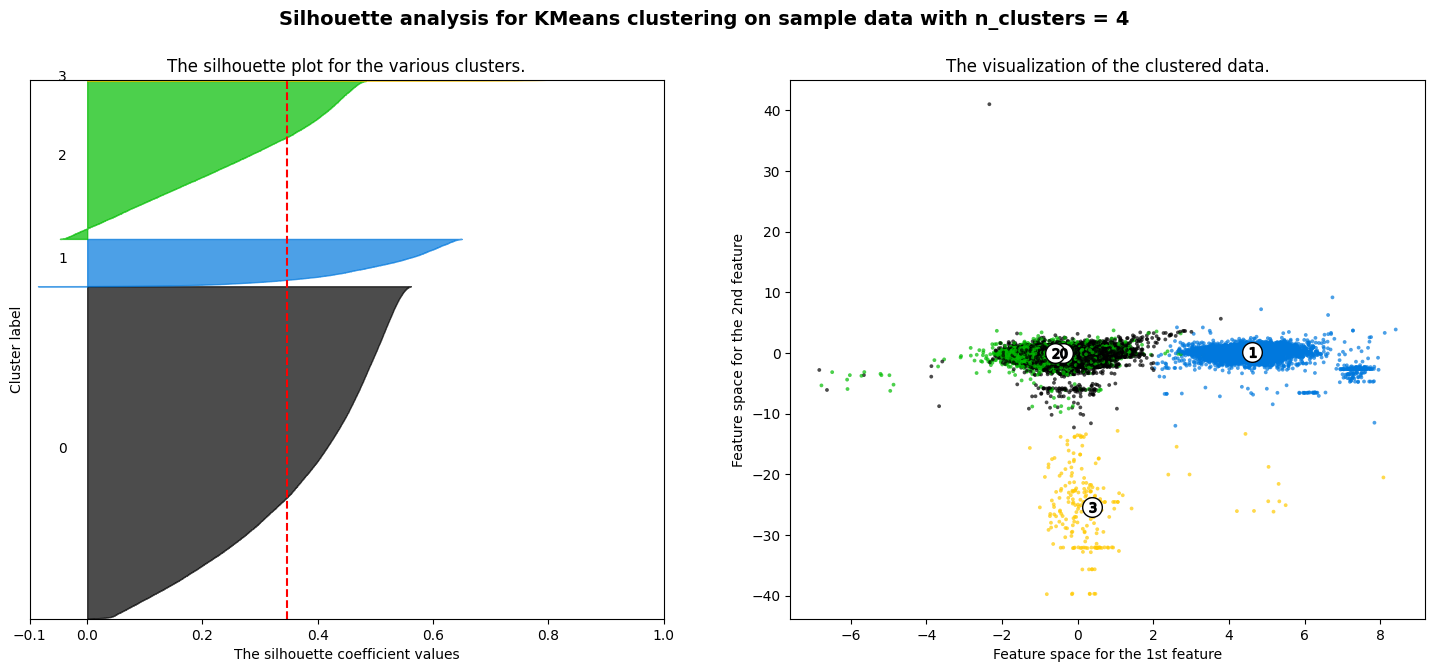

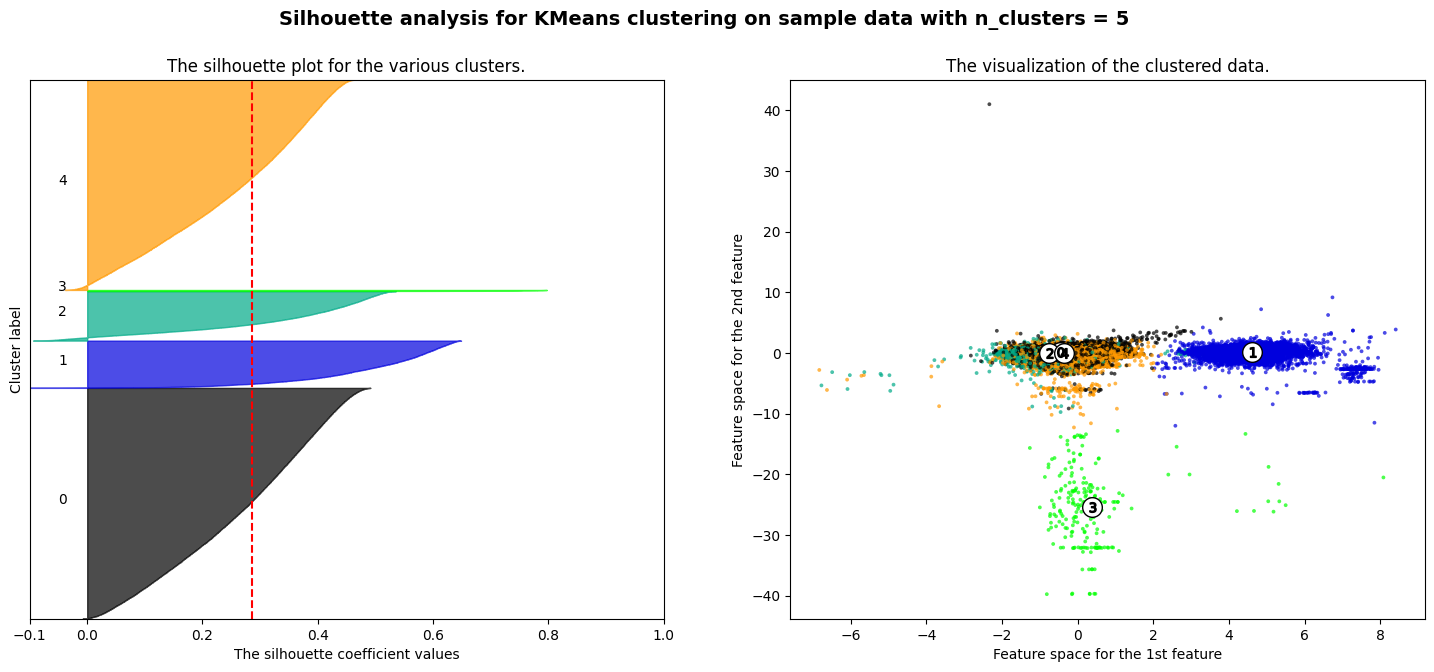

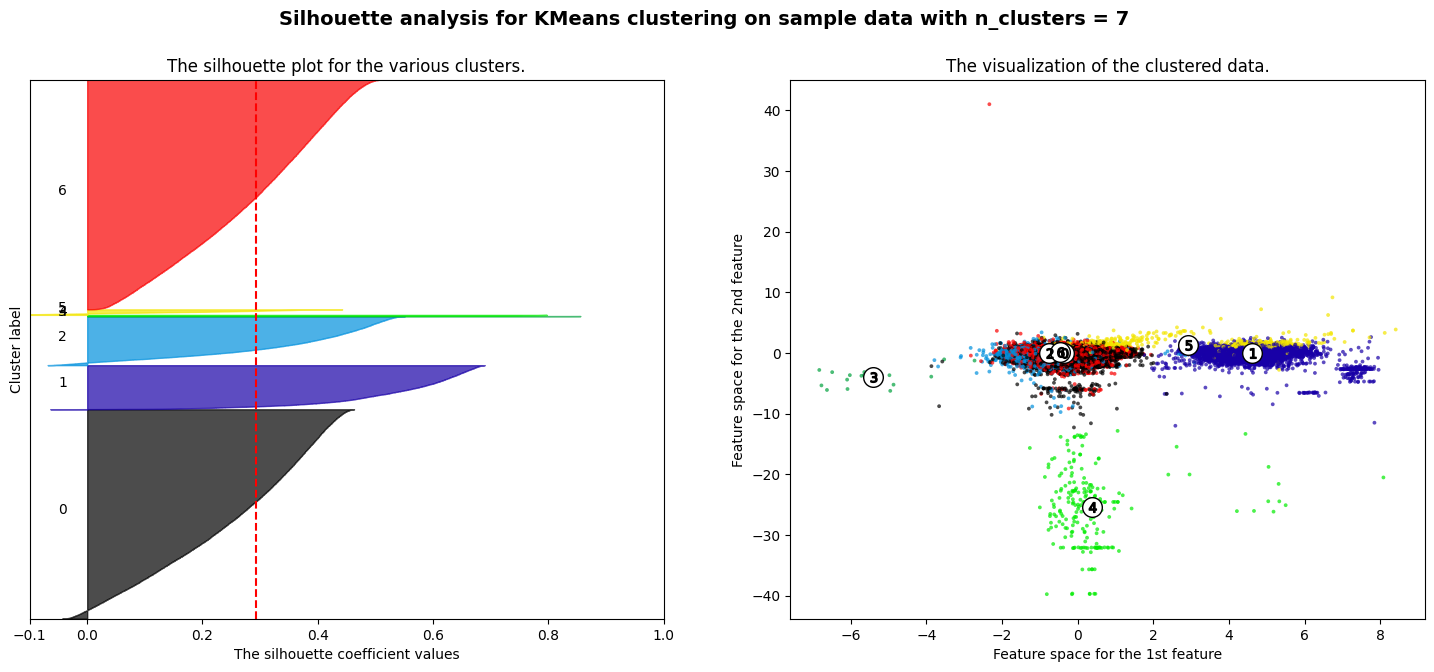

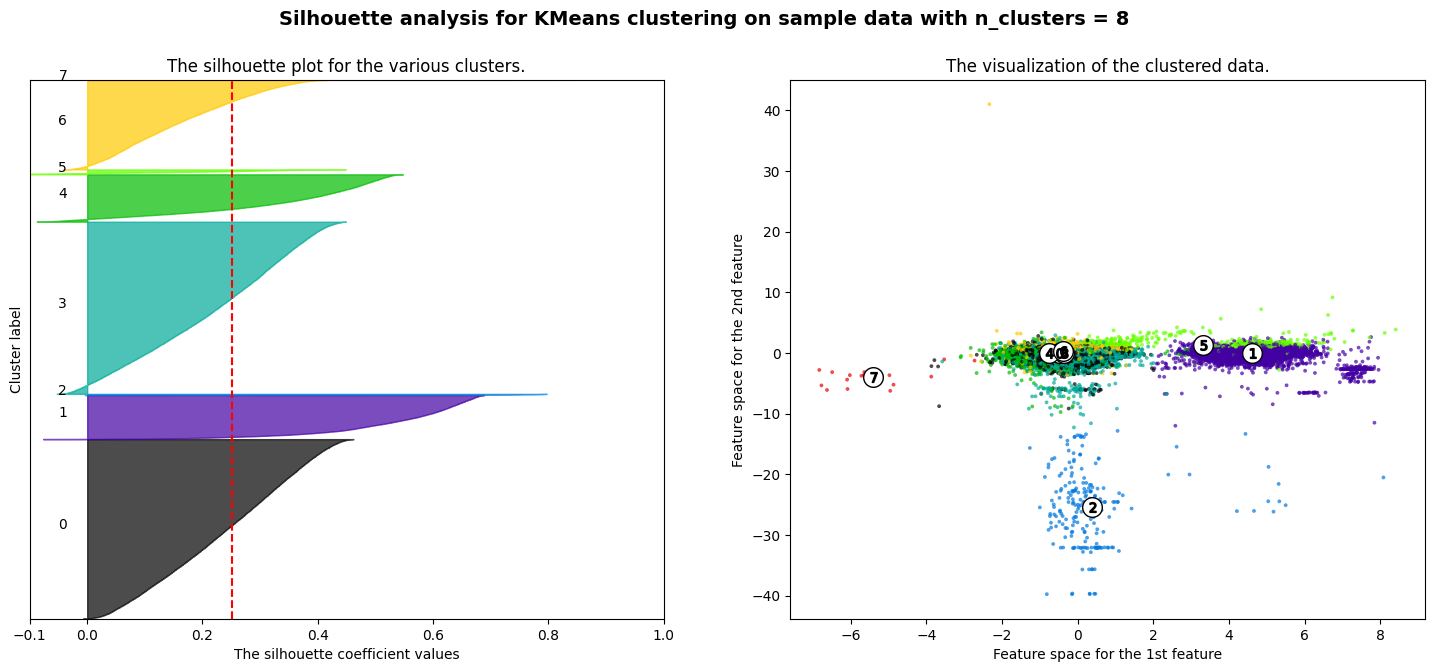

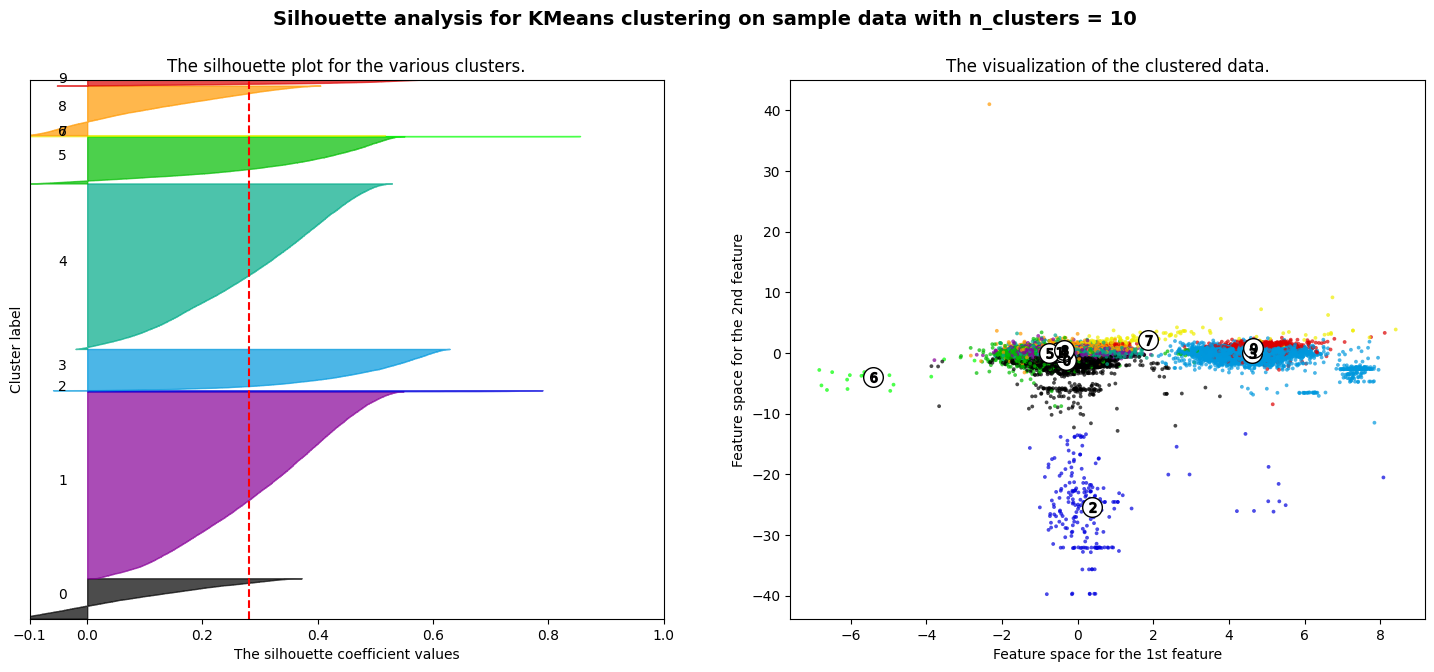

In [87]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# **Implementing K-Means Clustering with Elbow method**

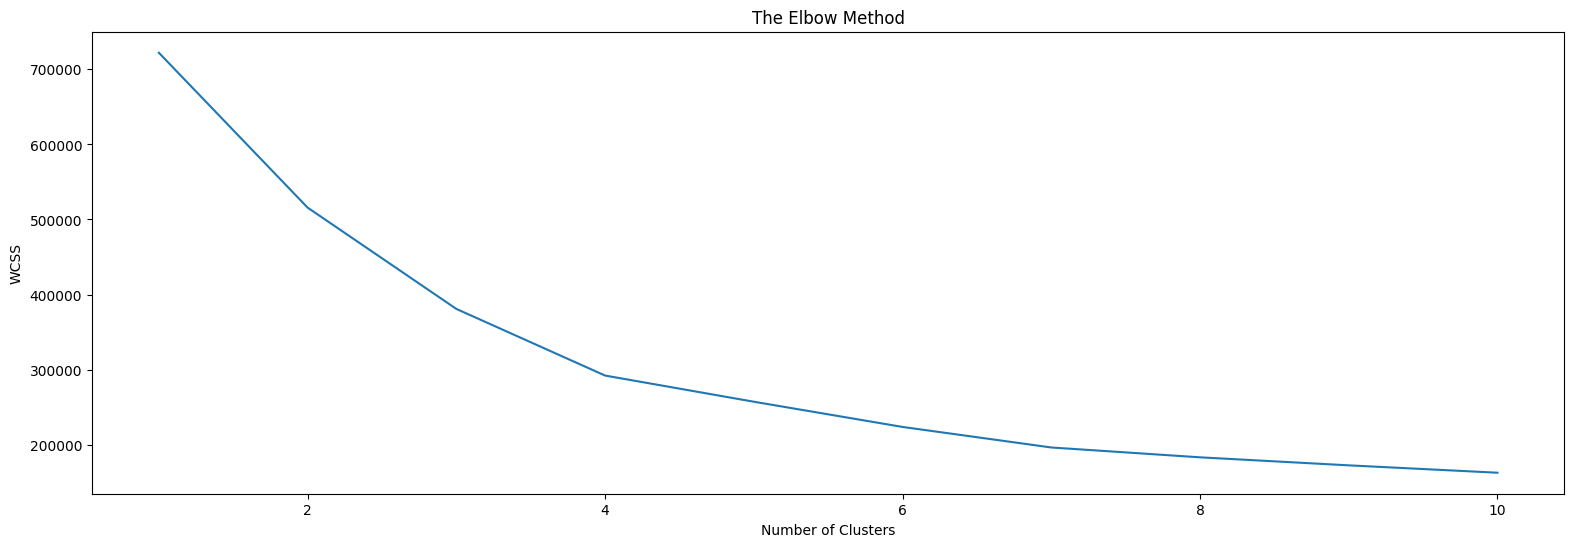

In [88]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10), k=(1, 11),
                 locate_elbow=False, timings=False)

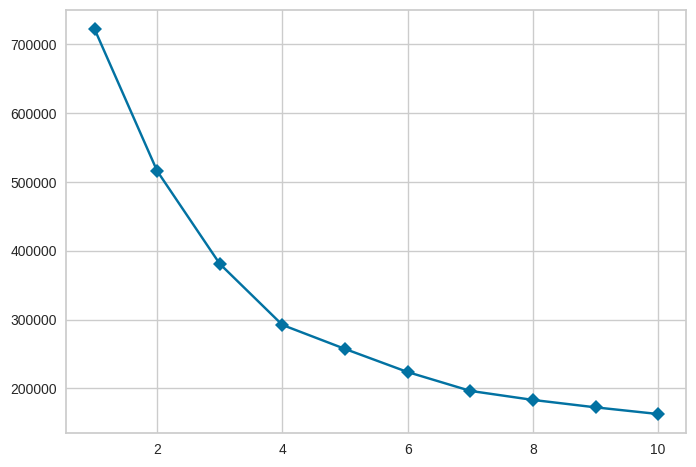

In [89]:
# Sample code to run the KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(1,11), metric='distortion', timings=False, locate_elbow=False
)

visualizer.fit(X)        # Fit the data to the visualizer

# **Implementing Hierarchical Clustering**

In [90]:
X = X_train[0:10001]

In [91]:
len(X)

10001

In [92]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [93]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

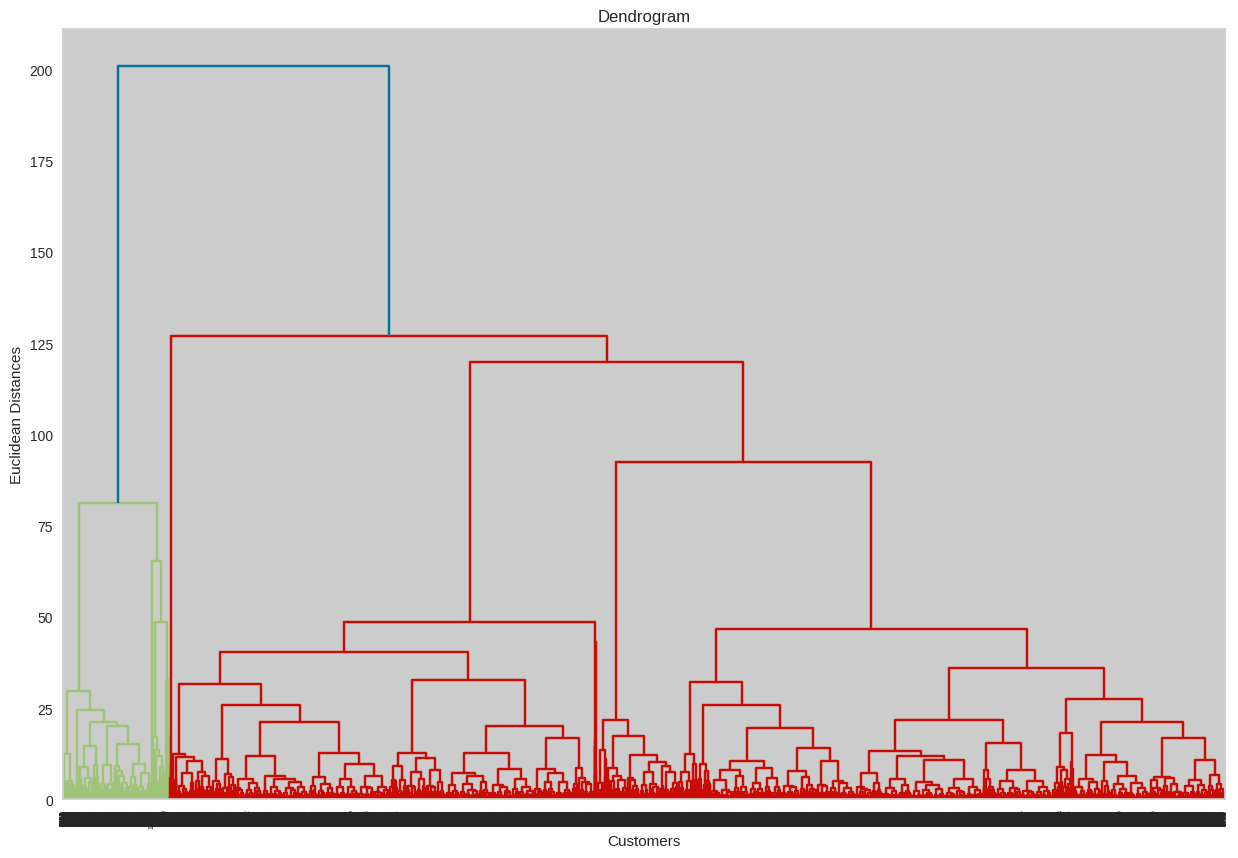

In [94]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

# **Implmenting Density-Based Spatial Clustering Of Applications With Noise   (DBSCAN)**

Estimated number of clusters: 1
Estimated number of noise points: 34183
Homogeneity: 0.134
Completeness: 0.339
V-measure: 0.192
Adjusted Rand Index: 0.185
Adjusted Mutual Information: 0.192
Silhouette Coefficient: 0.294


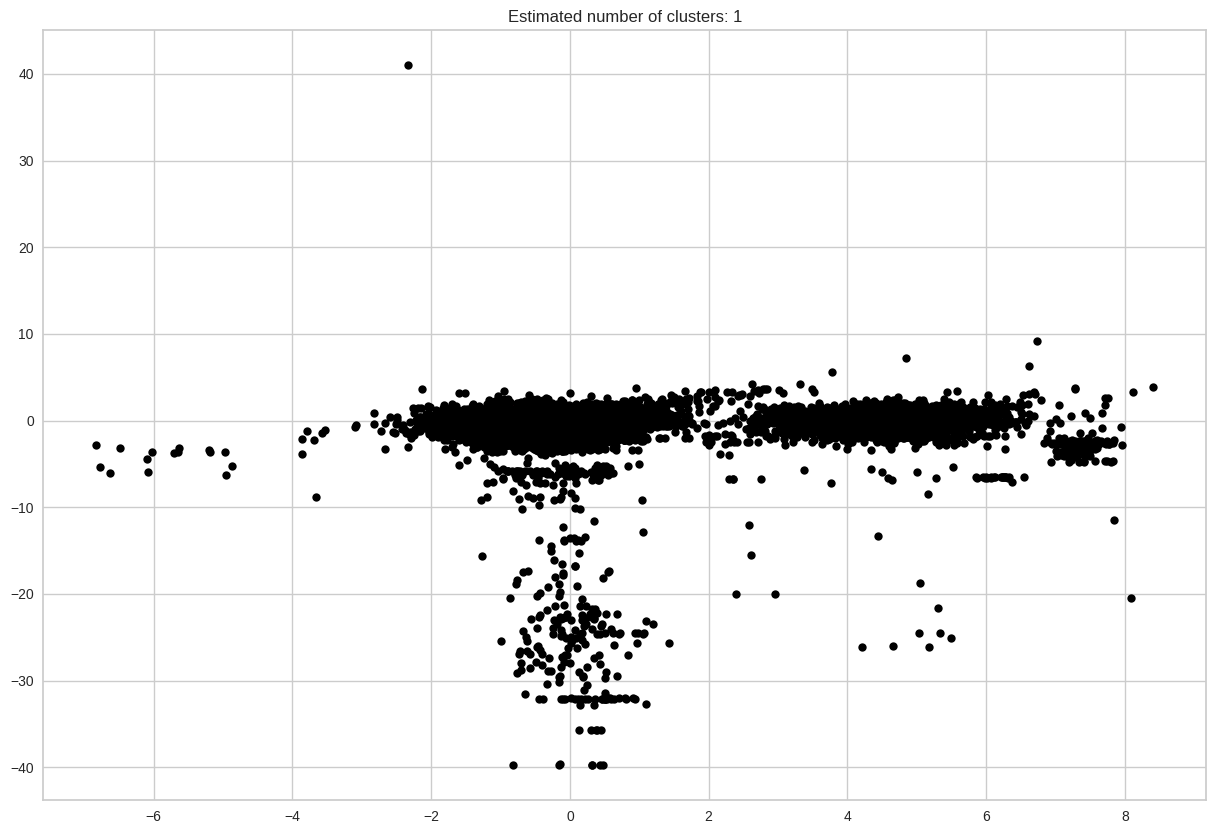

In [95]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler



X = X_train
labels_true=cluster_labels

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Number of clusters: 1
Homogeneity: 0.1341076581606646
Completeness: 0.3394981206727459
V-measure: 0.192
Adjusted Rand Index: 0.185
Adjusted Mutual Information: 0.192
Silhouette Coefficient: 0.294


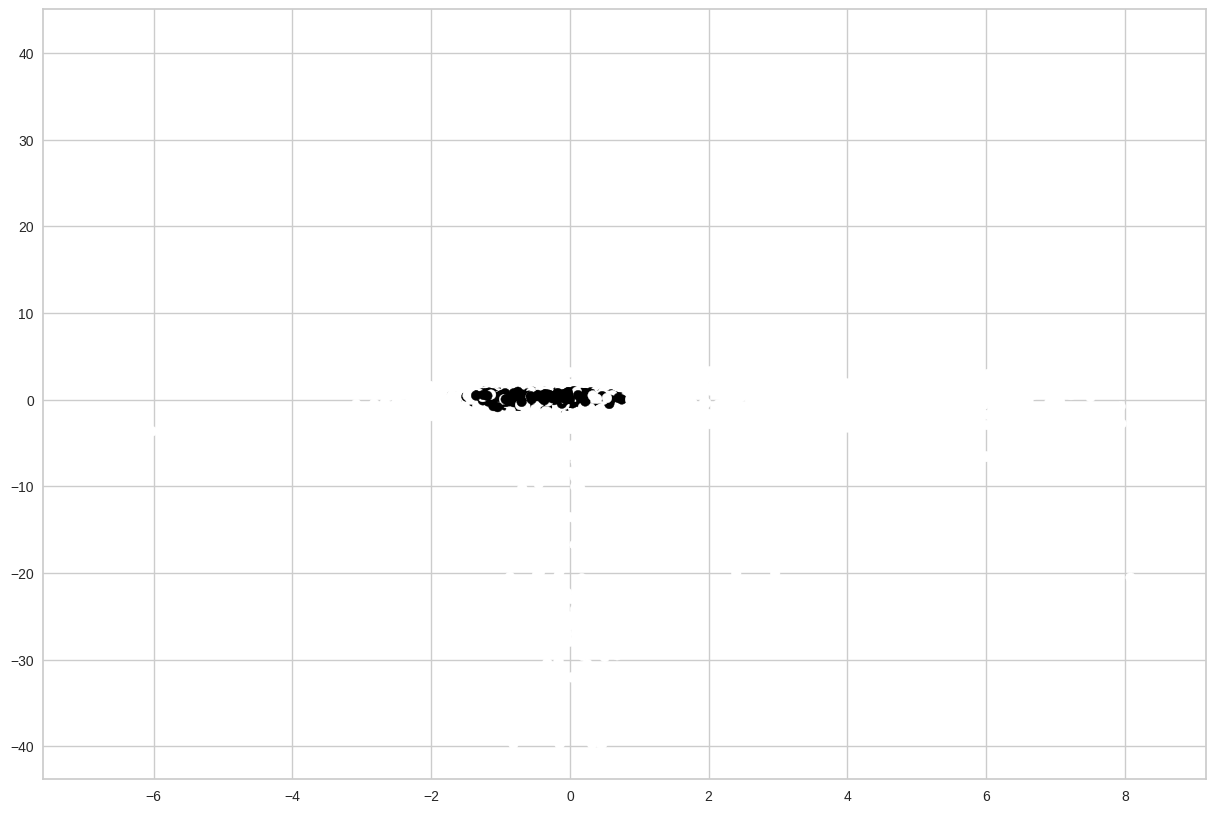

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X = X_train
y=cluster_labels
y_pred = DBSCAN(eps=0.3, min_samples=100).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Conclusion
* K-Means Clustering with Silhouette gives the highest score of 61.9% for number of clusters 3.

* Sales has been increased from 2010 to 2011.

* RFM for Cluster ID box plots tells well about Cluster detail.

* We can deploy this model.